## Initialise the environment

In [1]:
from fastbook import *
from fastai.vision.widgets import *

## Build the datablock from directory names

In [2]:
path = Path('/home/streicher/.fastai/data/familyphotos_small/')

In [3]:
fns = get_image_files(path)
fns

(#26044) [Path('/home/streicher/.fastai/data/familyphotos_small/180/Mixed_Childhood_0456.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Willem_Israel_0138.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN34_RESCAN_32.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S0737.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN6_RESCAN_22.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S0271.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S1531.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Hiking_Otter_0010.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN41_RESCAN_28.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Willem_Israel_0065.jpg')...]

In [4]:
photos = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

In [5]:
dls = photos.dataloaders(path)

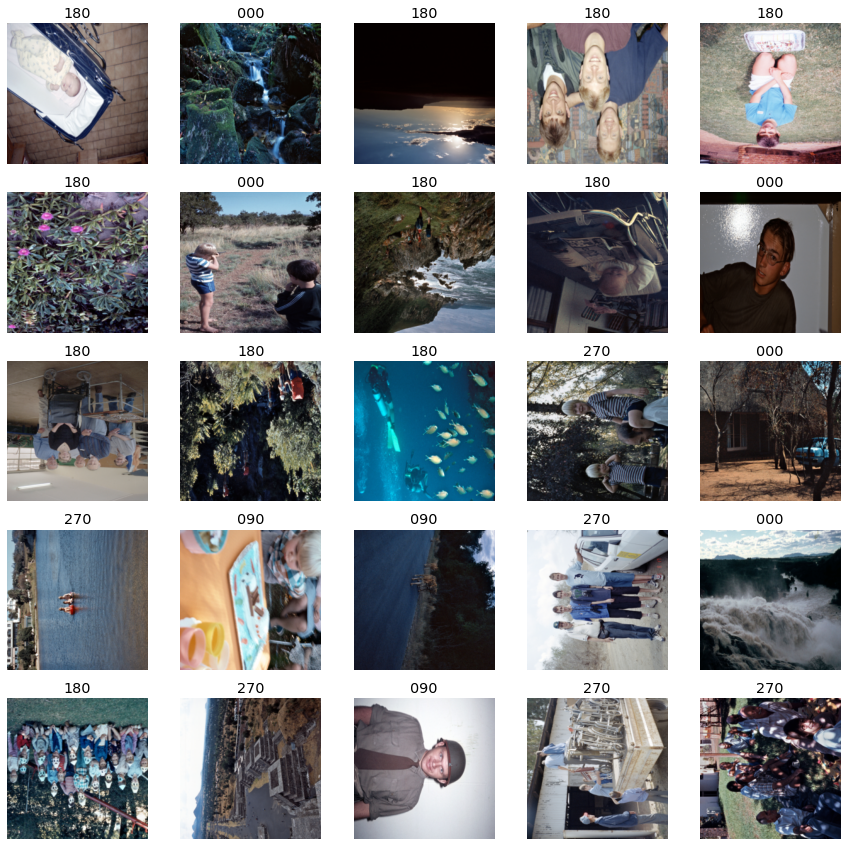

In [6]:
dls.valid.show_batch(max_n=25, nrows=5)

## Training The Model

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Minimum/10: 8.32e-03, steepest point: 5.25e-03


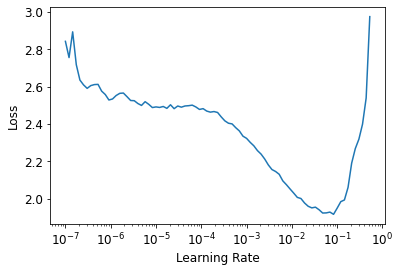

In [8]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [9]:
learn.fine_tune(25, base_lr=8.32e-03)

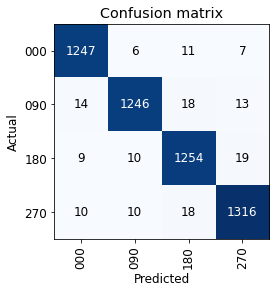

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

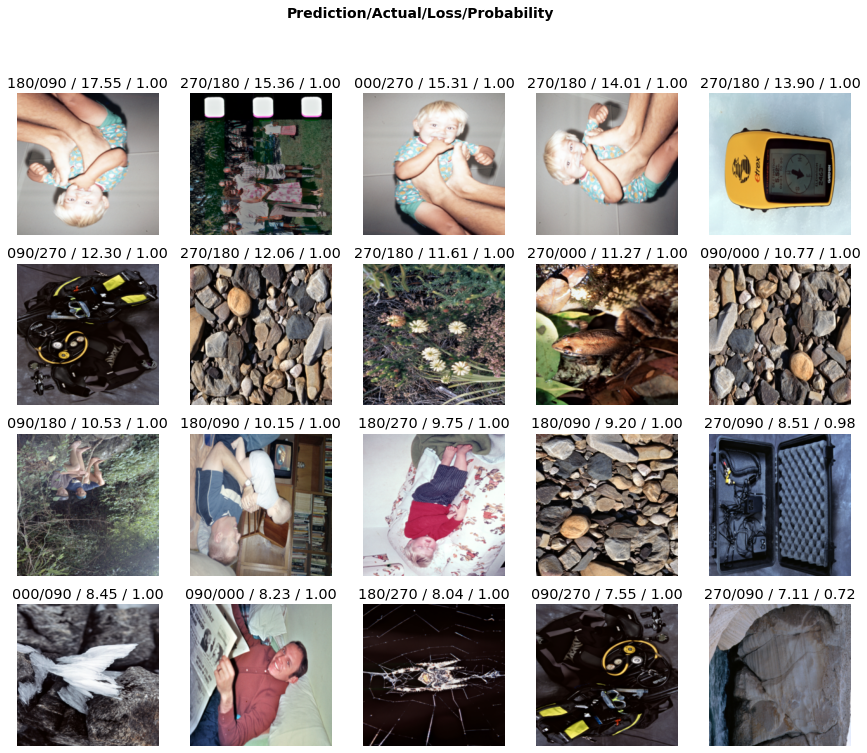

In [11]:
interp.plot_top_losses(20, nrows=4)

In [12]:
learn.export()

### Using the Model for Inference

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
learn_inf = load_learner('export.pkl')

In [3]:
learn_inf.dls.vocab

['000', '090', '180', '270']

In [4]:
directory_in_str = '/media/streicher/2TB_ExFAT/Family_Slides/'


In [6]:
import os
count=0
for subdir, dirs, files in os.walk(directory_in_str):
    for file in files:
        filepath = subdir +  file
        if (filepath.endswith(".tif") and not file.startswith(".")):
            print ("File to process: " + filepath)
            count=count+1
print ("Files in Total: ", count)          

File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0086.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0092.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0079.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0045.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0051.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0050.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0044.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0078.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0093.tif
File to process: /media/streicher/2TB_ExFAT/Family_Slides/Part1/LenetteFamily_Lenette_0087.tif
File to process: /media/streicher/2TB_ExFAT/Family

In [12]:
learn_inf.predict('/media/streicher/2TB_ExFAT/Streicher_Negatives_post_AI/090_SN_253_31.jpg')

('090', tensor(1), tensor([8.5414e-04, 9.8671e-01, 2.8830e-04, 1.2144e-02]))

In [21]:
count=0
for subdir, dirs, files in os.walk(directory_in_str):
    for file in files:
        if (file.endswith(".tif") and not file.startswith(".")):
            print ("Old Filename: " + subdir + file)
            pred,pred_idx,probs = learn_inf.predict(subdir + file)
            print ("Predicted Class: " + pred)
            confidence = max(probs)
            percent = float(confidence)        
            print ("Predicted Confidence: ", percent)
            if ( percent < 0.5 ):
                newfilename = subdir + "UNK_" + file
            else:
                newfilename = subdir + pred + "_" + file
            print ("New Filename: " + newfilename)
            os.rename(subdir + file, newfilename)
            count=count+1
            print("************************************")
            print()
print ("Files in Total: ", count)            

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9214386343955994
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_44.jpg


Predicted Class: 090
Predicted Confidence:  0.99973064661026
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9998998641967773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_23.jpg


Predicted Class: 180
Predicted Confidence:  0.999951958656311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999897480010986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_139_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9719370603561401
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9995418787002563
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9995656609535217
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9998212456703186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9992259740829468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_6.jpg


Predicted Class: 180
Predicted Confidence:  0.8863400816917419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_141_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9223806262016296
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_19.jpg


Predicted Class: 180
Predicted Confidence:  0.999284565448761
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_3.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_218_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_223_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_16.jpg


Predicted Class: 000
Predicted Confidence:  0.999975323677063
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9112129211425781
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_246.jpg


Predicted Class: 180
Predicted Confidence:  0.6371877193450928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_246.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9965904951095581
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_43.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_14.jpg


Predicted Class: 000
Predicted Confidence:  0.8124284148216248
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999752044677734
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_193_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9995575547218323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_198_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_5.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_5.jpg


Predicted Class: 090
Predicted Confidence:  0.5170740485191345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_167_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_252.jpg


Predicted Class: 180
Predicted Confidence:  0.9612051844596863
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_252.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_50.jpg


Predicted Class: 090
Predicted Confidence:  0.9958567023277283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9994912147521973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_4.jpg


Predicted Class: 180
Predicted Confidence:  0.610143780708313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_169_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9994298815727234
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26626.jpg


Predicted Class: 000
Predicted Confidence:  0.6200592517852783
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_26626.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_10.jpg


Predicted Class: 000
Predicted Confidence:  0.8926400542259216
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_17.jpg


Predicted Class: 270
Predicted Confidence:  0.9981036186218262
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_118.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_118.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9995325803756714
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_33.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_179_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_25.jpg


Predicted Class: 180
Predicted Confidence:  0.46855852007865906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_SHOOT1_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_31.jpg


Predicted Class: 270
Predicted Confidence:  0.889007031917572
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_215_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999724626541138
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_352_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_7.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_47.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9452481865882874
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_181_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_90.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9998152852058411
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_183_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_13.jpg


Predicted Class: 180
Predicted Confidence:  0.999976396560669
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61021.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61021.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9790061116218567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9605803489685059
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9996044039726257
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_50.jpg


Predicted Class: 000
Predicted Confidence:  0.9984190464019775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9999889135360718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9811367988586426
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_15.jpg


Predicted Class: 180
Predicted Confidence:  0.8799481391906738
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_16.jpg


Predicted Class: 090
Predicted Confidence:  0.8324180245399475
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_268_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_24.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_002_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_002_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_101.jpg


Predicted Class: 090
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_84.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_27.jpg


Predicted Class: 180
Predicted Confidence:  0.6320479512214661
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999680519104004
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_3.jpg


Predicted Class: 270
Predicted Confidence:  0.8423571586608887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_87.jpg


Predicted Class: 270
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999017715454102
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9998132586479187
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9911017417907715
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9992807507514954
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_48.jpg


Predicted Class: 180
Predicted Confidence:  0.7343281507492065
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999833106994629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_1001_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_1001_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_50.jpg


Predicted Class: 090
Predicted Confidence:  0.9936705827713013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9993746876716614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999327659606934
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9416358470916748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_172_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_54.jpg


Predicted Class: 180
Predicted Confidence:  0.9996906518936157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_68.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM__13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9846161007881165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_240_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_22.jpg


Predicted Class: 090
Predicted Confidence:  0.999847412109375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9247505068778992
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_14.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_93.jpg


Predicted Class: 000
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_DK_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9881765246391296
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_DK_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999895095825195
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_18.jpg


Predicted Class: 180
Predicted Confidence:  0.8469732999801636
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999282360076904
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_44.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_31 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_31 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_36.jpg


Predicted Class: 180
Predicted Confidence:  0.6795842051506042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9906265735626221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_45.jpg


Predicted Class: 270
Predicted Confidence:  0.6595997214317322
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_254_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9154903888702393
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_38.jpg


Predicted Class: 090
Predicted Confidence:  0.39579489827156067
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_271_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_126.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_126.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_21.jpg


Predicted Class: 000
Predicted Confidence:  0.993341863155365
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_350_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9917391538619995
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999747276306152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9954829216003418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_18.jpg


Predicted Class: 000
Predicted Confidence:  0.905084490776062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_130.jpg


Predicted Class: 270
Predicted Confidence:  0.9902926683425903
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_130.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_64.jpg


Predicted Class: 180
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_78.jpg


Predicted Class: 090
Predicted Confidence:  0.9998955726623535
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9998694658279419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999734163284302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_161_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_53.jpg


Predicted Class: 270
Predicted Confidence:  0.9977935552597046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_93.jpg


Predicted Class: 000
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999505281448364
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999699592590332
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_124.jpg


Predicted Class: 000
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_124.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_47.jpg


Predicted Class: 270
Predicted Confidence:  0.4086073040962219
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_606_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61035.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61035.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_78.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_44.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_13.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9998830556869507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_78.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_93.jpg


Predicted Class: 000
Predicted Confidence:  0.9945065379142761
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_244_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_87.jpg


Predicted Class: 090
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_6.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_30.jpg


Predicted Class: 180
Predicted Confidence:  0.5527455806732178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_87.jpg


Predicted Class: 090
Predicted Confidence:  0.9999878406524658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_39.jpg


Predicted Class: 090
Predicted Confidence:  0.7318421602249146
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_259_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_132.jpg


Predicted Class: 090
Predicted Confidence:  0.9981822967529297
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_132.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_15.jpg


Predicted Class: 090
Predicted Confidence:  0.653802216053009
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999780654907227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9998655319213867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9989996552467346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_273_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9998575448989868
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_350_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9998903274536133
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999626874923706
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_29.jpg


Predicted Class: 180
Predicted Confidence:  0.994817316532135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9857207536697388
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9990906715393066
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_17.jpg


Predicted Class: 090
Predicted Confidence:  0.7416133284568787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_58.jpg


Predicted Class: 090
Predicted Confidence:  0.9992490410804749
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_70.jpg


Predicted Class: 090
Predicted Confidence:  0.7941873669624329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9969295859336853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_35.jpg


Predicted Class: 090
Predicted Confidence:  0.999975323677063
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9893955588340759
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_600_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_38.jpg


Predicted Class: 090
Predicted Confidence:  0.8463671207427979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_31.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9963610768318176
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_115.jpg


Predicted Class: 090
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_115.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26632.jpg


Predicted Class: 180
Predicted Confidence:  0.9980378746986389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26632.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9992479681968689
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_257_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9875889420509338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999488592147827
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SHOOT1_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9997326731681824
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_39.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9620211720466614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999035596847534
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9994106292724609
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9976553916931152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9948315024375916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9997820258140564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_156_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_18.jpg


Predicted Class: 090
Predicted Confidence:  0.999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_39.jpg


Predicted Class: 180
Predicted Confidence:  0.8908282518386841
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_600_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9889175891876221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9997076392173767
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999852180480957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_257_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_10.jpg


Predicted Class: 090
Predicted Confidence:  0.5922348499298096
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_236_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26633.jpg


Predicted Class: 180
Predicted Confidence:  0.9992625117301941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26633.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_114.jpg


Predicted Class: 090
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_114.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9924633502960205
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_30.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_100.jpg


Predicted Class: 090
Predicted Confidence:  0.9973843693733215
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_24.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_264_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9998400211334229
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9799919724464417
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26627.jpg


Predicted Class: 270
Predicted Confidence:  0.9993956089019775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_26627.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_6.jpg


Predicted Class: 000
Predicted Confidence:  0.7445005178451538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_244_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999902248382568
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_600_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_210_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__3.jpg


Predicted Class: 090
Predicted Confidence:  0.942069411277771
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_21.jpg


Predicted Class: 270
Predicted Confidence:  0.635844349861145
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_217_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9975780844688416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999651908874512
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_35.jpg


Predicted Class: 180
Predicted Confidence:  0.976861298084259
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999872446060181
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9906060099601746
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_002_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_002_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999455213546753
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_34.jpg


Predicted Class: 270
Predicted Confidence:  0.988661527633667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_242_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_9.jpg


Predicted Class: 270
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_46.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_138_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9954568147659302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_100_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_51.jpg


Predicted Class: 090
Predicted Confidence:  0.9981284737586975
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_79.jpg


Predicted Class: 090
Predicted Confidence:  0.9360664486885071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9958233833312988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__12.jpg


Predicted Class: 000
Predicted Confidence:  0.8584231734275818
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61020.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61020.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999279975891113
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61034.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61034.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_102.jpg


Predicted Class: 000
Predicted Confidence:  0.8714087605476379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_119.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_119.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9969956874847412
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_29.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_45.jpg


Predicted Class: 090
Predicted Confidence:  0.913019061088562
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_92.jpg


Predicted Class: 270
Predicted Confidence:  0.9998830556869507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_131.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_131.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_51.jpg


Predicted Class: 090
Predicted Confidence:  0.9984638690948486
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_86.jpg


Predicted Class: 000
Predicted Confidence:  0.9999444484710693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_125.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_125.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999843835830688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_8.jpg


Predicted Class: 000
Predicted Confidence:  0.4282982349395752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_236_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_79.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9790468811988831
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999843835830688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_92.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9455683827400208
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_79.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9822050929069519
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999897480010986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999839067459106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_19.jpg


Predicted Class: 090
Predicted Confidence:  0.4289390444755554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_352_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_86.jpg


Predicted Class: 090
Predicted Confidence:  0.9999817609786987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_7.jpg


Predicted Class: 180
Predicted Confidence:  0.8965949416160583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9927811026573181
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9858003854751587
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9998383522033691
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_86.jpg


Predicted Class: 090
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_51.jpg


Predicted Class: 180
Predicted Confidence:  0.9999276399612427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9974640607833862
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999656677246094
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_200_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_8.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_137_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_1.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_102_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_92.jpg


Predicted Class: 090
Predicted Confidence:  0.9018979668617249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_15.jpg


Predicted Class: 000
Predicted Confidence:  0.7946507334709167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9989437460899353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_209_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9853861331939697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9999661445617676
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999182224273682
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9969985485076904
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_223_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_12.jpg


Predicted Class: 000
Predicted Confidence:  0.999434769153595
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_223_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9925647974014282
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_52.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_27.jpg


Predicted Class: 270
Predicted Confidence:  0.8024295568466187
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_143_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9997275471687317
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_23.jpg


Predicted Class: 000
Predicted Confidence:  0.999789297580719
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_10.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_193_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9983870983123779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_118_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_39.jpg


Predicted Class: 270
Predicted Confidence:  0.996632993221283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_19.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_13.jpg


Predicted Class: 180
Predicted Confidence:  0.7716004848480225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_111_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9807047247886658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999374151229858
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9946457147598267
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_49.jpg


Predicted Class: 180
Predicted Confidence:  0.9999768733978271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_10 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_10 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9896127581596375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9995160102844238
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_139_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9842155575752258
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9997939467430115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_20.jpg


Predicted Class: 000
Predicted Confidence:  0.7330674529075623
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_91.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_7.jpg


Predicted Class: 270
Predicted Confidence:  0.8480419516563416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_104_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9229999780654907
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_141_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9954433441162109
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9998817443847656
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_3_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999904632568359
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9612633585929871
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_4.jpg


Predicted Class: 000
Predicted Confidence:  0.4562153220176697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_167_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_85.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9049725532531738
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_23.jpg


Predicted Class: 000
Predicted Confidence:  0.6936004161834717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9998326301574707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_268_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9998408555984497
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999796152114868
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9731863141059875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9149795174598694
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_34.jpg


Predicted Class: 090
Predicted Confidence:  0.998028576374054
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999817609786987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_234_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_247.jpg


Predicted Class: 270
Predicted Confidence:  0.6095967888832092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_247.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_16.jpg


Predicted Class: 090
Predicted Confidence:  0.7083255052566528
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_22.jpg


Predicted Class: 180
Predicted Confidence:  0.8947613835334778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_28.jpg


Predicted Class: 180
Predicted Confidence:  0.868625819683075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_16.jpg


Predicted Class: 180
Predicted Confidence:  0.99122154712677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_001_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9996614456176758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_6.jpg


Predicted Class: 180
Predicted Confidence:  0.8961018323898315
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9478422999382019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9998266100883484
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_65.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_71.jpg


Predicted Class: 180
Predicted Confidence:  0.5004626512527466
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_19.jpg


Predicted Class: 270
Predicted Confidence:  0.6600838899612427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_240_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_30.jpg


Predicted Class: 000
Predicted Confidence:  0.5813142657279968
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_44.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9982393980026245
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_31.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_59.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_133.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_133.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_55.jpg


Predicted Class: 180
Predicted Confidence:  0.9998476505279541
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9521960020065308
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_127.jpg


Predicted Class: 000
Predicted Confidence:  0.9445425271987915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_127.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9931246638298035
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_131.jpg


Predicted Class: 090
Predicted Confidence:  0.9991027116775513
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_131.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_43.jpg


Predicted Class: 270
Predicted Confidence:  0.9447134137153625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_VK95_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999353885650635
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_19.jpg


Predicted Class: 000
Predicted Confidence:  0.999686598777771
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_10.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9695366024971008
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9998875856399536
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_4.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_8.jpg


Predicted Class: 270
Predicted Confidence:  0.5420665740966797
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_125.jpg


Predicted Class: 000
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_125.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_27.jpg


Predicted Class: 000
Predicted Confidence:  0.623842716217041
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_67.jpg


Predicted Class: 180
Predicted Confidence:  0.9306522607803345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999189376831055
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_32.jpg


Predicted Class: 180
Predicted Confidence:  0.908843994140625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9985761642456055
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_119.jpg


Predicted Class: 000
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_119.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999001026153564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_73.jpg


Predicted Class: 000
Predicted Confidence:  0.6715201735496521
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_14.jpg


Predicted Class: 270
Predicted Confidence:  0.8051119446754456
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_101_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_245.jpg


Predicted Class: 180
Predicted Confidence:  0.8992307186126709
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_245.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_4.jpg


Predicted Class: 000
Predicted Confidence:  0.7664629220962524
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_251.jpg


Predicted Class: 180
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_251.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_20.jpg


Predicted Class: 270
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_153_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_8.jpg


Predicted Class: 000
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_43.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9998124241828918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999788999557495
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9257668852806091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_4.jpg


Predicted Class: 180
Predicted Confidence:  0.37559399008750916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_198_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9573643207550049
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_268_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_15.jpg


Predicted Class: 090
Predicted Confidence:  0.45078468322753906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_154_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9998931884765625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9557647705078125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_233_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_57.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999017715454102
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_5.jpg


Predicted Class: 180
Predicted Confidence:  0.8944656252861023
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_141_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9928983449935913
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9756562113761902
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_268_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_5.jpg


Predicted Class: 180
Predicted Confidence:  0.999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_93.jpg


Predicted Class: 000
Predicted Confidence:  0.9884196519851685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9953798055648804
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999182224273682
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_250_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_35.jpg


Predicted Class: 000
Predicted Confidence:  0.6999279260635376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9934505224227905
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_87.jpg


Predicted Class: 000
Predicted Confidence:  0.9994959831237793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_16.jpg


Predicted Class: 270
Predicted Confidence:  0.8925784230232239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9957742094993591
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9994173049926758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9644426107406616
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_139_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9997026324272156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_162_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9998757839202881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9999740123748779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_193_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_59.jpg


Predicted Class: 000
Predicted Confidence:  0.9998617172241211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_5.jpg


Predicted Class: 090
Predicted Confidence:  0.8795076012611389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9997209906578064
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_143_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_50.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_44.jpg


Predicted Class: 000
Predicted Confidence:  0.9999794960021973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9986476302146912
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999878406524658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999622106552124
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9976071119308472
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_266_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_65.jpg


Predicted Class: 180
Predicted Confidence:  0.5565094351768494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_601_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_33.jpg


Predicted Class: 180
Predicted Confidence:  0.7399574518203735
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999804496765137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999030828475952
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_78.jpg


Predicted Class: 090
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_25 copy.jpg


Predicted Class: 270
Predicted Confidence:  0.9443531632423401
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_208_25 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9998679161071777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_53.jpg


Predicted Class: 180
Predicted Confidence:  0.9991982579231262
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_84.jpg


Predicted Class: 090
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_9.jpg


Predicted Class: 090
Predicted Confidence:  0.509572446346283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_111_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_24.jpg


Predicted Class: 090
Predicted Confidence:  0.4224032759666443
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_167_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9996265172958374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9287346601486206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9997041821479797
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_209_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9986345171928406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_252_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_47.jpg


Predicted Class: 000
Predicted Confidence:  0.9996219873428345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999386072158813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_90.jpg


Predicted Class: 090
Predicted Confidence:  0.9994820952415466
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_160_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6109.jpg


Predicted Class: 000
Predicted Confidence:  0.9998860359191895
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_6109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_90.jpg


Predicted Class: 090
Predicted Confidence:  0.9999549388885498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999642372131348
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_167_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_21.jpg


Predicted Class: 000
Predicted Confidence:  0.7294662594795227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_5.jpg


Predicted Class: 180
Predicted Confidence:  0.8855963945388794
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_84.jpg


Predicted Class: 090
Predicted Confidence:  0.9865502119064331
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_133.jpg


Predicted Class: 000
Predicted Confidence:  0.9926902651786804
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_133.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_90.jpg


Predicted Class: 180
Predicted Confidence:  0.6039397716522217
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_47.jpg


Predicted Class: 090
Predicted Confidence:  0.9995567202568054
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_4 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9960373044013977
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_4 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9770486950874329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9950071573257446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_5 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.999911904335022
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_5 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9996298551559448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_14.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_127.jpg


Predicted Class: 090
Predicted Confidence:  0.8834454417228699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_127.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_84.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_53.jpg


Predicted Class: 090
Predicted Confidence:  0.9998151659965515
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61022.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61022.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__10.jpg


Predicted Class: 180
Predicted Confidence:  0.7794214487075806
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM__10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9983025789260864
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_146_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_53.jpg


Predicted Class: 090
Predicted Confidence:  0.9065678119659424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999194145202637
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_47.jpg


Predicted Class: 000
Predicted Confidence:  0.8466681241989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_100.jpg


Predicted Class: 000
Predicted Confidence:  0.8489170670509338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61036.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61036.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999755620956421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9918085932731628
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_15.jpg


Predicted Class: 180
Predicted Confidence:  0.6516144871711731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999423027038574
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9997894167900085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_44.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_138_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_8.jpg


Predicted Class: 090
Predicted Confidence:  0.999900221824646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_135_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999810457229614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9978885054588318
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_1.jpg


Predicted Class: 270
Predicted Confidence:  0.6563382744789124
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_145_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9946812987327576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__1.jpg


Predicted Class: 090
Predicted Confidence:  0.9986383318901062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9997461438179016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9534200429916382
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_7.jpg


Predicted Class: 270
Predicted Confidence:  0.998981773853302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_183_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_42.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9824050068855286
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_116.jpg


Predicted Class: 000
Predicted Confidence:  0.76427161693573
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_116.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26631.jpg


Predicted Class: 180
Predicted Confidence:  0.9985755681991577
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26631.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9993985891342163
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9844167828559875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999555349349976
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9384111166000366
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_22.jpg


Predicted Class: 180
Predicted Confidence:  0.982471764087677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_188_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_32.jpg


Predicted Class: 090
Predicted Confidence:  0.980946958065033
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_31.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_600_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_1.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_8.jpg


Predicted Class: 090
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999849796295166
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9874167442321777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_158_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9994741082191467
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26625.jpg


Predicted Class: 180
Predicted Confidence:  0.6668978929519653
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26625.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9998830556869507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_102.jpg


Predicted Class: 090
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_24.jpg


Predicted Class: 180
Predicted Confidence:  0.999954104423523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_29.jpg


Predicted Class: 000
Predicted Confidence:  0.8176643252372742
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9999829530715942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_158_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9979631900787354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_17.jpg


Predicted Class: 180
Predicted Confidence:  0.5060221552848816
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999120235443115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9790723919868469
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999125003814697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9831612706184387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9820342063903809
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_158_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9961453676223755
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9998065829277039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_2.jpg


Predicted Class: 180
Predicted Confidence:  0.5445111393928528
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_9.jpg


Predicted Class: 180
Predicted Confidence:  0.4939710199832916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_271_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_103.jpg


Predicted Class: 090
Predicted Confidence:  0.9990566372871399
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_13.jpg


Predicted Class: 180
Predicted Confidence:  0.998627781867981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26624.jpg


Predicted Class: 090
Predicted Confidence:  0.9947869777679443
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_26624.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999898672103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999889135360718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26630.jpg


Predicted Class: 180
Predicted Confidence:  0.999768078327179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26630.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_117.jpg


Predicted Class: 090
Predicted Confidence:  0.9997875094413757
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_117.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9024168252944946
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_3.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_262_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9990081191062927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_188_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9995282888412476
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9998773336410522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9934451580047607
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9993141889572144
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999703168869019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9760724902153015
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_5.jpg


Predicted Class: 180
Predicted Confidence:  0.8621590733528137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9998149275779724
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9997177720069885
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9986647367477417
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9201673269271851
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_17.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_210_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999219179153442
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_45.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_138_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9718235731124878
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_101.jpg


Predicted Class: 000
Predicted Confidence:  0.985516369342804
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__11.jpg


Predicted Class: 000
Predicted Confidence:  0.9185866713523865
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61023.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61023.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_52.jpg


Predicted Class: 090
Predicted Confidence:  0.9658090472221375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_14.jpg


Predicted Class: 090
Predicted Confidence:  0.5439892411231995
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_11.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_52.jpg


Predicted Class: 090
Predicted Confidence:  0.9996479749679565
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_85.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_126.jpg


Predicted Class: 270
Predicted Confidence:  0.9976629018783569
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_126.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_225_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9983536005020142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_46.jpg


Predicted Class: 090
Predicted Confidence:  0.9597378373146057
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_91.jpg


Predicted Class: 270
Predicted Confidence:  0.8895984292030334
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_132.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_132.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9886063933372498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_1.jpg


Predicted Class: 090
Predicted Confidence:  0.7678160071372986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_260_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_20.jpg


Predicted Class: 000
Predicted Confidence:  0.999942421913147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999310970306396
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_550_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_85.jpg


Predicted Class: 090
Predicted Confidence:  0.9998599290847778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9989847540855408
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9998799562454224
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6108.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_6108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9973243474960327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9510864019393921
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_167_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_91.jpg


Predicted Class: 090
Predicted Confidence:  0.999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9997708201408386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_36.jpg


Predicted Class: 270
Predicted Confidence:  0.8079853653907776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9999607801437378
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_352_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_12.jpg


Predicted Class: 270
Predicted Confidence:  0.4051399827003479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_200_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_91.jpg


Predicted Class: 090
Predicted Confidence:  0.9994878768920898
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_46.jpg


Predicted Class: 090
Predicted Confidence:  0.9518845081329346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9996916055679321
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_111_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_85.jpg


Predicted Class: 090
Predicted Confidence:  0.9999890327453613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_52.jpg


Predicted Class: 180
Predicted Confidence:  0.9870775938034058
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_8.jpg


Predicted Class: 000
Predicted Confidence:  0.999817430973053
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9996230602264404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_1.jpg


Predicted Class: 000
Predicted Confidence:  0.999871015548706
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999808073043823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_79.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9958881735801697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_64.jpg


Predicted Class: 090
Predicted Confidence:  0.9982871413230896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999927282333374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999579191207886
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9999628067016602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9750219583511353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SANDTON_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9992914199829102
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9343717098236084
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_266_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9387764930725098
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_4.jpg


Predicted Class: 090
Predicted Confidence:  0.8565353155136108
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_58.jpg


Predicted Class: 180
Predicted Confidence:  0.5512146353721619
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_601_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_205_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_51.jpg


Predicted Class: 000
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9869201183319092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_143_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_28.jpg


Predicted Class: 000
Predicted Confidence:  0.7389495968818665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9716569781303406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9994823932647705
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_11.jpg


Predicted Class: 270
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_139_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9518303871154785
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_86.jpg


Predicted Class: 090
Predicted Confidence:  0.9931415915489197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9937659502029419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9904167652130127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9109165668487549
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_137_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_23.jpg


Predicted Class: 180
Predicted Confidence:  0.6556981205940247
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999876022338867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_350_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9892231225967407
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9979985356330872
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9908983111381531
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_250_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_92.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9967097043991089
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_218_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9994221925735474
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_268_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9549782276153564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_56.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9862785935401917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_233_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_42.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9678843021392822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999624490737915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9998149275779724
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_154_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9985069632530212
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_001_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_250.jpg


Predicted Class: 180
Predicted Confidence:  0.9999241828918457
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_250.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999330043792725
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_21.jpg


Predicted Class: 180
Predicted Confidence:  0.899833619594574
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9755560159683228
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_101_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_16.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_234_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_244.jpg


Predicted Class: 180
Predicted Confidence:  0.9956672191619873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_244.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9935491681098938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_72.jpg


Predicted Class: 000
Predicted Confidence:  0.6699756383895874
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_118.jpg


Predicted Class: 000
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_118.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_66.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9980533123016357
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_26.jpg


Predicted Class: 000
Predicted Confidence:  0.5951439142227173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_124.jpg


Predicted Class: 000
Predicted Confidence:  0.9999372959136963
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_124.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999871253967285
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_18.jpg


Predicted Class: 000
Predicted Confidence:  0.999767005443573
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9107502102851868
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_130.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_130.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_11.jpg


Predicted Class: 090
Predicted Confidence:  0.999991774559021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9982122182846069
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_23.jpg


Predicted Class: 000
Predicted Confidence:  0.999921441078186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_108.jpg


Predicted Class: 090
Predicted Confidence:  0.9999898672103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_62.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_10.jpg


Predicted Class: 180
Predicted Confidence:  0.7381367087364197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_129_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_37.jpg


Predicted Class: 270
Predicted Confidence:  0.791019856929779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_215_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_42.jpg


Predicted Class: 000
Predicted Confidence:  0.5704573392868042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9968883395195007
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_2.jpg


Predicted Class: 000
Predicted Confidence:  0.693001389503479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_134.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_134.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9986066222190857
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_43.jpg


Predicted Class: 180
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9996535778045654
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_106_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_120.jpg


Predicted Class: 000
Predicted Confidence:  0.9979694485664368
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_120.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_52.jpg


Predicted Class: 180
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9391103386878967
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_172_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999756813049316
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999814033508301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_268_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_46.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9121488332748413
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9971715807914734
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_13.jpg


Predicted Class: 180
Predicted Confidence:  0.8171203136444092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_10.jpg


Predicted Class: 000
Predicted Confidence:  0.99998939037323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_10.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_240.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_240.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_106_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_207_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999890327453613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9995951056480408
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9992745518684387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9348363280296326
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999315738677979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_11.jpg


Predicted Class: 180
Predicted Confidence:  0.7382544279098511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9987465143203735
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_39 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_39 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9995099306106567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999755620956421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9323312044143677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9986916184425354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_96.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_30.jpg


Predicted Class: 090
Predicted Confidence:  0.7848075032234192
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9993051290512085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_131_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9998829364776611
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9953060746192932
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9779908657073975
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_174_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9991791844367981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_17.jpg


Predicted Class: 090
Predicted Confidence:  0.5808819532394409
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_259_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_39.jpg


Predicted Class: 270
Predicted Confidence:  0.7380524277687073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_24.jpg


Predicted Class: 090
Predicted Confidence:  0.7943829894065857
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_82.jpg


Predicted Class: 270
Predicted Confidence:  0.9999510049819946
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9897972345352173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_69.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9998390674591064
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_36.jpg


Predicted Class: 000
Predicted Confidence:  0.7735694646835327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_223_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999731779098511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_16.jpg


Predicted Class: 090
Predicted Confidence:  0.43266797065734863
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_271_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_15.jpg


Predicted Class: 090
Predicted Confidence:  0.500983715057373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_144_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_60.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_21.jpg


Predicted Class: 000
Predicted Confidence:  0.995603084564209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_36.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9423636198043823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_55.jpg


Predicted Class: 000
Predicted Confidence:  0.9840279221534729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9996176958084106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9998589754104614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_118_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_224_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_48.jpg


Predicted Class: 090
Predicted Confidence:  0.7576530575752258
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_1.jpg


Predicted Class: 180
Predicted Confidence:  0.7546802759170532
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SANDTON_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9989702701568604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9990140199661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_14.jpg


Predicted Class: 090
Predicted Confidence:  0.8193137049674988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_111_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9995920062065125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_95.jpg


Predicted Class: 000
Predicted Confidence:  0.9999730587005615
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_255_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999721050262451
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_169_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9993991851806641
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999833106994629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_81.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999836683273315
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9815446138381958
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_167_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_81.jpg


Predicted Class: 090
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_56.jpg


Predicted Class: 000
Predicted Confidence:  0.9983699917793274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_6.jpg


Predicted Class: 270
Predicted Confidence:  0.919421911239624
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_95.jpg


Predicted Class: 090
Predicted Confidence:  0.9999716281890869
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9999421834945679
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9998658895492554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_22.jpg


Predicted Class: 180
Predicted Confidence:  0.8818656802177429
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999915361404419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_18.jpg


Predicted Class: 270
Predicted Confidence:  0.5258252620697021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRTN_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9077296853065491
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_169_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9989373087882996
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_10.jpg


Predicted Class: 000
Predicted Confidence:  0.5305866599082947
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_56.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61027.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61027.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9989944100379944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999685287475586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM__15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_DK_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9982361793518066
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_DK_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61033.jpg


Predicted Class: 000
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61033.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_42.jpg


Predicted Class: 090
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_136.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_136.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_42.jpg


Predicted Class: 090
Predicted Confidence:  0.9982810020446777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_95.jpg


Predicted Class: 000
Predicted Confidence:  0.99993896484375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9919373393058777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_5.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_22.jpg


Predicted Class: 090
Predicted Confidence:  0.8690677881240845
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_11.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_122.jpg


Predicted Class: 270
Predicted Confidence:  0.6255578398704529
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_122.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_56.jpg


Predicted Class: 090
Predicted Confidence:  0.9995697140693665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_81.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999164342880249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__4.jpg


Predicted Class: 090
Predicted Confidence:  0.9997463822364807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_32.jpg


Predicted Class: 090
Predicted Confidence:  0.5286131501197815
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_217_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9972642660140991
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_11.jpg


Predicted Class: 180
Predicted Confidence:  0.8256844282150269
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_41.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_002_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_002_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_39.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_170_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9919136762619019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999901056289673
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9925846457481384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999736547470093
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_45.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_1.jpg


Predicted Class: 270
Predicted Confidence:  0.997497022151947
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_51.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_100_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9914605617523193
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_36.jpg


Predicted Class: 180
Predicted Confidence:  0.8976753354072571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9987558126449585
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_38.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_15.jpg


Predicted Class: 180
Predicted Confidence:  0.999067485332489
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9241313934326172
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9988491535186768
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9928997755050659
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999476671218872
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9248705506324768
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_227_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9693732261657715
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999847412109375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_10.jpg


Predicted Class: 180
Predicted Confidence:  0.5104051232337952
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_609_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9987660646438599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_113.jpg


Predicted Class: 090
Predicted Confidence:  0.9806745648384094
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_113.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_158_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26634.jpg


Predicted Class: 180
Predicted Confidence:  0.9989666938781738
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26634.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_42.jpg


Predicted Class: 270
Predicted Confidence:  0.8880952000617981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_17.jpg


Predicted Class: 270
Predicted Confidence:  0.6993326544761658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_244_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9997585415840149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_156_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_107.jpg


Predicted Class: 090
Predicted Confidence:  0.7683501243591309
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_2400dpi_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9994150400161743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_2400dpi_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_23.jpg


Predicted Class: 090
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_106.jpg


Predicted Class: 090
Predicted Confidence:  0.9999022483825684
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9869144558906555
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_244_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26621.jpg


Predicted Class: 180
Predicted Confidence:  0.6310973763465881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26621.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_2400dpi_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_2400dpi_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_35.jpg


Predicted Class: 270
Predicted Confidence:  0.9851375818252563
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_600_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_26.jpg


Predicted Class: 090
Predicted Confidence:  0.932730495929718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_15.jpg


Predicted Class: 270
Predicted Confidence:  0.999966025352478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_MT_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_MT_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_6.jpg


Predicted Class: 000
Predicted Confidence:  0.802958071231842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_227_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9974718689918518
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26635.jpg


Predicted Class: 180
Predicted Confidence:  0.9988954067230225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26635.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9960673451423645
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_112.jpg


Predicted Class: 000
Predicted Confidence:  0.999991774559021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_112.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_6.jpg


Predicted Class: 180
Predicted Confidence:  0.5301061272621155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9586585164070129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_609_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9998652935028076
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9533396363258362
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_14.jpg


Predicted Class: 000
Predicted Confidence:  0.7733466029167175
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_39.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_23.jpg


Predicted Class: 000
Predicted Confidence:  0.999951958656311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_605_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_7.jpg


Predicted Class: 090
Predicted Confidence:  0.999670147895813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9971336126327515
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_50.jpg


Predicted Class: 090
Predicted Confidence:  0.9992303848266602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_163_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_12.jpg


Predicted Class: 180
Predicted Confidence:  0.6397824287414551
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9170616865158081
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9998750686645508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9999849796295166
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_170_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999902248382568
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_002_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_002_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_40.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_11.jpg


Predicted Class: 090
Predicted Confidence:  0.999866247177124
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_125_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9999741315841675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_46.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999839067459106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999686479568481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_30.jpg


Predicted Class: 270
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_122_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9998358488082886
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__5.jpg


Predicted Class: 000
Predicted Confidence:  0.9946132302284241
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_80.jpg


Predicted Class: 000
Predicted Confidence:  0.9999849796295166
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9998422861099243
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_57.jpg


Predicted Class: 090
Predicted Confidence:  0.9997491240501404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_123.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_123.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9724143147468567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_8.jpg


Predicted Class: 180
Predicted Confidence:  0.8617185950279236
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_CLUB_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_8.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_13.jpg


Predicted Class: 000
Predicted Confidence:  0.8886443376541138
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_4.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_198_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_94.jpg


Predicted Class: 000
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9994506239891052
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_137.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_137.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61032.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61032.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_DK_3.jpg


Predicted Class: 270
Predicted Confidence:  0.7069031000137329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_DK_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9995703101158142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_57.jpg


Predicted Class: 000
Predicted Confidence:  0.9912126660346985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9714791774749756
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_146_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__14.jpg


Predicted Class: 270
Predicted Confidence:  0.9996787309646606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_MRKKIM__14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999130964279175
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_38.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61026.jpg


Predicted Class: 000
Predicted Confidence:  0.9998247027397156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61026.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_26.jpg


Predicted Class: 000
Predicted Confidence:  0.7929078936576843
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999549388885498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_94.jpg


Predicted Class: 090
Predicted Confidence:  0.9996265172958374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9995469450950623
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9660765528678894
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_19.jpg


Predicted Class: 000
Predicted Confidence:  0.999879002571106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9505428075790405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_147_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9079006314277649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_352_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9990314245223999
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_167_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_57.jpg


Predicted Class: 000
Predicted Confidence:  0.9999382495880127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_80.jpg


Predicted Class: 090
Predicted Confidence:  0.9996805191040039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9947010278701782
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_80.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_550_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_135_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9998985528945923
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_207_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9950037598609924
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_169_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999938011169434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_94.jpg


Predicted Class: 000
Predicted Confidence:  0.9069669246673584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_207_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999754428863525
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_49.jpg


Predicted Class: 000
Predicted Confidence:  0.7507833242416382
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999885559082031
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999901056289673
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9995288848876953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_111_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9954438209533691
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999704360961914
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_54.jpg


Predicted Class: 270
Predicted Confidence:  0.9999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_8.jpg


Predicted Class: 270
Predicted Confidence:  0.6858492493629456
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_230_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9994266033172607
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_1.jpg


Predicted Class: 000
Predicted Confidence:  0.5386291146278381
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_193_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_8.jpg


Predicted Class: 270
Predicted Confidence:  0.999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_20.jpg


Predicted Class: 090
Predicted Confidence:  0.974195122718811
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_17.jpg


Predicted Class: 000
Predicted Confidence:  0.5767829418182373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9360256791114807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9997513890266418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_68.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999855756759644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_61.jpg


Predicted Class: 000
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9991463422775269
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_14.jpg


Predicted Class: 090
Predicted Confidence:  0.994847297668457
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_144_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9996084570884705
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_83.jpg


Predicted Class: 000
Predicted Confidence:  0.9999525547027588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9996102452278137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_38.jpg


Predicted Class: 270
Predicted Confidence:  0.9601895809173584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_31.jpg


Predicted Class: 090
Predicted Confidence:  0.8382648825645447
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_8.jpg


Predicted Class: 090
Predicted Confidence:  0.5630741119384766
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_131_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_97.jpg


Predicted Class: 000
Predicted Confidence:  0.9990192651748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9999827146530151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_104_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_4.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_218_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_32.jpg


Predicted Class: 270
Predicted Confidence:  0.8993725776672363
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9883559942245483
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9775500297546387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_32.jpg


Predicted Class: 180
Predicted Confidence:  0.7653414607048035
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_19.jpg


Predicted Class: 090
Predicted Confidence:  0.809392511844635
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_13.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9914805889129639
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_14.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_139_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_26.jpg


Predicted Class: 180
Predicted Confidence:  0.626669704914093
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9938338994979858
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_153_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_9.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9934397339820862
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_178_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_234_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_241.jpg


Predicted Class: 180
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_241.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_10.jpg


Predicted Class: 180
Predicted Confidence:  0.999382495880127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9995545744895935
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_18.jpg


Predicted Class: 270
Predicted Confidence:  0.7265737056732178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_153_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9955867528915405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9998863935470581
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999406337738037
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9280587434768677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_47.jpg


Predicted Class: 000
Predicted Confidence:  0.9999865293502808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_172_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_23.jpg


Predicted Class: 090
Predicted Confidence:  0.5116608738899231
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_53.jpg


Predicted Class: 180
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_121.jpg


Predicted Class: 000
Predicted Confidence:  0.997761607170105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_121.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9818869829177856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9748942255973816
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999505281448364
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9267541766166687
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_47.jpg


Predicted Class: 000
Predicted Confidence:  0.9661959409713745
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_135.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_135.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_11.jpg


Predicted Class: 270
Predicted Confidence:  0.6221038699150085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_129_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999698400497437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_63.jpg


Predicted Class: 090
Predicted Confidence:  0.932746410369873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_109.jpg


Predicted Class: 090
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_13.jpg


Predicted Class: 090
Predicted Confidence:  0.8250635266304016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9998921155929565
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999925971031189
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999744892120361
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_61.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9998496770858765
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9992434978485107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_1800dpi_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_1800dpi_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_123.jpg


Predicted Class: 000
Predicted Confidence:  0.9999533891677856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_123.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_51.jpg


Predicted Class: 180
Predicted Confidence:  0.9999899864196777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_49.jpg


Predicted Class: 000
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9984927177429199
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_8.jpg


Predicted Class: 000
Predicted Confidence:  0.7173157930374146
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_137.jpg


Predicted Class: 090
Predicted Confidence:  0.9992486834526062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_137.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_45.jpg


Predicted Class: 270
Predicted Confidence:  0.7143091559410095
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_VK95_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9997656941413879
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_106_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9328813552856445
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9858922362327576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9653556942939758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_268_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_233_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9935085773468018
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_51.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_45.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_24.jpg


Predicted Class: 090
Predicted Confidence:  0.5854505300521851
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_2.jpg


Predicted Class: 180
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_22.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_108_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999650716781616
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_207_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_18.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999624490737915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_243.jpg


Predicted Class: 180
Predicted Confidence:  0.9998301267623901
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_243.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_234_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999908208847046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9088586568832397
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9891089200973511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9942763447761536
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_257_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9997438788414001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_38.jpg


Predicted Class: 000
Predicted Confidence:  0.99918133020401
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_27.jpg


Predicted Class: 090
Predicted Confidence:  0.5548244118690491
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9977641105651855
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_81.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999619722366333
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_13.jpg


Predicted Class: 270
Predicted Confidence:  0.6005668044090271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_137_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9132136702537537
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9865256547927856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9901690483093262
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999923706054688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9701026678085327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_104_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_95.jpg


Predicted Class: 000
Predicted Confidence:  0.9999747276306152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9835488200187683
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_21.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9991625547409058
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999897480010986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9982681274414062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_193_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_63.jpg


Predicted Class: 270
Predicted Confidence:  0.8686358332633972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_601_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_39.jpg


Predicted Class: 090
Predicted Confidence:  0.5382710099220276
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_35.jpg


Predicted Class: 180
Predicted Confidence:  0.837445080280304
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9807503819465637
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_42.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9801172614097595
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SANDTON_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9998830556869507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9661999940872192
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_33.jpg


Predicted Class: 000
Predicted Confidence:  0.999951958656311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9998001456260681
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_3.jpg


Predicted Class: 000
Predicted Confidence:  0.4489680528640747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_240_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9975073933601379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_56.jpg


Predicted Class: 090
Predicted Confidence:  0.8337321877479553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_205_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_3.jpg


Predicted Class: 180
Predicted Confidence:  0.700188934803009
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9052420258522034
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_550_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9998782873153687
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_82.jpg


Predicted Class: 000
Predicted Confidence:  0.9991647005081177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_29.jpg


Predicted Class: 180
Predicted Confidence:  0.7759637236595154
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_6.jpg


Predicted Class: 270
Predicted Confidence:  0.8910989165306091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_69.jpg


Predicted Class: 000
Predicted Confidence:  0.9999682903289795
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9999103546142578
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_96.jpg


Predicted Class: 000
Predicted Confidence:  0.9999786615371704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_21.jpg


Predicted Class: 090
Predicted Confidence:  0.7172317504882812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_352_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999436140060425
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_5.jpg


Predicted Class: 270
Predicted Confidence:  0.6148626804351807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_96.jpg


Predicted Class: 090
Predicted Confidence:  0.9999821186065674
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_41.jpg


Predicted Class: 270
Predicted Confidence:  0.9999927282333374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999366998672485
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9989657402038574
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_82.jpg


Predicted Class: 090
Predicted Confidence:  0.9999816417694092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_55.jpg


Predicted Class: 090
Predicted Confidence:  0.99998939037323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999746084213257
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_161_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9993851184844971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_167_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_41.jpg


Predicted Class: 090
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_33 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_33 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_69.jpg


Predicted Class: 090
Predicted Confidence:  0.9990400671958923
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_DK_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9983314871788025
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_DK_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61030.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61030.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9948787689208984
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61024.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_61024.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_109.jpg


Predicted Class: 000
Predicted Confidence:  0.9999474287033081
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__16.jpg


Predicted Class: 270
Predicted Confidence:  0.9983968138694763
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_MRKKIM__16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_13.jpg


Predicted Class: 000
Predicted Confidence:  0.998832643032074
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_32 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_32 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_55.jpg


Predicted Class: 000
Predicted Confidence:  0.9842473268508911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_44.jpg


Predicted Class: 000
Predicted Confidence:  0.9936779141426086
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9432267546653748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_121.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_121.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_55.jpg


Predicted Class: 090
Predicted Confidence:  0.9999475479125977
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_82.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_135.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_135.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_41.jpg


Predicted Class: 090
Predicted Confidence:  0.9843634963035583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_96.jpg


Predicted Class: 000
Predicted Confidence:  0.8000078797340393
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_35.jpg


Predicted Class: 180
Predicted Confidence:  0.8820370435714722
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_18.jpg


Predicted Class: 000
Predicted Confidence:  0.8057294487953186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61018.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61018.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_69.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_12.jpg


Predicted Class: 180
Predicted Confidence:  0.6437836289405823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9998053908348083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999681711196899
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_11.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_44.jpg


Predicted Class: 000
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__7.jpg


Predicted Class: 000
Predicted Confidence:  0.9991554021835327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9995162487030029
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_2.jpg


Predicted Class: 180
Predicted Confidence:  0.7387506365776062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_52.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_46.jpg


Predicted Class: 180
Predicted Confidence:  0.8595271110534668
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_13.jpg


Predicted Class: 090
Predicted Confidence:  0.5885687470436096
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_125_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9996001124382019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999583959579468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_10.jpg


Predicted Class: 180
Predicted Confidence:  0.839654266834259
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9537169337272644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_40.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_49.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_16.jpg


Predicted Class: 270
Predicted Confidence:  0.5229844450950623
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_11.jpg


Predicted Class: 090
Predicted Confidence:  0.5257146954536438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999808073043823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999288320541382
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9997829794883728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_28.jpg


Predicted Class: 270
Predicted Confidence:  0.8108687996864319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_5.jpg


Predicted Class: 090
Predicted Confidence:  0.6928150653839111
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_35.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_186_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9875116348266602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9811710119247437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_20.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SHOOT1_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26623.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26623.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_104.jpg


Predicted Class: 090
Predicted Confidence:  0.9989932179450989
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9998500347137451
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9999105930328369
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_262_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_110.jpg


Predicted Class: 090
Predicted Confidence:  0.5923130512237549
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_110.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_158_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9906313419342041
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26637.jpg


Predicted Class: 180
Predicted Confidence:  0.9990915060043335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26637.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9991626739501953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_41.jpg


Predicted Class: 270
Predicted Confidence:  0.8332400918006897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9881002902984619
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9159982204437256
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_188_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_37.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9961322546005249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_40.jpg


Predicted Class: 000
Predicted Confidence:  0.8615269660949707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_38.jpg


Predicted Class: 180
Predicted Confidence:  0.999967098236084
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26636.jpg


Predicted Class: 180
Predicted Confidence:  0.9991708993911743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26636.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9964138865470886
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_111.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_111.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_5.jpg


Predicted Class: 270
Predicted Confidence:  0.8274980783462524
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_262_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9947803616523743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_25.jpg


Predicted Class: 090
Predicted Confidence:  0.5788841247558594
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_MT_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_MT_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999547004699707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_227_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_21.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SHOOT1_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_2400dpi_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_2400dpi_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_105.jpg


Predicted Class: 090
Predicted Confidence:  0.9997947812080383
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9826122522354126
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_158_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26622.jpg


Predicted Class: 180
Predicted Confidence:  0.999738872051239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26622.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9866529107093811
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999339580535889
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9966689944267273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9985244870185852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_41.jpg


Predicted Class: 270
Predicted Confidence:  0.5970827341079712
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9709886908531189
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_17.jpg


Predicted Class: 270
Predicted Confidence:  0.972734808921814
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_48.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_17.jpg


Predicted Class: 270
Predicted Confidence:  0.8756329417228699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_156_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_44 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_44 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_18.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_217_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_47.jpg


Predicted Class: 000
Predicted Confidence:  0.9463992714881897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_12.jpg


Predicted Class: 090
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_125_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_5.jpg


Predicted Class: 090
Predicted Confidence:  0.8864433169364929
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_126_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999140501022339
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9897329211235046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_002_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_002_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_138_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_100_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_45 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_45 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999793767929077
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9995428323745728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9993840456008911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_122_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_19.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9991242289543152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_139_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61019.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61019.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9467973113059998
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_7.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_97.jpg


Predicted Class: 000
Predicted Confidence:  0.9999890327453613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_40.jpg


Predicted Class: 090
Predicted Confidence:  0.9951966404914856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_134.jpg


Predicted Class: 000
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_134.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_68.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_29.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_83.jpg


Predicted Class: 000
Predicted Confidence:  0.9999843835830688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_54.jpg


Predicted Class: 090
Predicted Confidence:  0.9998371601104736
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_120.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_120.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_13.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_108.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9997658133506775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61025.jpg


Predicted Class: 090
Predicted Confidence:  0.9986847043037415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_61025.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9473090171813965
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_196_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_54.jpg


Predicted Class: 000
Predicted Confidence:  0.9999529123306274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_15.jpg


Predicted Class: 090
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9966514706611633
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999780654907227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61031.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61031.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_68.jpg


Predicted Class: 090
Predicted Confidence:  0.9991538524627686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9119699597358704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_54.jpg


Predicted Class: 090
Predicted Confidence:  0.7271820902824402
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_83.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9994876384735107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9970478415489197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_167_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_10.jpg


Predicted Class: 090
Predicted Confidence:  0.989548921585083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999712705612183
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_209_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_20.jpg


Predicted Class: 090
Predicted Confidence:  0.7129431366920471
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_352_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_14.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_252_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_40.jpg


Predicted Class: 180
Predicted Confidence:  0.919922947883606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_4.jpg


Predicted Class: 180
Predicted Confidence:  0.44703251123428345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_102_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_97.jpg


Predicted Class: 090
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9957308173179626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_68.jpg


Predicted Class: 090
Predicted Confidence:  0.6856394410133362
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_97.jpg


Predicted Class: 000
Predicted Confidence:  0.9989067316055298
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_35.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_83.jpg


Predicted Class: 090
Predicted Confidence:  0.9696141481399536
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9999290704727173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_550_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_7.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999163150787354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_200_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9998109936714172
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_193_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999654293060303
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_205_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_57.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9987806677818298
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999544620513916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9910751581192017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_43.jpg


Predicted Class: 270
Predicted Confidence:  0.9959467053413391
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9270516037940979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9188315868377686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_62.jpg


Predicted Class: 000
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9985435009002686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9398680329322815
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_34.jpg


Predicted Class: 090
Predicted Confidence:  0.6227766275405884
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_223_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9998605251312256
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999839067459106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_194_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_29.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_224_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9995682835578918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_2.jpg


Predicted Class: 270
Predicted Confidence:  0.8797526955604553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_141_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9992454051971436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_25.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_250_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_94.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_104_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_80.jpg


Predicted Class: 090
Predicted Confidence:  0.9998053908348083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_11.jpg


Predicted Class: 270
Predicted Confidence:  0.5946969389915466
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9995809197425842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999854564666748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_15.jpg


Predicted Class: 180
Predicted Confidence:  0.991879403591156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_1.jpg


Predicted Class: 000
Predicted Confidence:  0.6311483383178711
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_167_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9618769884109497
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_10.jpg


Predicted Class: 180
Predicted Confidence:  0.7742184996604919
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_257_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9938471913337708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9999874830245972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999804496765137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_13.jpg


Predicted Class: 000
Predicted Confidence:  0.7367944121360779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_19.jpg


Predicted Class: 090
Predicted Confidence:  0.8731712102890015
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_350_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9977300763130188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_13.jpg


Predicted Class: 180
Predicted Confidence:  0.6571788191795349
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_19.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_242.jpg


Predicted Class: 180
Predicted Confidence:  0.9859368205070496
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_242.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_3.jpg


Predicted Class: 270
Predicted Confidence:  0.5863528251647949
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_27.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_153_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_25.jpg


Predicted Class: 090
Predicted Confidence:  0.838026225566864
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_26.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_106_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_198_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_12.jpg


Predicted Class: 000
Predicted Confidence:  0.6415802836418152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_50.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9771208763122559
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9999885559082031
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9998071789741516
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_44.jpg


Predicted Class: 270
Predicted Confidence:  0.8491241931915283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_VK95_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_136.jpg


Predicted Class: 090
Predicted Confidence:  0.9999089241027832
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_136.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_133_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9798613786697388
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999854564666748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9970591068267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_20.jpg


Predicted Class: 000
Predicted Confidence:  0.4932538866996765
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_240_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_50.jpg


Predicted Class: 180
Predicted Confidence:  0.9999877214431763
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_122.jpg


Predicted Class: 000
Predicted Confidence:  0.994034469127655
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_122.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_60.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_21.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_215_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_40.jpg


Predicted Class: 180
Predicted Confidence:  0.5956118702888489
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_12.jpg


Predicted Class: 000
Predicted Confidence:  0.7736886143684387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_16.jpg


Predicted Class: 180
Predicted Confidence:  0.999500036239624
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_74.jpg


Predicted Class: 000
Predicted Confidence:  0.8799653649330139
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9990173578262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_3_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_11.jpg


Predicted Class: 000
Predicted Confidence:  0.999159574508667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_145.jpg


Predicted Class: 090
Predicted Confidence:  0.9999680519104004
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_145.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999111890792847
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999865293502808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_2.jpg


Predicted Class: 000
Predicted Confidence:  0.5956556797027588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9997767806053162
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_254_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9995182752609253
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9457924962043762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9997982382774353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_151.jpg


Predicted Class: 090
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_151.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9989196062088013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9940959215164185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_101_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9985370635986328
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9998224377632141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_231.jpg


Predicted Class: 180
Predicted Confidence:  0.9999055862426758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_231.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_18.jpg


Predicted Class: 090
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_149_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_8.jpg


Predicted Class: 180
Predicted Confidence:  0.999977707862854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_225.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_225.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_22.jpg


Predicted Class: 000
Predicted Confidence:  0.99998939037323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9987779259681702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_20.jpg


Predicted Class: 090
Predicted Confidence:  0.7239646315574646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_112_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9652198553085327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_227_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_219.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_219.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_14.jpg


Predicted Class: 090
Predicted Confidence:  0.8831008672714233
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_140_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9917016625404358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_244_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_41.jpg


Predicted Class: 180
Predicted Confidence:  0.71205073595047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999438524246216
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9997338652610779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_171_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9954738020896912
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_1_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_34.jpg


Predicted Class: 180
Predicted Confidence:  0.8267242312431335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_3.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_55.jpg


Predicted Class: 090
Predicted Confidence:  0.9995040893554688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_138.jpg


Predicted Class: 000
Predicted Confidence:  0.9999833106994629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_138.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9977593421936035
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_110.jpg


Predicted Class: 090
Predicted Confidence:  0.9131855368614197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_110.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_88.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9993689656257629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_42.jpg


Predicted Class: 090
Predicted Confidence:  0.9994698166847229
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_69.jpg


Predicted Class: 090
Predicted Confidence:  0.9926223754882812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999617338180542
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_104.jpg


Predicted Class: 000
Predicted Confidence:  0.9937064051628113
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_82.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9677320122718811
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_239_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_77.jpg


Predicted Class: 090
Predicted Confidence:  0.5713245272636414
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9179967045783997
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9929943680763245
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_211_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9998538494110107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_21.jpg


Predicted Class: 180
Predicted Confidence:  0.99998939037323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SANDTON_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9998483657836914
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_13.jpg


Predicted Class: 000
Predicted Confidence:  0.6972010135650635
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_39.jpg


Predicted Class: 270
Predicted Confidence:  0.9999750852584839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9422788023948669
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9939039349555969
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9999006986618042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_63.jpg


Predicted Class: 180
Predicted Confidence:  0.9999110698699951
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_96.jpg


Predicted Class: 090
Predicted Confidence:  0.9987080097198486
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999089241027832
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999222755432129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_18.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999195337295532
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9996507167816162
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999818801879883
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9894752502441406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9819130897521973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_5.jpg


Predicted Class: 180
Predicted Confidence:  0.8282973766326904
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_27.jpg


Predicted Class: 090
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_184.jpg


Predicted Class: 090
Predicted Confidence:  0.9316307306289673
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_184.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_33.jpg


Predicted Class: 090
Predicted Confidence:  0.4547618627548218
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_BWCH_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_190.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_190.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_3.jpg


Predicted Class: 180
Predicted Confidence:  0.988556444644928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_19.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_3.jpg


Predicted Class: 090
Predicted Confidence:  0.999969482421875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_557_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9993859529495239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_27.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_22.jpg


Predicted Class: 000
Predicted Confidence:  0.987461507320404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9042762517929077
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9997968077659607
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_185_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_147.jpg


Predicted Class: 270
Predicted Confidence:  0.9997171759605408
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_147.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9984891414642334
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_168_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9971833825111389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9904152154922485
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_153.jpg


Predicted Class: 090
Predicted Confidence:  0.7612031698226929
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_153.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_15.jpg


Predicted Class: 270
Predicted Confidence:  0.606617271900177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_107_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9757963418960571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_260_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_6.jpg


Predicted Class: 090
Predicted Confidence:  0.961236834526062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_222_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999874830245972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9165177941322327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9982307553291321
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_182_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9986526966094971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_10.jpg


Predicted Class: 180
Predicted Confidence:  0.5475402474403381
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_109_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9961307048797607
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_235_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_182_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9992081522941589
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9995535016059875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_30.jpg


Predicted Class: 000
Predicted Confidence:  0.999825656414032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999923706054688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999786615371704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_20.jpg


Predicted Class: 000
Predicted Confidence:  0.5271697044372559
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999985933303833
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999561309814453
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_4.jpg


Predicted Class: 270
Predicted Confidence:  0.820701003074646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_24.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_138_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999641180038452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9998225569725037
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999209642410278
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9458157420158386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_243_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999593496322632
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999786615371704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9998689889907837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9946655035018921
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_CLUB_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9781897664070129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26645.jpg


Predicted Class: 000
Predicted Confidence:  0.6906569004058838
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_26645.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_33.jpg


Predicted Class: 180
Predicted Confidence:  0.8894383311271667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9058007597923279
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_4.jpg


Predicted Class: 180
Predicted Confidence:  0.619543731212616
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_11.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999617338180542
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_48.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_24.jpg


Predicted Class: 090
Predicted Confidence:  0.917676568031311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999716281890869
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_26.jpg


Predicted Class: 090
Predicted Confidence:  0.6159660816192627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9997460246086121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999817609786987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_32.jpg


Predicted Class: 270
Predicted Confidence:  0.8116501569747925
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26644.jpg


Predicted Class: 180
Predicted Confidence:  0.9990942478179932
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26644.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_9.jpg


Predicted Class: 090
Predicted Confidence:  0.977607786655426
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_18.jpg


Predicted Class: 000
Predicted Confidence:  0.968906819820404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9989467263221741
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_47.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_17.jpg


Predicted Class: 090
Predicted Confidence:  0.564141571521759
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9894606471061707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_164_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9997784495353699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9999505281448364
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_256_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9836091995239258
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9997100234031677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_163_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_182_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_603_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9998985528945923
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_15.jpg


Predicted Class: 180
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999868869781494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9970884919166565
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_235_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9998735189437866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9533503651618958
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_7.jpg


Predicted Class: 180
Predicted Confidence:  0.99644535779953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_152.jpg


Predicted Class: 000
Predicted Confidence:  0.876465916633606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_152.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_34.jpg


Predicted Class: 000
Predicted Confidence:  0.42587482929229736
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_604_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9997718930244446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_1.jpg


Predicted Class: 000
Predicted Confidence:  0.992586076259613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9337822794914246
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_9.jpg


Predicted Class: 180
Predicted Confidence:  0.3385891616344452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_350_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9998879432678223
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9969282746315002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999302625656128
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_146.jpg


Predicted Class: 180
Predicted Confidence:  0.62043696641922
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_146.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9982141256332397
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9955424666404724
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_26.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_12.jpg


Predicted Class: 180
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_11.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_1.jpg


Predicted Class: 270
Predicted Confidence:  0.986585259437561
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_233_BW_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9886322617530823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_186_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9998632669448853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_HERMAN_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9992781281471252
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_191.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_191.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_32.jpg


Predicted Class: 270
Predicted Confidence:  0.5073630213737488
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9998432397842407
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_185.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_185.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999313354492188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999902248382568
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999619722366333
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_27.jpg


Predicted Class: 000
Predicted Confidence:  0.5657486319541931
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999747276306152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9998053908348083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999508857727051
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_40.jpg


Predicted Class: 090
Predicted Confidence:  0.9875789284706116
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_118_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9994791150093079
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9684520959854126
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_150_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9930745363235474
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999879598617554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9996408224105835
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9988958835601807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9804607033729553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_105_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_97.jpg


Predicted Class: 090
Predicted Confidence:  0.9966040849685669
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9999693632125854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_62.jpg


Predicted Class: 090
Predicted Confidence:  0.9937671422958374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_1.jpg


Predicted Class: 180
Predicted Confidence:  0.8918152451515198
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_76.jpg


Predicted Class: 090
Predicted Confidence:  0.9996302127838135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9996973276138306
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999574422836304
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_83.jpg


Predicted Class: 090
Predicted Confidence:  0.9998142123222351
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_1.jpg


Predicted Class: 270
Predicted Confidence:  0.556763231754303
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_224_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_4.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_8.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_26.jpg


Predicted Class: 000
Predicted Confidence:  0.7667668461799622
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9998388290405273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9957308173179626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_23.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_211_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_68.jpg


Predicted Class: 000
Predicted Confidence:  0.6046781539916992
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_105.jpg


Predicted Class: 000
Predicted Confidence:  0.9999790191650391
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9420116543769836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_551_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_89.jpg


Predicted Class: 000
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_111.jpg


Predicted Class: 090
Predicted Confidence:  0.9994069337844849
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_111.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_178_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_54.jpg


Predicted Class: 180
Predicted Confidence:  0.855812668800354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_139.jpg


Predicted Class: 000
Predicted Confidence:  0.999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_139.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_43.jpg


Predicted Class: 180
Predicted Confidence:  0.9999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_40.jpg


Predicted Class: 180
Predicted Confidence:  0.7886714935302734
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_244_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_160_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9998472929000854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9846788644790649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_171_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_4.jpg


Predicted Class: 270
Predicted Confidence:  0.7962808012962341
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_239_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9770146608352661
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_218.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_218.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9994256496429443
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_21.jpg


Predicted Class: 000
Predicted Confidence:  0.661113440990448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_112_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_7.jpg


Predicted Class: 180
Predicted Confidence:  0.999971866607666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9441631436347961
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_9.jpg


Predicted Class: 270
Predicted Confidence:  0.6795244216918945
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_159_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9798546433448792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_235_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_23.jpg


Predicted Class: 000
Predicted Confidence:  0.945006251335144
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_224.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_224.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_230.jpg


Predicted Class: 270
Predicted Confidence:  0.9730257987976074
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_230.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_115_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9637189507484436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_201_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9951109290122986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9936840534210205
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_150.jpg


Predicted Class: 090
Predicted Confidence:  0.9996640682220459
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_150.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9968907237052917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999591112136841
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_133_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9845197200775146
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_3_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_14.jpg


Predicted Class: 000
Predicted Confidence:  0.7790862917900085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_168_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_254_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9948288798332214
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_36.jpg


Predicted Class: 000
Predicted Confidence:  0.93503338098526
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9997960925102234
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_144.jpg


Predicted Class: 090
Predicted Confidence:  0.9998036026954651
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_144.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9463388919830322
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_2.jpg


Predicted Class: 180
Predicted Confidence:  0.8370639681816101
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9998959302902222
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_152.jpg


Predicted Class: 090
Predicted Confidence:  0.9999898672103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_152.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9998964071273804
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999555349349976
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_11.jpg


Predicted Class: 180
Predicted Confidence:  0.920651376247406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_146.jpg


Predicted Class: 090
Predicted Confidence:  0.9985061287879944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_146.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_34.jpg


Predicted Class: 000
Predicted Confidence:  0.6339027285575867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9989302754402161
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_1.jpg


Predicted Class: 000
Predicted Confidence:  0.7238684892654419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_16.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9973906874656677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_3_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_1.jpg


Predicted Class: 000
Predicted Confidence:  0.997821569442749
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9779793620109558
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_253_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9850318431854248
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_201_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999058246612549
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9941756725311279
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_24.jpg


Predicted Class: 180
Predicted Confidence:  0.5661100745201111
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_226.jpg


Predicted Class: 270
Predicted Confidence:  0.6058909296989441
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_226.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9994827508926392
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_8.jpg


Predicted Class: 180
Predicted Confidence:  0.999911904335022
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_115_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_232.jpg


Predicted Class: 270
Predicted Confidence:  0.5257493257522583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_232.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_45.jpg


Predicted Class: 270
Predicted Confidence:  0.48074135184288025
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_268_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_17.jpg


Predicted Class: 090
Predicted Confidence:  0.6643383502960205
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_140_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_20.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9951243996620178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999736547470093
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_27.jpg


Predicted Class: 180
Predicted Confidence:  0.5716081261634827
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_41.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_56.jpg


Predicted Class: 090
Predicted Confidence:  0.985024094581604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_39.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_218_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_37.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_3.jpg


Predicted Class: 180
Predicted Confidence:  0.999976634979248
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9498976469039917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_244_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_160_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_42.jpg


Predicted Class: 180
Predicted Confidence:  0.6044440269470215
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_6.jpg


Predicted Class: 180
Predicted Confidence:  0.999936580657959
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_107.jpg


Predicted Class: 000
Predicted Confidence:  0.9855799674987793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_3.jpg


Predicted Class: 000
Predicted Confidence:  0.5728874206542969
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9993994235992432
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_113.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_113.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_60.jpg


Predicted Class: 090
Predicted Confidence:  0.9099410176277161
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9893527030944824
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_272_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_95.jpg


Predicted Class: 090
Predicted Confidence:  0.9982802867889404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9998667240142822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_19.jpg


Predicted Class: 180
Predicted Confidence:  0.6475818753242493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_22.jpg


Predicted Class: 270
Predicted Confidence:  0.999233603477478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_9.jpg


Predicted Class: 000
Predicted Confidence:  0.942861020565033
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9532719254493713
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_30.jpg


Predicted Class: 000
Predicted Confidence:  0.999931812286377
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9955936074256897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_3.jpg


Predicted Class: 180
Predicted Confidence:  0.5203949213027954
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_81.jpg


Predicted Class: 090
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_20.jpg


Predicted Class: 090
Predicted Confidence:  0.6086663603782654
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_239_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999798536300659
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_74.jpg


Predicted Class: 180
Predicted Confidence:  0.9724196195602417
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9996775388717651
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9397574067115784
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9995303153991699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_187_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9998530149459839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_18.jpg


Predicted Class: 180
Predicted Confidence:  0.8811570405960083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_48.jpg


Predicted Class: 090
Predicted Confidence:  0.9999485015869141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_31.jpg


Predicted Class: 000
Predicted Confidence:  0.6074478626251221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_123_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_123_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_30.jpg


Predicted Class: 180
Predicted Confidence:  0.5724595189094543
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_11.jpg


Predicted Class: 270
Predicted Confidence:  0.929894208908081
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_214_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_193.jpg


Predicted Class: 000
Predicted Confidence:  0.9346567392349243
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_193.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_6.jpg


Predicted Class: 090
Predicted Confidence:  0.7458682060241699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_140_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9779274463653564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_187.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_187.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9996597766876221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999823570251465
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_3.jpg


Predicted Class: 270
Predicted Confidence:  0.6286364197731018
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_233_BW_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_13.jpg


Predicted Class: 180
Predicted Confidence:  0.8211176991462708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_174_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999873638153076
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9994059801101685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999336004257202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999849796295166
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_150.jpg


Predicted Class: 090
Predicted Confidence:  0.4964202642440796
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_606_150.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999520778656006
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9998223185539246
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_144.jpg


Predicted Class: 270
Predicted Confidence:  0.9341030716896057
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_144.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9995505213737488
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_6.jpg


Predicted Class: 000
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9986773133277893
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999896287918091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9995556473731995
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9999731779098511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_39.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_9.jpg


Predicted Class: 180
Predicted Confidence:  0.998492956161499
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_178.jpg


Predicted Class: 000
Predicted Confidence:  0.9463158249855042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_178.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_235_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999834299087524
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999810457229614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999793767929077
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_17.jpg


Predicted Class: 270
Predicted Confidence:  0.6372143030166626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_7.jpg


Predicted Class: 090
Predicted Confidence:  0.8527384996414185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_164_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9505706429481506
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_138_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9944556355476379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_251_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_37.jpg


Predicted Class: 180
Predicted Confidence:  0.99460369348526
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999769926071167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999309778213501
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_142_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9980061650276184
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_19.jpg


Predicted Class: 090
Predicted Confidence:  0.747302770614624
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9997239708900452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9998049139976501
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9997938275337219
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9697183966636658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_203_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_184_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_2.jpg


Predicted Class: 270
Predicted Confidence:  0.7871690392494202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_179_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_19.jpg


Predicted Class: 270
Predicted Confidence:  0.963967502117157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_192_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9954538345336914
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999134540557861
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_195_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_34 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999711513519287
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_34 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_45.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999117851257324
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_206_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_48.jpg


Predicted Class: 090
Predicted Confidence:  0.7524020075798035
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26646.jpg


Predicted Class: 270
Predicted Confidence:  0.9916663765907288
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_26646.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_30.jpg


Predicted Class: 000
Predicted Confidence:  0.5759977102279663
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999767541885376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_19.jpg


Predicted Class: 180
Predicted Confidence:  0.999984860420227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_225_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_18.jpg


Predicted Class: 000
Predicted Confidence:  0.8300126194953918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_38.jpg


Predicted Class: 270
Predicted Confidence:  0.9997832179069519
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999858140945435
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_6.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9900397658348083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_199_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_24.jpg


Predicted Class: 180
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_192_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_19.jpg


Predicted Class: 000
Predicted Confidence:  0.8210830092430115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999897480010986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_31.jpg


Predicted Class: 270
Predicted Confidence:  0.7695285677909851
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_49.jpg


Predicted Class: 180
Predicted Confidence:  0.6116611957550049
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_5.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9938433170318604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_192_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_179_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_50.jpg


Predicted Class: 180
Predicted Confidence:  0.9998313188552856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_25.jpg


Predicted Class: 270
Predicted Confidence:  0.978478193283081
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9996449947357178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_3.jpg


Predicted Class: 270
Predicted Confidence:  0.8460310697555542
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_184_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_14.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_258_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9828207492828369
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_36.jpg


Predicted Class: 090
Predicted Confidence:  0.999119222164154
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_163_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9998780488967896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_18.jpg


Predicted Class: 270
Predicted Confidence:  0.5581152439117432
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_258_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999688863754272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_54.jpg


Predicted Class: 180
Predicted Confidence:  0.45431390404701233
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_242_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_26.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9994937181472778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_28.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_251_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_22.jpg


Predicted Class: 180
Predicted Confidence:  0.6849806904792786
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9998589754104614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_179.jpg


Predicted Class: 000
Predicted Confidence:  0.6593465805053711
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_179.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9782521724700928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_16.jpg


Predicted Class: 090
Predicted Confidence:  0.998772919178009
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_603_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_22.jpg


Predicted Class: 180
Predicted Confidence:  0.997849702835083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9993637204170227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_182_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999628067016602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_145.jpg


Predicted Class: 090
Predicted Confidence:  0.8714242577552795
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_145.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_14.jpg


Predicted Class: 000
Predicted Confidence:  0.999956488609314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9987020492553711
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9983464479446411
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9864473342895508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_151.jpg


Predicted Class: 180
Predicted Confidence:  0.8528871536254883
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_151.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_37.jpg


Predicted Class: 090
Predicted Confidence:  0.7744997143745422
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_155_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9851967096328735
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_43 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_43 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_2.jpg


Predicted Class: 000
Predicted Confidence:  0.6929572820663452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_233_BW_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9703473448753357
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_42 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_42 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_186.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_186.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_7.jpg


Predicted Class: 180
Predicted Confidence:  0.8735032677650452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_123_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999750852584839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_123_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9989147186279297
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_HERMAN_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_4.jpg


Predicted Class: 000
Predicted Confidence:  0.6972599625587463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_192.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_192.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_31.jpg


Predicted Class: 270
Predicted Confidence:  0.7173226475715637
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999830722808838
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_262_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9958378076553345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9995977282524109
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9998759031295776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9579278826713562
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_49.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999784231185913
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999794960021973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_39.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_187_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9998255372047424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9229674935340881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999585151672363
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_25.jpg


Predicted Class: 000
Predicted Confidence:  0.99956876039505
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999792575836182
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_75.jpg


Predicted Class: 090
Predicted Confidence:  0.9998420476913452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9982330799102783
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_80.jpg


Predicted Class: 090
Predicted Confidence:  0.9931650757789612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9942516088485718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9997826218605042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9470049738883972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_94.jpg


Predicted Class: 000
Predicted Confidence:  0.9254338145256042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9994989633560181
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_272_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_61.jpg


Predicted Class: 090
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9985577464103699
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_31.jpg


Predicted Class: 000
Predicted Confidence:  0.6099163293838501
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9989379048347473
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9934523105621338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999209642410278
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999754428863525
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999645948410034
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_10.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_218_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_112.jpg


Predicted Class: 000
Predicted Confidence:  0.9999785423278809
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_112.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_106.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9959391355514526
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_551_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999197721481323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_40.jpg


Predicted Class: 090
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_20.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_211_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9835964441299438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_7.jpg


Predicted Class: 000
Predicted Confidence:  0.874005913734436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_43.jpg


Predicted Class: 000
Predicted Confidence:  0.5198701024055481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_21.jpg


Predicted Class: 090
Predicted Confidence:  0.7555761933326721
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_244_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_38.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_57.jpg


Predicted Class: 180
Predicted Confidence:  0.998885452747345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9990329742431641
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_1.jpg


Predicted Class: 180
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_26.jpg


Predicted Class: 180
Predicted Confidence:  0.7156890034675598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999878406524658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999407529830933
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9994582533836365
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_112_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_16.jpg


Predicted Class: 270
Predicted Confidence:  0.5291129350662231
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_140_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_44.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_268_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_21.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999668598175049
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_9.jpg


Predicted Class: 000
Predicted Confidence:  0.8348347544670105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_233.jpg


Predicted Class: 180
Predicted Confidence:  0.9291839599609375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_233.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_14.jpg


Predicted Class: 270
Predicted Confidence:  0.901174783706665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_197_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999436140060425
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_3.jpg


Predicted Class: 000
Predicted Confidence:  0.8271806240081787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_227.jpg


Predicted Class: 270
Predicted Confidence:  0.6565414667129517
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_227.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_23.jpg


Predicted Class: 000
Predicted Confidence:  0.999880313873291
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9992934465408325
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999549388885498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_25.jpg


Predicted Class: 180
Predicted Confidence:  0.7472884058952332
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_11.jpg


Predicted Class: 000
Predicted Confidence:  0.48853424191474915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_253_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999829530715942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_182_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9778105020523071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_30.jpg


Predicted Class: 180
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9998749494552612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_147.jpg


Predicted Class: 090
Predicted Confidence:  0.9998636245727539
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_147.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999403953552246
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_557_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9325411915779114
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9990493655204773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_3_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999892711639404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9972477555274963
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9998780488967896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_153.jpg


Predicted Class: 090
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_153.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_29.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_3.jpg


Predicted Class: 180
Predicted Confidence:  0.933135986328125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9998946189880371
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999775886535645
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_9 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9944936633110046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_9 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9997385144233704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_1.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9996359348297119
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999821186065674
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_8 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_8 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999289512634277
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999802112579346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_15.jpg


Predicted Class: 180
Predicted Confidence:  0.6526669263839722
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_157.jpg


Predicted Class: 090
Predicted Confidence:  0.9999556541442871
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_157.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_2.jpg


Predicted Class: 000
Predicted Confidence:  0.999969482421875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9934964179992676
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9694739580154419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_1.jpg


Predicted Class: 000
Predicted Confidence:  0.8436391949653625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_3_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9994997978210449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_143.jpg


Predicted Class: 090
Predicted Confidence:  0.9930157661437988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_143.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9962592124938965
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_VK95_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999169111251831
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9998939037322998
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999513626098633
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_40.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9998787641525269
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9897581338882446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_140_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9989087581634521
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9996115565299988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_19.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_223.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_223.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9603700041770935
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_29.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9994333386421204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_226_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_237.jpg


Predicted Class: 180
Predicted Confidence:  0.9994221925735474
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_237.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_30.jpg


Predicted Class: 270
Predicted Confidence:  0.6428351402282715
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_272_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9980535507202148
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_211_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9883216023445129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_6.jpg


Predicted Class: 000
Predicted Confidence:  0.5766419172286987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9712367653846741
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_551_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_102.jpg


Predicted Class: 000
Predicted Confidence:  0.999985933303833
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_39.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_116.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_116.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_13.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_193_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_244_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_50.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_MRKKIM_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_30.jpg


Predicted Class: 000
Predicted Confidence:  0.8859056830406189
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_211_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999890327453613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_11.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_44.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_53.jpg


Predicted Class: 180
Predicted Confidence:  0.8952867984771729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9998646974563599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9973849654197693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_6.jpg


Predicted Class: 000
Predicted Confidence:  0.999946117401123
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_218_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_47.jpg


Predicted Class: 000
Predicted Confidence:  0.9994397759437561
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_3.jpg


Predicted Class: 000
Predicted Confidence:  0.5196024179458618
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9976551532745361
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_23.jpg


Predicted Class: 180
Predicted Confidence:  0.985511302947998
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_29.jpg


Predicted Class: 270
Predicted Confidence:  0.4257936179637909
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_230_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9971278309822083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_18.jpg


Predicted Class: 000
Predicted Confidence:  0.5165526866912842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_59.jpg


Predicted Class: 090
Predicted Confidence:  0.997378945350647
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_19.jpg


Predicted Class: 000
Predicted Confidence:  0.8303313851356506
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9910815954208374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_150_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9498518705368042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9998376369476318
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_5.jpg


Predicted Class: 270
Predicted Confidence:  0.8726291060447693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_65.jpg


Predicted Class: 090
Predicted Confidence:  0.9899214506149292
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9985517859458923
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_90.jpg


Predicted Class: 000
Predicted Confidence:  0.5386359691619873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_84.jpg


Predicted Class: 090
Predicted Confidence:  0.9999384880065918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_25.jpg


Predicted Class: 000
Predicted Confidence:  0.8847999572753906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_6.jpg


Predicted Class: 180
Predicted Confidence:  0.997491717338562
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_71.jpg


Predicted Class: 090
Predicted Confidence:  0.9988545179367065
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_21.jpg


Predicted Class: 180
Predicted Confidence:  0.999984860420227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_6.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_38.jpg


Predicted Class: 270
Predicted Confidence:  0.9999773502349854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_214_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999829530715942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_6.jpg


Predicted Class: 090
Predicted Confidence:  0.5484126210212708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_BW_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_174_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_196.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_196.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9997984766960144
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9998651742935181
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999964714050293
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_3.jpg


Predicted Class: 180
Predicted Confidence:  0.8382649421691895
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9966303706169128
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_182.jpg


Predicted Class: 270
Predicted Confidence:  0.9972670078277588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_182.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_169.jpg


Predicted Class: 090
Predicted Confidence:  0.9638797640800476
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_169.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9155417084693909
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999685287475586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_100_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9998607635498047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9918613433837891
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_603_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_21.jpg


Predicted Class: 090
Predicted Confidence:  0.99580979347229
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_182_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9997788071632385
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_33.jpg


Predicted Class: 180
Predicted Confidence:  0.8827701210975647
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9995512366294861
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_155.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_155.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9997239708900452
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9998869895935059
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_217_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9989792704582214
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9988112449645996
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9975771307945251
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_141.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_141.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9980435371398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_27.jpg


Predicted Class: 270
Predicted Confidence:  0.998067319393158
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_155_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_108.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9989302754402161
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_251_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_45.jpg


Predicted Class: 180
Predicted Confidence:  0.9998530149459839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_164_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9944327473640442
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999260902404785
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9915498495101929
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_29 copy.jpg


Predicted Class: 090
Predicted Confidence:  0.999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_29 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_50.jpg


Predicted Class: 180
Predicted Confidence:  0.999984622001648
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_8.jpg


Predicted Class: 000
Predicted Confidence:  0.99986732006073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_44.jpg


Predicted Class: 090
Predicted Confidence:  0.9933386445045471
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9997852444648743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_132_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_28 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_28 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9947062134742737
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_131_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9996525049209595
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_225_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9996702671051025
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_192_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999816417694092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_199_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_41.jpg


Predicted Class: 180
Predicted Confidence:  0.6332984566688538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_2.jpg


Predicted Class: 090
Predicted Confidence:  0.6279150247573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_29.jpg


Predicted Class: 270
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9988190531730652
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999821186065674
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9993723034858704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9844303727149963
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9989789724349976
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999542236328125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_40.jpg


Predicted Class: 270
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_8.jpg


Predicted Class: 000
Predicted Confidence:  0.7004142999649048
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9949327111244202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26643.jpg


Predicted Class: 180
Predicted Confidence:  0.999123752117157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26643.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9911506175994873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_34.jpg


Predicted Class: 090
Predicted Confidence:  0.8506900072097778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26642.jpg


Predicted Class: 180
Predicted Confidence:  0.9987290501594543
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26642.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_9.jpg


Predicted Class: 180
Predicted Confidence:  0.8582236170768738
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_233_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9817575812339783
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999855756759644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_41.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_20.jpg


Predicted Class: 000
Predicted Confidence:  0.6043714284896851
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_58.jpg


Predicted Class: 000
Predicted Confidence:  0.9939123392105103
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999637603759766
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_40.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_21.jpg


Predicted Class: 180
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_3.jpg


Predicted Class: 090
Predicted Confidence:  0.8932894468307495
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_199_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_22.jpg


Predicted Class: 270
Predicted Confidence:  0.827719509601593
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_CLUB_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9987859129905701
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_225_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_21.jpg


Predicted Class: 090
Predicted Confidence:  0.999982476234436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_204_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_45.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_37.jpg


Predicted Class: 000
Predicted Confidence:  0.99997878074646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9978272318840027
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_13.jpg


Predicted Class: 090
Predicted Confidence:  0.996957540512085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_131_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_132_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_33.jpg


Predicted Class: 000
Predicted Confidence:  0.8829830288887024
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999815225601196
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_51.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9998181462287903
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999085664749146
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_25.jpg


Predicted Class: 090
Predicted Confidence:  0.8025780320167542
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_203_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999265670776367
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_44.jpg


Predicted Class: 270
Predicted Confidence:  0.9961322546005249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_217_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_109.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999274015426636
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_38.jpg


Predicted Class: 180
Predicted Confidence:  0.40742403268814087
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_204_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9998328685760498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9998847246170044
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9997313618659973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999374151229858
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9998703002929688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9975494742393494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_140.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_140.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_154.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_154.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999752044677734
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_155_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9997426867485046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9997032284736633
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_222_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999896287918091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_217_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9998586177825928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9879982471466064
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_152_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_17.jpg


Predicted Class: 000
Predicted Confidence:  0.999944806098938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999163150787354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_168.jpg


Predicted Class: 000
Predicted Confidence:  0.9994434714317322
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_168.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_100_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9998582601547241
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_183.jpg


Predicted Class: 270
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_183.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9603267908096313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_2.jpg


Predicted Class: 180
Predicted Confidence:  0.8344641923904419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9928410053253174
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_197.jpg


Predicted Class: 270
Predicted Confidence:  0.8827004432678223
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_197.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_1.jpg


Predicted Class: 000
Predicted Confidence:  0.999896764755249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_15.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_214_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_8.jpg


Predicted Class: 090
Predicted Confidence:  0.8561299443244934
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_123_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999698400497437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_123_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9932583570480347
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_557_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9997753500938416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_BW_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_16.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9989345669746399
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_213_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_70.jpg


Predicted Class: 090
Predicted Confidence:  0.984441339969635
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_23.jpg


Predicted Class: 090
Predicted Confidence:  0.7540650367736816
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9995782971382141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_85.jpg


Predicted Class: 090
Predicted Confidence:  0.9999399185180664
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9992857575416565
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_39.jpg


Predicted Class: 270
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999240636825562
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_20.jpg


Predicted Class: 090
Predicted Confidence:  0.8557402491569519
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_262_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9671459197998047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_262_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_14.jpg


Predicted Class: 000
Predicted Confidence:  0.8988935947418213
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999598264694214
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_91.jpg


Predicted Class: 090
Predicted Confidence:  0.9946073889732361
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_17.jpg


Predicted Class: 180
Predicted Confidence:  0.7153240442276001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_64.jpg


Predicted Class: 090
Predicted Confidence:  0.888228178024292
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9999923706054688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_18.jpg


Predicted Class: 090
Predicted Confidence:  0.8063637614250183
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_239_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9994674324989319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9998964071273804
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9817626476287842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_230_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_11.jpg


Predicted Class: 180
Predicted Confidence:  0.6268990635871887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_58.jpg


Predicted Class: 090
Predicted Confidence:  0.9999717473983765
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9979671835899353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9997945427894592
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_46.jpg


Predicted Class: 000
Predicted Confidence:  0.907410204410553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_244_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_3.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9999604225158691
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_171_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_7.jpg


Predicted Class: 000
Predicted Confidence:  0.976100742816925
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9860673546791077
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9996426105499268
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_52.jpg


Predicted Class: 090
Predicted Confidence:  0.7881168127059937
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_10.jpg


Predicted Class: 180
Predicted Confidence:  0.576152503490448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_45.jpg


Predicted Class: 000
Predicted Confidence:  0.7019245624542236
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9984170198440552
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_244_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9992198944091797
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_117.jpg


Predicted Class: 000
Predicted Confidence:  0.9998635053634644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_117.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9948247671127319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_51.jpg


Predicted Class: 090
Predicted Confidence:  0.3819921314716339
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_BW_MRKKIM_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_45.jpg


Predicted Class: 090
Predicted Confidence:  0.9997401833534241
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_103.jpg


Predicted Class: 000
Predicted Confidence:  0.9118210673332214
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9971827268600464
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_236.jpg


Predicted Class: 180
Predicted Confidence:  0.9969056248664856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_236.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9996441602706909
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9977579712867737
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9997361302375793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_6.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999665021896362
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9991376399993896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_222.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_222.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999263286590576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_24.jpg


Predicted Class: 180
Predicted Confidence:  0.7550402879714966
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9781389832496643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9798746705055237
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_272_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_41.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_5.jpg


Predicted Class: 090
Predicted Confidence:  0.8939521908760071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_12.jpg


Predicted Class: 180
Predicted Confidence:  0.6628073453903198
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_15.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9951217770576477
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_142.jpg


Predicted Class: 090
Predicted Confidence:  0.9998875856399536
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_142.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_24.jpg


Predicted Class: 270
Predicted Confidence:  0.992449164390564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_VK95_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9920156002044678
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999653100967407
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_156.jpg


Predicted Class: 180
Predicted Confidence:  0.99819415807724
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_3_156.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_253_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9998584985733032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999003410339355
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9210882782936096
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_14.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_29.jpg


Predicted Class: 270
Predicted Confidence:  0.95704185962677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_557_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9996941089630127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_18.jpg


Predicted Class: 180
Predicted Confidence:  0.999733030796051
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_34.jpg


Predicted Class: 090
Predicted Confidence:  0.8367514610290527
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_201_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9992115497589111
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9998515844345093
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999674558639526
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_168.jpg


Predicted Class: 090
Predicted Confidence:  0.9999516010284424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_168.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_140.jpg


Predicted Class: 090
Predicted Confidence:  0.999923586845398
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_140.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999827146530151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9999473094940186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9997772574424744
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_3_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999713897705078
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9657054543495178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_154.jpg


Predicted Class: 270
Predicted Confidence:  0.9999878406524658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_154.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_4.jpg


Predicted Class: 180
Predicted Confidence:  0.5836160182952881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9998998641967773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_3.jpg


Predicted Class: 180
Predicted Confidence:  0.99989914894104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_208.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_208.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999427795410156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_604_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_16.jpg


Predicted Class: 000
Predicted Confidence:  0.7909297347068787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_43.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_268_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9968515038490295
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_140_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999608993530273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9994640946388245
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_10.jpg


Predicted Class: 000
Predicted Confidence:  0.7732241153717041
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_19.jpg


Predicted Class: 000
Predicted Confidence:  0.8616043329238892
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_112_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_234.jpg


Predicted Class: 180
Predicted Confidence:  0.9994024038314819
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_234.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999768733978271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_220.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_220.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_272_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_4.jpg


Predicted Class: 090
Predicted Confidence:  0.749946117401123
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_200_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_13.jpg


Predicted Class: 270
Predicted Confidence:  0.562665581703186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_197_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_8.jpg


Predicted Class: 000
Predicted Confidence:  0.5692209601402283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_159_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_19.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_171_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_53.jpg


Predicted Class: 270
Predicted Confidence:  0.9876705408096313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_MRKKIM_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999804496765137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9996080994606018
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_78.jpg


Predicted Class: 090
Predicted Confidence:  0.7791904211044312
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_115.jpg


Predicted Class: 000
Predicted Confidence:  0.9999504089355469
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_115.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_10.jpg


Predicted Class: 180
Predicted Confidence:  0.7274901866912842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_176_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_178_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_99.jpg


Predicted Class: 180
Predicted Confidence:  0.713027834892273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_101.jpg


Predicted Class: 000
Predicted Confidence:  0.997331976890564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9919780492782593
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_47.jpg


Predicted Class: 000
Predicted Confidence:  0.7138006091117859
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9582968950271606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_608_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999686479568481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9046140313148499
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9999527931213379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_129.jpg


Predicted Class: 000
Predicted Confidence:  0.9939408302307129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_129.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999703168869019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_216_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9493222236633301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_146_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_50.jpg


Predicted Class: 270
Predicted Confidence:  0.48412638902664185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_JOHAN_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999076128005981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_32.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9875071048736572
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_17.jpg


Predicted Class: 180
Predicted Confidence:  0.7988484501838684
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9681686162948608
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_237_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_18.jpg


Predicted Class: 270
Predicted Confidence:  0.6003082394599915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_13.jpg


Predicted Class: 090
Predicted Confidence:  0.5223718285560608
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_20.jpg


Predicted Class: 270
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_22.jpg


Predicted Class: 180
Predicted Confidence:  0.7962250709533691
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9993022680282593
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_87.jpg


Predicted Class: 090
Predicted Confidence:  0.9763202667236328
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9985805749893188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9083511829376221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_72.jpg


Predicted Class: 090
Predicted Confidence:  0.9989485144615173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9963327646255493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_35.jpg


Predicted Class: 270
Predicted Confidence:  0.964987576007843
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999703168869019
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_66.jpg


Predicted Class: 090
Predicted Confidence:  0.8021786212921143
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_15.jpg


Predicted Class: 180
Predicted Confidence:  0.8853927850723267
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_93.jpg


Predicted Class: 000
Predicted Confidence:  0.9998477697372437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9998714923858643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9780213832855225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_5.jpg


Predicted Class: 090
Predicted Confidence:  0.6343957185745239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_BW_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9984466433525085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9998655319213867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9977791905403137
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_181.jpg


Predicted Class: 180
Predicted Confidence:  0.9785504341125488
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_181.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_123_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_123_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999825954437256
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_195.jpg


Predicted Class: 270
Predicted Confidence:  0.6664014458656311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_195.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_6.jpg


Predicted Class: 000
Predicted Confidence:  0.5278571844100952
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_18.jpg


Predicted Class: 000
Predicted Confidence:  0.7861395478248596
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_267_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9988516569137573
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999382495880127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9965127110481262
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_36.jpg


Predicted Class: 000
Predicted Confidence:  0.7747257947921753
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9965794682502747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_142.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_142.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9547376036643982
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_27.jpg


Predicted Class: 090
Predicted Confidence:  0.7391747236251831
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_260_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999865293502808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9993880987167358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_3.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_222_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999568462371826
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_30.jpg


Predicted Class: 180
Predicted Confidence:  0.998171329498291
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_156.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_156.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_3.jpg


Predicted Class: 090
Predicted Confidence:  0.629116415977478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_267_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_22.jpg


Predicted Class: 090
Predicted Confidence:  0.999640941619873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9992220401763916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_184_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9993317723274231
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_37.jpg


Predicted Class: 180
Predicted Confidence:  0.3970683217048645
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_258_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9935573935508728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_46.jpg


Predicted Class: 180
Predicted Confidence:  0.9999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999631643295288
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_31.jpg


Predicted Class: 180
Predicted Confidence:  0.5690422058105469
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_131_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_47.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_38.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_2.jpg


Predicted Class: 090
Predicted Confidence:  0.8314733505249023
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_142_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9997280240058899
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9993508458137512
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_53.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_25.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9995673298835754
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_2_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_3 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999533891677856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_3 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9998286962509155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_1.jpg


Predicted Class: 090
Predicted Confidence:  0.763652503490448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_199_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9939478635787964
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_225_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_2 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_2 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9996649026870728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_43.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26640.jpg


Predicted Class: 180
Predicted Confidence:  0.9990237951278687
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26640.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9996935129165649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9734489917755127
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999624490737915
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999737739562988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_22.jpg


Predicted Class: 090
Predicted Confidence:  0.7581567764282227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999675750732422
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999927282333374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_195_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_23.jpg


Predicted Class: 270
Predicted Confidence:  0.7942572832107544
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9448341727256775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26641.jpg


Predicted Class: 180
Predicted Confidence:  0.9990860223770142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26641.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9999544620513916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_22.jpg


Predicted Class: 090
Predicted Confidence:  0.982828676700592
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9888896942138672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_225_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9986472725868225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_52.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_27.jpg


Predicted Class: 000
Predicted Confidence:  0.7821511626243591
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9998928308486938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9143165946006775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_131_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999938011169434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_30.jpg


Predicted Class: 270
Predicted Confidence:  0.9399595856666565
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_163_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_3.jpg


Predicted Class: 180
Predicted Confidence:  0.7398682236671448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_142_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_33.jpg


Predicted Class: 000
Predicted Confidence:  0.90512615442276
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_164_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_46.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_258_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9998658895492554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_47.jpg


Predicted Class: 180
Predicted Confidence:  0.9976239800453186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9865508079528809
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_26.jpg


Predicted Class: 000
Predicted Confidence:  0.999197781085968
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9991427659988403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_5.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_184_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_22.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_2.jpg


Predicted Class: 180
Predicted Confidence:  0.999215841293335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_267_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_157.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_157.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_31.jpg


Predicted Class: 090
Predicted Confidence:  0.7797085046768188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_155_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_31.jpg


Predicted Class: 000
Predicted Confidence:  0.999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9998891353607178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9997605681419373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_241_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9902476668357849
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_143.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_143.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9999628067016602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_185_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_1.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_204_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_26.jpg


Predicted Class: 000
Predicted Confidence:  0.999974250793457
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_260_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_24.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_100_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9960950016975403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9997991919517517
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_10.jpg


Predicted Class: 180
Predicted Confidence:  0.7812469601631165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_603_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9998884201049805
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_123_2.jpg


Predicted Class: 000
Predicted Confidence:  0.6565665006637573
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_123_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_7.jpg


Predicted Class: 090
Predicted Confidence:  0.5822113156318665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_194.jpg


Predicted Class: 000
Predicted Confidence:  0.999996542930603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_194.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9894753694534302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_37.jpg


Predicted Class: 000
Predicted Confidence:  0.953880786895752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_180.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_180.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9960312247276306
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9991647005081177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_1.jpg


Predicted Class: 090
Predicted Confidence:  0.5774072408676147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_140_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999309778213501
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_130_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9997803568840027
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9984685778617859
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9996473789215088
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9265157580375671
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_233_BW_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_33.jpg


Predicted Class: 000
Predicted Confidence:  0.999956488609314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_92.jpg


Predicted Class: 090
Predicted Confidence:  0.9980490207672119
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_67.jpg


Predicted Class: 090
Predicted Confidence:  0.8538104891777039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9833453893661499
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9487888216972351
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_23.jpg


Predicted Class: 000
Predicted Confidence:  0.8575027585029602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9991880059242249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_4.jpg


Predicted Class: 270
Predicted Confidence:  0.8835314512252808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_73.jpg


Predicted Class: 180
Predicted Confidence:  0.8043099045753479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_20.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9978377223014832
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_86.jpg


Predicted Class: 090
Predicted Confidence:  0.999357283115387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9969231486320496
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_22.jpg


Predicted Class: 270
Predicted Confidence:  0.48990246653556824
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_237_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_12.jpg


Predicted Class: 180
Predicted Confidence:  0.5978204011917114
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999679327011108
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SANDTON_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999715089797974
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999524354934692
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9998058676719666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_51.jpg


Predicted Class: 090
Predicted Confidence:  0.981321394443512
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_7.jpg


Predicted Class: 270
Predicted Confidence:  0.997982382774353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_146_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9967431426048279
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9994720816612244
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_1_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_4.jpg


Predicted Class: 180
Predicted Confidence:  0.579464852809906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_125_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_45.jpg


Predicted Class: 090
Predicted Confidence:  0.8447065949440002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_128.jpg


Predicted Class: 090
Predicted Confidence:  0.9975045323371887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_128.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_4.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_160_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_100.jpg


Predicted Class: 000
Predicted Confidence:  0.9999864101409912
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_551_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_98.jpg


Predicted Class: 000
Predicted Confidence:  0.8951140642166138
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9946324825286865
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999819993972778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9996531009674072
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_32.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_12.jpg


Predicted Class: 000
Predicted Confidence:  0.999841570854187
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_52.jpg


Predicted Class: 000
Predicted Confidence:  0.9907751679420471
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_79.jpg


Predicted Class: 090
Predicted Confidence:  0.7326403260231018
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_114.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_114.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_9.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999063014984131
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_197_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9952894449234009
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_272_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_221.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_221.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999799728393555
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_11.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_115_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9994403719902039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_235.jpg


Predicted Class: 090
Predicted Confidence:  0.6422043442726135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_235.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999876022338867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9955333471298218
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_140_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_268_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9967983365058899
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9909842014312744
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_209.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_209.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_5.jpg


Predicted Class: 090
Predicted Confidence:  0.998497486114502
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_9.jpg


Predicted Class: 090
Predicted Confidence:  0.99996018409729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9616928100585938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_VK95_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9482218623161316
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_144_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_155.jpg


Predicted Class: 270
Predicted Confidence:  0.989244818687439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_155.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9993206262588501
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999699592590332
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_254_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9989960789680481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_141.jpg


Predicted Class: 090
Predicted Confidence:  0.5861229300498962
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_141.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_15.jpg


Predicted Class: 270
Predicted Confidence:  0.8889327645301819
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_133_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9984139204025269
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_3_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9908658862113953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_550_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9871212840080261
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9993768334388733
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_164.jpg


Predicted Class: 270
Predicted Confidence:  0.9999852180480957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_164.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_33.jpg


Predicted Class: 270
Predicted Confidence:  0.4798065721988678
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_557_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9957101345062256
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_16.jpg


Predicted Class: 180
Predicted Confidence:  0.99842369556427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_20.jpg


Predicted Class: 270
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9986587762832642
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_8.jpg


Predicted Class: 270
Predicted Confidence:  0.8621078729629517
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_101_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_253_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999871253967285
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9998617172241211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_158.jpg


Predicted Class: 090
Predicted Confidence:  0.999519944190979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_158.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9994418025016785
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_36.jpg


Predicted Class: 180
Predicted Confidence:  0.8723141551017761
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_2.jpg


Predicted Class: 000
Predicted Confidence:  0.998660683631897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9974607229232788
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_133_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9988960027694702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_210.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_210.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999016523361206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_14.jpg


Predicted Class: 000
Predicted Confidence:  0.43672260642051697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_147_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999558925628662
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_604_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_204.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_204.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_1.jpg


Predicted Class: 180
Predicted Confidence:  0.8259692192077637
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9996906518936157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_200_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9542580842971802
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_11.jpg


Predicted Class: 090
Predicted Confidence:  0.8611117601394653
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_149_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_238.jpg


Predicted Class: 180
Predicted Confidence:  0.999342143535614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_238.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_2.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_15.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_112_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999419450759888
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_216_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_60.jpg


Predicted Class: 090
Predicted Confidence:  0.9990212917327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_95.jpg


Predicted Class: 000
Predicted Confidence:  0.972744345664978
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_95.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999806880950928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_81.jpg


Predicted Class: 180
Predicted Confidence:  0.5624386072158813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_81.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_43.jpg


Predicted Class: 180
Predicted Confidence:  0.9996064305305481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_119.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_119.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_74.jpg


Predicted Class: 090
Predicted Confidence:  0.551667332649231
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9999402761459351
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_41.jpg


Predicted Class: 090
Predicted Confidence:  0.9928379654884338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_162_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_131.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_131.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_23.jpg


Predicted Class: 090
Predicted Confidence:  0.999053418636322
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_243_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9865708947181702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_125.jpg


Predicted Class: 090
Predicted Confidence:  0.9932825565338135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_125.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9992994070053101
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_218_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_9.jpg


Predicted Class: 270
Predicted Confidence:  0.999944806098938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_160_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_20.jpg


Predicted Class: 090
Predicted Confidence:  0.807518482208252
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_56.jpg


Predicted Class: 090
Predicted Confidence:  0.7757079601287842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999077320098877
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9997718930244446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_14.jpg


Predicted Class: 000
Predicted Confidence:  0.6970812082290649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9952591061592102
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_12.jpg


Predicted Class: 180
Predicted Confidence:  0.5535194873809814
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_16.jpg


Predicted Class: 090
Predicted Confidence:  0.6884567737579346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_239_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_42.jpg


Predicted Class: 090
Predicted Confidence:  0.996776282787323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9199112057685852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999938011169434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9907971620559692
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_13.jpg


Predicted Class: 270
Predicted Confidence:  0.895879328250885
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_237_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_39.jpg


Predicted Class: 000
Predicted Confidence:  0.99996018409729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9671799540519714
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999057054519653
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_608_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_157_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_33.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_272_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_30.jpg


Predicted Class: 000
Predicted Confidence:  0.6198277473449707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_3.jpg


Predicted Class: 090
Predicted Confidence:  0.8143119215965271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999635219573975
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_224_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_24.jpg


Predicted Class: 000
Predicted Confidence:  0.8474273681640625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9973940849304199
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9981375932693481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_30 copy.jpg


Predicted Class: 090
Predicted Confidence:  0.9629464745521545
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_30 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_19.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_12.jpg


Predicted Class: 090
Predicted Confidence:  0.5814118385314941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_31 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_31 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9984622001647949
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_173_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9901644587516785
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9999587535858154
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_241_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_24.jpg


Predicted Class: 000
Predicted Confidence:  0.8605344891548157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_199.jpg


Predicted Class: 090
Predicted Confidence:  0.9999313354492188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_199.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9538217782974243
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_175_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_241_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_130_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9993659853935242
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_185_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9998549222946167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_166.jpg


Predicted Class: 270
Predicted Confidence:  0.9999423027038574
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_166.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9735971093177795
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_188_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_172.jpg


Predicted Class: 000
Predicted Confidence:  0.9999934434890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_172.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9997615218162537
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999819993972778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9538699388504028
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9990266561508179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999262094497681
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_23.jpg


Predicted Class: 270
Predicted Confidence:  0.8431918621063232
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_185_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999488592147827
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9948316812515259
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9893897175788879
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999545812606812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_1.jpg


Predicted Class: 270
Predicted Confidence:  0.6905900835990906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9982355833053589
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_182_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9998869895935059
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9990224838256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_152_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9946797490119934
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999765157699585
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_197_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_138_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_107.jpg


Predicted Class: 000
Predicted Confidence:  0.9999748468399048
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9943126440048218
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_113.jpg


Predicted Class: 090
Predicted Confidence:  0.9990825653076172
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_113.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_8.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_184_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_29.jpg


Predicted Class: 270
Predicted Confidence:  0.8448196649551392
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_163_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_1.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999814033508301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9724087715148926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9988886713981628
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999827146530151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9675254225730896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_177_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999336004257202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999877214431763
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_12.jpg


Predicted Class: 270
Predicted Confidence:  0.5499204993247986
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_26.jpg


Predicted Class: 000
Predicted Confidence:  0.997687816619873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9998679161071777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_4.jpg


Predicted Class: 090
Predicted Confidence:  0.995236873626709
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_250_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_8.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9951773881912231
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_52.jpg


Predicted Class: 180
Predicted Confidence:  0.926700234413147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_56.jpg


Predicted Class: 000
Predicted Confidence:  0.8883188366889954
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999833106994629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9979047775268555
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_42.jpg


Predicted Class: 180
Predicted Confidence:  0.47393307089805603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_238_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_7.jpg


Predicted Class: 090
Predicted Confidence:  0.92923504114151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_10.jpg


Predicted Class: 000
Predicted Confidence:  0.999971866607666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9919657707214355
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_13.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_11.jpg


Predicted Class: 000
Predicted Confidence:  0.695774495601654
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_6.jpg


Predicted Class: 000
Predicted Confidence:  0.7514170408248901
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9423715472221375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_233_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_43.jpg


Predicted Class: 090
Predicted Confidence:  0.7518448233604431
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_47.jpg


Predicted Class: 180
Predicted Confidence:  0.9682853817939758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_53.jpg


Predicted Class: 270
Predicted Confidence:  0.6017265319824219
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_250_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_25.jpg


Predicted Class: 270
Predicted Confidence:  0.937063992023468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_142_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_57.jpg


Predicted Class: 000
Predicted Confidence:  0.9948605895042419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9910542368888855
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_33.jpg


Predicted Class: 180
Predicted Confidence:  0.5045346021652222
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_41.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9688104391098022
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9998199343681335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9982321858406067
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_203_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_6.jpg


Predicted Class: 000
Predicted Confidence:  0.6160247921943665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999858140945435
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999369382858276
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_38.jpg


Predicted Class: 000
Predicted Confidence:  0.8706641793251038
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_12.jpg


Predicted Class: 270
Predicted Confidence:  0.977813720703125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_2_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_21.jpg


Predicted Class: 180
Predicted Confidence:  0.6520858407020569
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_22.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_251_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_112.jpg


Predicted Class: 000
Predicted Confidence:  0.9999287128448486
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_112.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9893941283226013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_138_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_3.jpg


Predicted Class: 270
Predicted Confidence:  0.999958872795105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_197_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999653100967407
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_106.jpg


Predicted Class: 000
Predicted Confidence:  0.9986849427223206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999351501464844
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9998431205749512
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_29.jpg


Predicted Class: 000
Predicted Confidence:  0.6262091994285583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9998955726623535
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9866065979003906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9998332262039185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9909408688545227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9993321299552917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999829530715942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_2.jpg


Predicted Class: 090
Predicted Confidence:  0.986984133720398
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999551773071289
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9999357461929321
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9998883008956909
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_173.jpg


Predicted Class: 000
Predicted Confidence:  0.9970476031303406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_173.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_16.jpg


Predicted Class: 090
Predicted Confidence:  0.7884500622749329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_260_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999295473098755
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_185_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999713897705078
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_167.jpg


Predicted Class: 270
Predicted Confidence:  0.9979121088981628
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_167.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9996306896209717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_175_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_130_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9975805282592773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_7.jpg


Predicted Class: 090
Predicted Confidence:  0.993763267993927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_198.jpg


Predicted Class: 090
Predicted Confidence:  0.8606979250907898
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_198.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999891519546509
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_BW_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9378039836883545
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_BW_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999752044677734
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_19.jpg


Predicted Class: 090
Predicted Confidence:  0.8958175778388977
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9942610263824463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_195_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9378241300582886
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_211_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_36.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999581575393677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_180_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9969321489334106
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9988905787467957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_272_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9991300702095032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_38.jpg


Predicted Class: 270
Predicted Confidence:  0.9980308413505554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9751453399658203
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9868196845054626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9998520612716675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9941845536231995
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9989984631538391
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_27.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_33.jpg


Predicted Class: 090
Predicted Confidence:  0.7777636647224426
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_13.jpg


Predicted Class: 180
Predicted Confidence:  0.8988516926765442
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_150_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_157_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_10.jpg


Predicted Class: 180
Predicted Confidence:  0.921701967716217
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9587598443031311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_17.jpg


Predicted Class: 090
Predicted Confidence:  0.7634154558181763
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_239_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9997785687446594
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9570382833480835
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_57.jpg


Predicted Class: 090
Predicted Confidence:  0.9999531507492065
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9680655002593994
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9942639470100403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9979377388954163
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9967619180679321
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9535702466964722
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_110_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_8.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_160_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_218_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_124.jpg


Predicted Class: 090
Predicted Confidence:  0.9994924068450928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_124.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_49.jpg


Predicted Class: 090
Predicted Confidence:  0.503230631351471
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_130.jpg


Predicted Class: 000
Predicted Confidence:  0.6707808971405029
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_130.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999279975891113
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9998520612716675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_118.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_118.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_75.jpg


Predicted Class: 090
Predicted Confidence:  0.9841485023498535
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_42.jpg


Predicted Class: 180
Predicted Confidence:  0.999159574508667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_244_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_80.jpg


Predicted Class: 090
Predicted Confidence:  0.9976857900619507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_80.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_94.jpg


Predicted Class: 090
Predicted Confidence:  0.49976474046707153
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_SVEN_1_94.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_61.jpg


Predicted Class: 090
Predicted Confidence:  0.9992234706878662
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9991445541381836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_149_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_17.jpg


Predicted Class: 180
Predicted Confidence:  0.999711811542511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_199_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9950078725814819
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_112_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_239.jpg


Predicted Class: 180
Predicted Confidence:  0.9973867535591125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_239.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999868869781494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_17.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999780654907227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_205.jpg


Predicted Class: 270
Predicted Confidence:  0.6288844347000122
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_205.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_211.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_211.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_15.jpg


Predicted Class: 000
Predicted Confidence:  0.8967403769493103
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_30.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999059438705444
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9995961785316467
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9998863935470581
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999934434890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_253_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_9.jpg


Predicted Class: 090
Predicted Confidence:  0.6545102000236511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_24.jpg


Predicted Class: 180
Predicted Confidence:  0.999047577381134
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_159.jpg


Predicted Class: 090
Predicted Confidence:  0.9999375343322754
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_159.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9972519278526306
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9765304923057556
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_144_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_21.jpg


Predicted Class: 090
Predicted Confidence:  0.8385269641876221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_168_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_191_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_11.jpg


Predicted Class: 090
Predicted Confidence:  0.744606614112854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_161_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9579976797103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_VK95_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_165.jpg


Predicted Class: 270
Predicted Confidence:  0.9985578656196594
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_165.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_18.jpg


Predicted Class: 180
Predicted Confidence:  0.998798131942749
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_24.jpg


Predicted Class: 000
Predicted Confidence:  0.6978486180305481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_557_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9989551305770874
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_167.jpg


Predicted Class: 090
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_167.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_30.jpg


Predicted Class: 270
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9994297623634338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9970146417617798
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_161_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9985811710357666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9986528158187866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9867135286331177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_253_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999731779098511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999111890792847
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9998552799224854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999574422836304
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9993423819541931
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9997726082801819
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9748836755752563
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_253_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_207.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_207.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_213.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_213.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_1.jpg


Predicted Class: 000
Predicted Confidence:  0.999991774559021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_112_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_8.jpg


Predicted Class: 270
Predicted Confidence:  0.999518632888794
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9756474494934082
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_149_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9956759810447693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_2.jpg


Predicted Class: 000
Predicted Confidence:  0.6541808843612671
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9758228063583374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999767541885376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9522577524185181
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_272_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9995322227478027
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_178_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_82.jpg


Predicted Class: 090
Predicted Confidence:  0.8998925089836121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_82.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9932456612586975
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_40.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_77.jpg


Predicted Class: 000
Predicted Confidence:  0.999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_JOHAN_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9967910647392273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9868788123130798
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_28.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_211_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_216_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_63.jpg


Predicted Class: 090
Predicted Confidence:  0.9598819613456726
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_26.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_178_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_96.jpg


Predicted Class: 180
Predicted Confidence:  0.8986939787864685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_96.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9994943141937256
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_126.jpg


Predicted Class: 090
Predicted Confidence:  0.9894310235977173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_126.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999516010284424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_243_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999154806137085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9495701193809509
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_132.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_132.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_30.jpg


Predicted Class: 000
Predicted Confidence:  0.7455180883407593
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_9.jpg


Predicted Class: 270
Predicted Confidence:  0.8127585649490356
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_146_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_15.jpg


Predicted Class: 000
Predicted Confidence:  0.47052013874053955
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_239_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_41.jpg


Predicted Class: 090
Predicted Confidence:  0.9853087067604065
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_12.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_12.jpg


Predicted Class: 000
Predicted Confidence:  0.999991774559021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999750852584839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9230544567108154
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_31.jpg


Predicted Class: 270
Predicted Confidence:  0.6781650185585022
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_230_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9996535778045654
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9572124481201172
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_230_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_55.jpg


Predicted Class: 090
Predicted Confidence:  0.9999204874038696
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9387934803962708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999748468399048
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_88.jpg


Predicted Class: 090
Predicted Confidence:  0.9985246062278748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9471611976623535
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_180_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_34.jpg


Predicted Class: 270
Predicted Confidence:  0.996588945388794
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9726219177246094
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9990167617797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_20.jpg


Predicted Class: 090
Predicted Confidence:  0.999908447265625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9910253286361694
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_230_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_10.jpg


Predicted Class: 090
Predicted Confidence:  0.6514076590538025
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_69.jpg


Predicted Class: 000
Predicted Confidence:  0.8429247736930847
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_159_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_30.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9984649419784546
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9982635378837585
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_195_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_130_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_25.jpg


Predicted Class: 090
Predicted Confidence:  0.6122223138809204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_241_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9835348129272461
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9971687197685242
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9998164772987366
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_9.jpg


Predicted Class: 270
Predicted Confidence:  0.6909574866294861
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_HERMAN_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9992513060569763
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9997822642326355
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_14.jpg


Predicted Class: 090
Predicted Confidence:  0.5505354404449463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_260_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_171.jpg


Predicted Class: 000
Predicted Confidence:  0.9969532489776611
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_171.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9983172416687012
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_182_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999450445175171
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_6.jpg


Predicted Class: 090
Predicted Confidence:  0.7921189069747925
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_165.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_165.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_29.jpg


Predicted Class: 180
Predicted Confidence:  0.999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_23.jpg


Predicted Class: 000
Predicted Confidence:  0.7969521880149841
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9997552037239075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9999185800552368
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_185_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9728459119796753
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_260_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_11.jpg


Predicted Class: 180
Predicted Confidence:  0.5229386687278748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9072200059890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_350_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9807512760162354
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9997629523277283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_159.jpg


Predicted Class: 270
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_159.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9988741278648376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_152_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9998028874397278
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_110.jpg


Predicted Class: 000
Predicted Confidence:  0.9997850060462952
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_110.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_104.jpg


Predicted Class: 000
Predicted Confidence:  0.9985697269439697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9684802889823914
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9997901320457458
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_197_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9984293580055237
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_138_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_35.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_204_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999657869338989
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_48.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9999128580093384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_177_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_34.jpg


Predicted Class: 000
Predicted Confidence:  0.8861272931098938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_222_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_44.jpg


Predicted Class: 180
Predicted Confidence:  0.8120109438896179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_11.jpg


Predicted Class: 270
Predicted Confidence:  0.5396977663040161
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_31.jpg


Predicted Class: 180
Predicted Confidence:  0.999811589717865
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9968569278717041
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_43.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_45.jpg


Predicted Class: 090
Predicted Confidence:  0.9728692770004272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9997690320014954
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9992258548736572
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9020047187805176
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999366998672485
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_13.jpg


Predicted Class: 270
Predicted Confidence:  0.7492807507514954
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_CLUB_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9998897314071655
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999768733978271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999537467956543
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_55.jpg


Predicted Class: 000
Predicted Confidence:  0.9345813989639282
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_27.jpg


Predicted Class: 270
Predicted Confidence:  0.7860300540924072
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_142_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9889365434646606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_142_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_54.jpg


Predicted Class: 000
Predicted Confidence:  0.9967128038406372
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9965842962265015
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999923706054688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_44.jpg


Predicted Class: 090
Predicted Confidence:  0.9782659411430359
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9996306896209717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9800788760185242
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999791383743286
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_38.jpg


Predicted Class: 270
Predicted Confidence:  0.6744498014450073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9592834115028381
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9944603443145752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9999078512191772
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_222_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9953728318214417
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_10.jpg


Predicted Class: 090
Predicted Confidence:  0.7204377055168152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_270_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_39.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9969131946563721
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9213356375694275
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_256_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999827146530151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_5.jpg


Predicted Class: 270
Predicted Confidence:  0.999972939491272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_177_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_49.jpg


Predicted Class: 180
Predicted Confidence:  0.9998972415924072
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_11.jpg


Predicted Class: 090
Predicted Confidence:  0.7632259726524353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999828338623047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_15.jpg


Predicted Class: 090
Predicted Confidence:  0.6684180498123169
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_203_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_48.jpg


Predicted Class: 180
Predicted Confidence:  0.9996880292892456
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9896697402000427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_105.jpg


Predicted Class: 000
Predicted Confidence:  0.8748568892478943
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9997665286064148
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_111.jpg


Predicted Class: 090
Predicted Confidence:  0.9093076586723328
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_111.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_4.jpg


Predicted Class: 000
Predicted Confidence:  0.999411940574646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_158.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_158.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_10.jpg


Predicted Class: 090
Predicted Confidence:  0.5188211798667908
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9996435642242432
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9793947339057922
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_2.jpg


Predicted Class: 270
Predicted Confidence:  0.92690110206604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_20.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_3.jpg


Predicted Class: 000
Predicted Confidence:  0.7161187529563904
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_350_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9982826709747314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999376535415649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_164.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_164.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9997336268424988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999122619628906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999498128890991
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999667406082153
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_15.jpg


Predicted Class: 180
Predicted Confidence:  0.703679084777832
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_16.jpg


Predicted Class: 090
Predicted Confidence:  0.999955415725708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_155_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9686588644981384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999123811721802
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_16.jpg


Predicted Class: 000
Predicted Confidence:  0.5579567551612854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_170.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_170.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9998534917831421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9996613264083862
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_8.jpg


Predicted Class: 090
Predicted Confidence:  0.5695478320121765
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_4.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_153_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_26.jpg


Predicted Class: 000
Predicted Confidence:  0.997086226940155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_7.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_130_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999359846115112
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9990094900131226
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999850988388062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9982209801673889
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_173_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_241_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_18.jpg


Predicted Class: 180
Predicted Confidence:  0.7074946165084839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_230_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_1.jpg


Predicted Class: 180
Predicted Confidence:  0.7778742909431458
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9906973838806152
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_8.jpg


Predicted Class: 000
Predicted Confidence:  0.992588996887207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999715089797974
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_272_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_31.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9968973398208618
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_159_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_68.jpg


Predicted Class: 090
Predicted Confidence:  0.999936580657959
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9994451403617859
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_1_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9325708150863647
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_7.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999780654907227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_11.jpg


Predicted Class: 270
Predicted Confidence:  0.8830435276031494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_180_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_89.jpg


Predicted Class: 090
Predicted Confidence:  0.9974810481071472
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9853408932685852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_211_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_150_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9978231191635132
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9996908903121948
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9998584985733032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9997385144233704
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_54.jpg


Predicted Class: 090
Predicted Confidence:  0.9999816417694092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9924368262290955
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_40.jpg


Predicted Class: 090
Predicted Confidence:  0.9994600415229797
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9608226418495178
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_30.jpg


Predicted Class: 000
Predicted Confidence:  0.6346898674964905
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_10.jpg


Predicted Class: 180
Predicted Confidence:  0.999512791633606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9901824593544006
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9590148329734802
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_146_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_133.jpg


Predicted Class: 000
Predicted Confidence:  0.9999934434890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_133.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_43.jpg


Predicted Class: 180
Predicted Confidence:  0.6978093981742859
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9575026631355286
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_218_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_127.jpg


Predicted Class: 090
Predicted Confidence:  0.9968807697296143
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_127.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_2.jpg


Predicted Class: 180
Predicted Confidence:  0.998204231262207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9913743138313293
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_243_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_29.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_211_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_49.jpg


Predicted Class: 090
Predicted Confidence:  0.8810406923294067
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_97.jpg


Predicted Class: 090
Predicted Confidence:  0.9990291595458984
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_97.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_27.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_178_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_62.jpg


Predicted Class: 090
Predicted Confidence:  0.9133296608924866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_76.jpg


Predicted Class: 090
Predicted Confidence:  0.9597651958465576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_41.jpg


Predicted Class: 270
Predicted Confidence:  0.9997119307518005
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_83.jpg


Predicted Class: 090
Predicted Confidence:  0.9998069405555725
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_83.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_3.jpg


Predicted Class: 180
Predicted Confidence:  0.6154229640960693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_199_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_3.jpg


Predicted Class: 000
Predicted Confidence:  0.6148660182952881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_17.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_112_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9995319843292236
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_149_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9997057318687439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999755620956421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999791383743286
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9992701411247253
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999688863754272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_212.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_212.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9567332863807678
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_206.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_206.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9885412454605103
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9996453523635864
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9996224641799927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_201_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9998857975006104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_39.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999264478683472
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_206_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_166.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_166.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9957693815231323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999796152114868
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9503717422485352
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_22.jpg


Predicted Class: 270
Predicted Confidence:  0.8723644614219666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_191_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999414682388306
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_557_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_38.jpg


Predicted Class: 000
Predicted Confidence:  0.387160062789917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_VK95_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9935176372528076
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_14.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999302625656128
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999536275863647
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_3_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_2.jpg


Predicted Class: 090
Predicted Confidence:  0.999836802482605
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9984303116798401
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9992703795433044
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_201_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9998464584350586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_133_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999203681945801
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_550_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_161_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_162.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_162.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_17.jpg


Predicted Class: 000
Predicted Confidence:  0.999530553817749
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_4.jpg


Predicted Class: 000
Predicted Confidence:  0.999993085861206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9874687194824219
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9908547401428223
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_129_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9983872175216675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_9.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_38.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_202.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_202.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_604_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_216.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_216.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9967413544654846
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_197_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9702446460723877
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_123.jpg


Predicted Class: 090
Predicted Confidence:  0.999934196472168
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_123.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9998745918273926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_216_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_137.jpg


Predicted Class: 000
Predicted Confidence:  0.9999780654907227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_137.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_41.jpg


Predicted Class: 090
Predicted Confidence:  0.9830044507980347
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_259_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_27 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_27 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999817609786987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_19.jpg


Predicted Class: 270
Predicted Confidence:  0.998783528804779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_243_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_87.jpg


Predicted Class: 000
Predicted Confidence:  0.9897541403770447
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_87.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_72.jpg


Predicted Class: 090
Predicted Confidence:  0.7619800567626953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_216_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_66.jpg


Predicted Class: 090
Predicted Confidence:  0.9946362376213074
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_178_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_26 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_26 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_93.jpg


Predicted Class: 090
Predicted Confidence:  0.9999549388885498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_93.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_31.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_28.jpg


Predicted Class: 000
Predicted Confidence:  0.677645206451416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9955975413322449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_78.jpg


Predicted Class: 090
Predicted Confidence:  0.9781086444854736
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_78.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999866485595703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999319314956665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_40.jpg


Predicted Class: 090
Predicted Confidence:  0.8657026886940002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_271_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9938177466392517
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_99.jpg


Predicted Class: 090
Predicted Confidence:  0.9944739937782288
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_12.jpg


Predicted Class: 180
Predicted Confidence:  0.6593821048736572
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_159_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9995489716529846
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_35.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_12.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_608_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9990633130073547
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_16.jpg


Predicted Class: 180
Predicted Confidence:  0.999794065952301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_5.jpg


Predicted Class: 180
Predicted Confidence:  0.903653085231781
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9732164740562439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_262_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9962538480758667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999669790267944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_44.jpg


Predicted Class: 090
Predicted Confidence:  0.9998108744621277
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_50.jpg


Predicted Class: 090
Predicted Confidence:  0.999739944934845
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9993869066238403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_29.jpg


Predicted Class: 270
Predicted Confidence:  0.8564356565475464
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_237_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999794960021973
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_19.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999526739120483
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_187_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_175_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9984750151634216
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_23.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_130_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_7 copy.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_7 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_34.jpg


Predicted Class: 090
Predicted Confidence:  0.535230278968811
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_241_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9726888537406921
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BW_HRTNBS_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_6 copy.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_208_6 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_9.jpg


Predicted Class: 270
Predicted Confidence:  0.99748295545578
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_166_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9715035557746887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_12.jpg


Predicted Class: 270
Predicted Confidence:  0.6174784898757935
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_128_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999868869781494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_6.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_195_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_7.jpg


Predicted Class: 270
Predicted Confidence:  0.6156978011131287
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999808073043823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_148.jpg


Predicted Class: 270
Predicted Confidence:  0.9990822076797485
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_148.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_6.jpg


Predicted Class: 000
Predicted Confidence:  0.7857385277748108
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_168_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999427795410156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9986769556999207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_185_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9855090975761414
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_10.jpg


Predicted Class: 000
Predicted Confidence:  0.905096709728241
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_235_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_9.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_267_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_174.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_174.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_35.jpg


Predicted Class: 270
Predicted Confidence:  0.9999629259109497
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_269_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_5.jpg


Predicted Class: 180
Predicted Confidence:  0.8872108459472656
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_11.jpg


Predicted Class: 180
Predicted Confidence:  0.8105509281158447
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9825721979141235
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_185_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9996193647384644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_182_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_160.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_160.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9998180270195007
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9928287863731384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_8.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_15.jpg


Predicted Class: 090
Predicted Confidence:  0.8929989337921143
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9992823004722595
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9995909333229065
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_26.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_25.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9997625946998596
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_24.jpg


Predicted Class: 270
Predicted Confidence:  0.962986946105957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_204_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_19.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_351_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9996191263198853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_101.jpg


Predicted Class: 000
Predicted Confidence:  0.999919056892395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999735355377197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_19.jpg


Predicted Class: 090
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9514756798744202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_233_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_44.jpg


Predicted Class: 270
Predicted Confidence:  0.7325262427330017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_238_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_49.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_264_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999848484992981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999392032623291
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999758005142212
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_15.jpg


Predicted Class: 000
Predicted Confidence:  0.955272912979126
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_225_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_8.jpg


Predicted Class: 090
Predicted Confidence:  0.5741727352142334
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_243_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_54.jpg


Predicted Class: 000
Predicted Confidence:  0.8680339455604553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9867423176765442
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_192_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9978813529014587
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9994233846664429
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_50.jpg


Predicted Class: 000
Predicted Confidence:  0.9718016982078552
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_22.jpg


Predicted Class: 000
Predicted Confidence:  0.984460175037384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9091188907623291
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9989718198776245
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_195_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_47.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_21.jpg


Predicted Class: 270
Predicted Confidence:  0.6453555226325989
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999357461929321
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9800492525100708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999426603317261
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_35.jpg


Predicted Class: 270
Predicted Confidence:  0.7808393836021423
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9998250603675842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_192_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_55.jpg


Predicted Class: 000
Predicted Confidence:  0.9999791383743286
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_23.jpg


Predicted Class: 180
Predicted Confidence:  0.44117483496665955
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_142_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_51.jpg


Predicted Class: 090
Predicted Confidence:  0.9838983416557312
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9865220189094543
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999805688858032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_48.jpg


Predicted Class: 270
Predicted Confidence:  0.9999526739120483
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9999315738677979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_4.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_352_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9994086027145386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_225_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_204_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999552965164185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9993116855621338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_100.jpg


Predicted Class: 000
Predicted Confidence:  0.9999090433120728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_114.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_114.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9962616562843323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_25.jpg


Predicted Class: 180
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9874380230903625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_30.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9989644289016724
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9871833324432373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999810457229614
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_14.jpg


Predicted Class: 000
Predicted Confidence:  0.7593742609024048
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_14.jpg


Predicted Class: 090
Predicted Confidence:  0.996616542339325
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_2_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_39.jpg


Predicted Class: 180
Predicted Confidence:  0.41155120730400085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_256_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_161.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_161.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9962234497070312
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9713004231452942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_4.jpg


Predicted Class: 180
Predicted Confidence:  0.997963547706604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_267_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_269_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999805688858032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_175.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_175.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9940556287765503
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_217_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_1.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999274015426636
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_267_8.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_267_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_11.jpg


Predicted Class: 180
Predicted Confidence:  0.6503278017044067
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_22.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_149.jpg


Predicted Class: 090
Predicted Confidence:  0.6908989548683167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_149.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999613761901855
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_6.jpg


Predicted Class: 270
Predicted Confidence:  0.998772919178009
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_29.jpg


Predicted Class: 270
Predicted Confidence:  0.9997950196266174
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_213_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_19 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.7808785438537598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_19 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9671339988708496
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_195_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9973022937774658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_128_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_18 copy.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_208_18 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_23.jpg


Predicted Class: 000
Predicted Confidence:  0.828377902507782
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_35.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_241_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_166_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_16.jpg


Predicted Class: 270
Predicted Confidence:  0.684739887714386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_126_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999241828918457
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_7.jpg


Predicted Class: 090
Predicted Confidence:  0.7567737698554993
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_29.jpg


Predicted Class: 000
Predicted Confidence:  0.999982476234436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_130_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9988056421279907
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_28.jpg


Predicted Class: 000
Predicted Confidence:  0.996893048286438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_237_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9544852375984192
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_51.jpg


Predicted Class: 090
Predicted Confidence:  0.9931922554969788
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9998775720596313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_230_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_13.jpg


Predicted Class: 000
Predicted Confidence:  0.6323439478874207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9903560876846313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_35.jpg


Predicted Class: 270
Predicted Confidence:  0.3321835398674011
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_230_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_15.jpg


Predicted Class: 180
Predicted Confidence:  0.7869837284088135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_45.jpg


Predicted Class: 090
Predicted Confidence:  0.9996930360794067
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_16.jpg


Predicted Class: 000
Predicted Confidence:  0.999972939491272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9981946349143982
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_34.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_272_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9933478236198425
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_98.jpg


Predicted Class: 090
Predicted Confidence:  0.9964516162872314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9516145586967468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_237_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_4.jpg


Predicted Class: 090
Predicted Confidence:  0.8948450088500977
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_237_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9116225838661194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_150_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9997499585151672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_211_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_150_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9998120665550232
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_79.jpg


Predicted Class: 090
Predicted Confidence:  0.9977880716323853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_79.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_92.jpg


Predicted Class: 090
Predicted Confidence:  0.9999908208847046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_92.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_67.jpg


Predicted Class: 090
Predicted Confidence:  0.9758630990982056
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_243_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9916514754295349
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_243_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9705376029014587
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_73.jpg


Predicted Class: 090
Predicted Confidence:  0.7080135941505432
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_86.jpg


Predicted Class: 090
Predicted Confidence:  0.8075653910636902
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_86.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_44.jpg


Predicted Class: 090
Predicted Confidence:  0.9965711832046509
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999881982803345
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_136.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_136.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9999593496322632
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_10.jpg


Predicted Class: 270
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_211_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_7.jpg


Predicted Class: 000
Predicted Confidence:  0.8801785707473755
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999605417251587
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_122.jpg


Predicted Class: 090
Predicted Confidence:  0.956388533115387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_122.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_217.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_217.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9994614720344543
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_39.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_3.jpg


Predicted Class: 090
Predicted Confidence:  0.999718964099884
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_604_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_203.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_203.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999915361404419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_6.jpg


Predicted Class: 180
Predicted Confidence:  0.998714804649353
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_11.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_6.jpg


Predicted Class: 000
Predicted Confidence:  0.8850460648536682
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_16.jpg


Predicted Class: 090
Predicted Confidence:  0.747477650642395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_149_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9998606443405151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9427170157432556
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_5.jpg


Predicted Class: 090
Predicted Confidence:  0.6881500482559204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_213_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_34.jpg


Predicted Class: 090
Predicted Confidence:  0.5877719521522522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_206_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999006986618042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_163.jpg


Predicted Class: 270
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_163.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_34.jpg


Predicted Class: 090
Predicted Confidence:  0.9998229146003723
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_557_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999159574508667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_29.jpg


Predicted Class: 180
Predicted Confidence:  0.6387812495231628
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9996720552444458
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_253_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9994243383407593
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_35.jpg


Predicted Class: 090
Predicted Confidence:  0.999957799911499
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_21.jpg


Predicted Class: 180
Predicted Confidence:  0.8831033706665039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_39.jpg


Predicted Class: 090
Predicted Confidence:  0.7985184788703918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_VK95_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9994456171989441
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999731779098511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_3_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999847412109375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_3_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9990313053131104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9996746778488159
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999916553497314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9995872378349304
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_37.jpg


Predicted Class: 270
Predicted Confidence:  0.5786891579627991
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_253_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999254941940308
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_166_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_149.jpg


Predicted Class: 090
Predicted Confidence:  0.9999570846557617
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_149.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9987471103668213
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_254_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_161.jpg


Predicted Class: 000
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_161.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9984453320503235
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_36.jpg


Predicted Class: 270
Predicted Confidence:  0.999991774559021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_206_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_161_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_133_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9958168864250183
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_557_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_206_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9956868290901184
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_191_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9779125452041626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_270_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_4.jpg


Predicted Class: 180
Predicted Confidence:  0.5679324865341187
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_32 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_32 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_229.jpg


Predicted Class: 180
Predicted Confidence:  0.8668782114982605
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_229.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_213_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_10.jpg


Predicted Class: 180
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9918925762176514
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_256_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_33 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9995717406272888
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_33 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9837893843650818
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_149_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_215.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_215.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_18.jpg


Predicted Class: 180
Predicted Confidence:  0.8496425151824951
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_26.jpg


Predicted Class: 000
Predicted Confidence:  0.999714195728302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_604_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_201.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_201.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_28.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_149_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999873638153076
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9952908754348755
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_218_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_134.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_134.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_59.jpg


Predicted Class: 090
Predicted Confidence:  0.8372686505317688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_155_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_120.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_120.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_5.jpg


Predicted Class: 090
Predicted Confidence:  0.7534583806991577
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_110_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_9.jpg


Predicted Class: 000
Predicted Confidence:  0.5711792707443237
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9998313188552856
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9772182106971741
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_108.jpg


Predicted Class: 000
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9987369179725647
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_551_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_65.jpg


Predicted Class: 090
Predicted Confidence:  0.9978614449501038
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_9.jpg


Predicted Class: 270
Predicted Confidence:  0.9505816102027893
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_180_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_20.jpg


Predicted Class: 000
Predicted Confidence:  0.999975323677063
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_178_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_2 copy.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_2 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_90.jpg


Predicted Class: 090
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_90.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_19.jpg


Predicted Class: 000
Predicted Confidence:  0.999555766582489
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_84.jpg


Predicted Class: 000
Predicted Confidence:  0.5244664549827576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_84.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_71.jpg


Predicted Class: 090
Predicted Confidence:  0.8959326148033142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9980936646461487
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_171_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9994426369667053
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9989643096923828
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9994962215423584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999876022338867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9986745119094849
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_28.jpg


Predicted Class: 270
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9996529817581177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_138_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SANDTON_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_187_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9422913193702698
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_230_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_53.jpg


Predicted Class: 090
Predicted Confidence:  0.9998032450675964
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_20.jpg


Predicted Class: 180
Predicted Confidence:  0.6497744917869568
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9402636289596558
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9859669804573059
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_47.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999485015869141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9990266561508179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_37.jpg


Predicted Class: 000
Predicted Confidence:  0.8500562310218811
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999401569366455
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999068975448608
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9996845722198486
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_21.jpg


Predicted Class: 090
Predicted Confidence:  0.8557482361793518
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_29.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_173_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_105_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_188.jpg


Predicted Class: 000
Predicted Confidence:  0.9999756813049316
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_188.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9979040622711182
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_140_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9998693466186523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999573230743408
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_17.jpg


Predicted Class: 000
Predicted Confidence:  0.999972939491272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_235_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_24.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9997797608375549
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_4.jpg


Predicted Class: 270
Predicted Confidence:  0.996019184589386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_5.jpg


Predicted Class: 000
Predicted Confidence:  0.5192148089408875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_168_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9998210072517395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_163.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_163.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_17.jpg


Predicted Class: 270
Predicted Confidence:  0.9999650716781616
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_MRNS_3_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999856948852539
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9989307522773743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_18.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_152_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9998657703399658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_603_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9923117756843567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_185_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_177.jpg


Predicted Class: 180
Predicted Confidence:  0.7824878692626953
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_177.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_269_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999749660491943
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_6.jpg


Predicted Class: 180
Predicted Confidence:  0.99357008934021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_4.jpg


Predicted Class: 180
Predicted Confidence:  0.7700090408325195
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9758058786392212
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999681711196899
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999716281890869
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999856948852539
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_16.jpg


Predicted Class: 000
Predicted Confidence:  0.5372040271759033
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9966461062431335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9587804675102234
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_102.jpg


Predicted Class: 270
Predicted Confidence:  0.7585548162460327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9619246125221252
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_19.jpg


Predicted Class: 090
Predicted Confidence:  0.8196070790290833
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_164_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9912704229354858
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_109_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_53.jpg


Predicted Class: 090
Predicted Confidence:  0.911345899105072
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_192_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_8.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_47.jpg


Predicted Class: 000
Predicted Confidence:  0.3491651713848114
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_238_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_2.jpg


Predicted Class: 090
Predicted Confidence:  0.8337801694869995
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9997071623802185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_15.jpg


Predicted Class: 180
Predicted Confidence:  0.7357224822044373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_CLUB_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_17.jpg


Predicted Class: 270
Predicted Confidence:  0.6147720813751221
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_45.jpg


Predicted Class: 000
Predicted Confidence:  0.9998884201049805
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_23.jpg


Predicted Class: 000
Predicted Confidence:  0.999956488609314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_195_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_8.jpg


Predicted Class: 180
Predicted Confidence:  0.47162187099456787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_199_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999262094497681
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_195_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_23.jpg


Predicted Class: 270
Predicted Confidence:  0.5188837051391602
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_43.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_181_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_2_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9994767308235168
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_36.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_222_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9814738631248474
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_195_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_44.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9689578413963318
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_270_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9977065324783325
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_5.jpg


Predicted Class: 000
Predicted Confidence:  0.7939838767051697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9976850748062134
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9147951006889343
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_142_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_142_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_52.jpg


Predicted Class: 000
Predicted Confidence:  0.9977709054946899
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_17.jpg


Predicted Class: 270
Predicted Confidence:  0.7157639861106873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_192_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_9.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_265_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_145_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999957084655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_11.jpg


Predicted Class: 000
Predicted Confidence:  0.7354615926742554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_103.jpg


Predicted Class: 000
Predicted Confidence:  0.9851121306419373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9980663657188416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_12.jpg


Predicted Class: 000
Predicted Confidence:  0.8592349886894226
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_256_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9151707291603088
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999597072601318
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9997676014900208
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_177_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9991071820259094
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_164_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_251_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_39.jpg


Predicted Class: 270
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_163_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_203_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9997912049293518
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_164_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999638795852661
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9998124241828918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9353719353675842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9233728647232056
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_152_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_155_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_37.jpg


Predicted Class: 270
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_269_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_176.jpg


Predicted Class: 000
Predicted Confidence:  0.6285480856895447
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_176.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999775886535645
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_1.jpg


Predicted Class: 180
Predicted Confidence:  0.8666316866874695
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_188_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_162.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_162.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9942929744720459
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_107_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999809265136719
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_185_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_HERMAN_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_109_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_109_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_168_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_182_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_182_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9495782852172852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9940635561943054
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_107_18.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_107_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9792625904083252
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9997573494911194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_152_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_16.jpg


Predicted Class: 270
Predicted Confidence:  0.7570953965187073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_195_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9959948062896729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_195_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9465336203575134
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_214_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9995641112327576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_105_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_173_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_130_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_130_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_241_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_8.jpg


Predicted Class: 270
Predicted Confidence:  0.5204962491989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_140_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_21.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_189.jpg


Predicted Class: 270
Predicted Confidence:  0.9902629852294922
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_189.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_175_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_269_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999814033508301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_126_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9558572769165039
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_241_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_241_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9987748265266418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_213_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9809775948524475
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_46.jpg


Predicted Class: 180
Predicted Confidence:  0.9746412038803101
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9995405673980713
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_36.jpg


Predicted Class: 000
Predicted Confidence:  0.8413105010986328
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9568288922309875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_262_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_22.jpg


Predicted Class: 000
Predicted Confidence:  0.8857663869857788
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999904632568359
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_13.jpg


Predicted Class: 090
Predicted Confidence:  0.8740044236183167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_1_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_105_21.jpg


Predicted Class: 180
Predicted Confidence:  0.6527819633483887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_105_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_52.jpg


Predicted Class: 090
Predicted Confidence:  0.9979343414306641
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999927282333374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_254_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9997734427452087
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_265_23.jpg


Predicted Class: 180
Predicted Confidence:  0.999661922454834
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_265_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9104085564613342
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_211_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9583076238632202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9991273283958435
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9998005032539368
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_608_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9939233660697937
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_608_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999336004257202
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_159_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_237_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9926226139068604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_237_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_70.jpg


Predicted Class: 090
Predicted Confidence:  0.9997643828392029
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_216_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_85.jpg


Predicted Class: 090
Predicted Confidence:  0.9998669624328613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_85.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_35.jpg


Predicted Class: 270
Predicted Confidence:  0.999915361404419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_178_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_11.jpg


Predicted Class: 270
Predicted Confidence:  0.999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_171_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_43.jpg


Predicted Class: 000
Predicted Confidence:  0.8420126438140869
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_91.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_91.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_180_8.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_180_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_551_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_551_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_109.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_64.jpg


Predicted Class: 090
Predicted Confidence:  0.5214787125587463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_121.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_121.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_155_4.jpg


Predicted Class: 090
Predicted Confidence:  0.968733012676239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_155_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_239_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_239_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_8.jpg


Predicted Class: 090
Predicted Confidence:  0.5137521028518677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9839989542961121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_110_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_110_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_39.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_211_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999850988388062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_211_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_135.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_135.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_58.jpg


Predicted Class: 180
Predicted Confidence:  0.49096590280532837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_JOHAN_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_45.jpg


Predicted Class: 180
Predicted Confidence:  0.6656322479248047
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_30.jpg


Predicted Class: 090
Predicted Confidence:  0.999953031539917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_173_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_173_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_200.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_200.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_197_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9998736381530762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_197_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_140_19.jpg


Predicted Class: 180
Predicted Confidence:  0.8937234282493591
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_140_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_272_13.jpg


Predicted Class: 000
Predicted Confidence:  0.99994957447052
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_272_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_214.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_214.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999691247940063
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_199_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_213_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999908208847046
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_213_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9888628721237183
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9997044205665588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_115_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999710321426392
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_256_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_256_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_159_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_159_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_270_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_270_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_228.jpg


Predicted Class: 270
Predicted Confidence:  0.7169037461280823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_228.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_199_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9989283680915833
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_199_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_235_5.jpg


Predicted Class: 180
Predicted Confidence:  0.6650295853614807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_235_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_206_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9998819828033447
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_206_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_557_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_557_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9998301267623901
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_160.jpg


Predicted Class: 000
Predicted Confidence:  0.9999250173568726
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_160.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_254_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_254_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_161_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_112_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9952242374420166
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_112_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9231222867965698
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_253_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_16.jpg


Predicted Class: 180
Predicted Confidence:  0.999906063079834
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_22.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_353_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_157_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_157_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_148.jpg


Predicted Class: 090
Predicted Confidence:  0.9999583959579468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_148.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_168_18.jpg


Predicted Class: 270
Predicted Confidence:  0.6296364665031433
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_168_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9998125433921814
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_171_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999814033508301
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_171_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_166_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9995805621147156
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_166_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_258_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9982125759124756
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_258_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999759197235107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_107.jpg


Predicted Class: 090
Predicted Confidence:  0.9679659605026245
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9874776601791382
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_1.jpg


Predicted Class: 180
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_196_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_113.jpg


Predicted Class: 000
Predicted Confidence:  0.999809205532074
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_113.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9979280233383179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999755620956421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9998974800109863
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_20 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_20 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9959992170333862
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_172_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_51.jpg


Predicted Class: 000
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_49.jpg


Predicted Class: 180
Predicted Confidence:  0.9999507665634155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_VK95_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_1800dpi_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_1800dpi_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9996799230575562
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_21 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_21 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9171069860458374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_45.jpg


Predicted Class: 270
Predicted Confidence:  0.6916900277137756
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_353_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9963288903236389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9844900369644165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_49.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999366998672485
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999889135360718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9986441731452942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9287603497505188
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_266_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_603_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9298684000968933
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_14.jpg


Predicted Class: 090
Predicted Confidence:  0.8229168057441711
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9995062351226807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9961341619491577
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9993444085121155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_214_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_20.jpg


Predicted Class: 180
Predicted Confidence:  0.951697587966919
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_61.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9992806315422058
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_41.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9756527543067932
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9946678876876831
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_14.jpg


Predicted Class: 180
Predicted Confidence:  0.959105908870697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9940335154533386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9853801131248474
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_HRTNBS_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9993956089019775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9968273043632507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_131_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_99.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_5.jpg


Predicted Class: 000
Predicted Confidence:  0.8607005476951599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_36.jpg


Predicted Class: 270
Predicted Confidence:  0.6549215912818909
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_44.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999793767929077
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_205_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9977413415908813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9995905756950378
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999419450759888
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_19.jpg


Predicted Class: 270
Predicted Confidence:  0.8744815587997437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_35.jpg


Predicted Class: 090
Predicted Confidence:  0.5933810472488403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_66.jpg


Predicted Class: 000
Predicted Confidence:  0.9999914169311523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_39.jpg


Predicted Class: 270
Predicted Confidence:  0.5676569938659668
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999222755432129
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_72.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_45.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_193_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999480247497559
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999090433120728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_351_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9275655746459961
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9904381632804871
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_53.jpg


Predicted Class: 000
Predicted Confidence:  0.9988532066345215
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_11.jpg


Predicted Class: 180
Predicted Confidence:  0.8017874360084534
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_25.jpg


Predicted Class: 090
Predicted Confidence:  0.47478437423706055
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_271_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_6.jpg


Predicted Class: 000
Predicted Confidence:  0.984463095664978
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_31.jpg


Predicted Class: 090
Predicted Confidence:  0.8085903525352478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_271_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9995102882385254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_47.jpg


Predicted Class: 180
Predicted Confidence:  0.5259823203086853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_601_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_65.jpg


Predicted Class: 180
Predicted Confidence:  0.8197143077850342
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_11.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6103.jpg


Predicted Class: 270
Predicted Confidence:  0.9973481893539429
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_6103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999871253967285
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999895095825195
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_255_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_12.jpg


Predicted Class: 270
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_167_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_38.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_15.jpg


Predicted Class: 270
Predicted Confidence:  0.8069689869880676
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_209_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_135_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_71.jpg


Predicted Class: 000
Predicted Confidence:  0.9996556043624878
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_59.jpg


Predicted Class: 000
Predicted Confidence:  0.6015284061431885
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9922581315040588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_29.jpg


Predicted Class: 000
Predicted Confidence:  0.5556509494781494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_209_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_24.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_255_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9471365213394165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9997532963752747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999175071716309
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9980679154396057
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_132_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_9.jpg


Predicted Class: 270
Predicted Confidence:  0.997965931892395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_102_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9710646271705627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_105.jpg


Predicted Class: 270
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_71.jpg


Predicted Class: 090
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61028.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61028.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_36.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_59.jpg


Predicted Class: 000
Predicted Confidence:  0.999970555305481
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9998569488525391
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999938011169434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_22.jpg


Predicted Class: 270
Predicted Confidence:  0.9999895095825195
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_111.jpg


Predicted Class: 090
Predicted Confidence:  0.5926598906517029
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_111.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_65.jpg


Predicted Class: 090
Predicted Confidence:  0.9999586343765259
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61014.jpg


Predicted Class: 270
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_61014.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_14.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_196_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_139.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_139.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999517202377319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_255_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_65.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_228_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_71.jpg


Predicted Class: 000
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_30.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_6.jpg


Predicted Class: 000
Predicted Confidence:  0.5484626293182373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9978774785995483
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_34.jpg


Predicted Class: 270
Predicted Confidence:  0.8895211815834045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_59.jpg


Predicted Class: 090
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9994608759880066
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_242_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_41.jpg


Predicted Class: 270
Predicted Confidence:  0.9968348145484924
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_204_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_1 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_1 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9655717015266418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_126_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_1.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9990140199661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_28.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9989148378372192
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_21.jpg


Predicted Class: 000
Predicted Confidence:  0.7855216860771179
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999829530715942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9683480262756348
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_609_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999693632125854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_120.jpg


Predicted Class: 090
Predicted Confidence:  0.9975121021270752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_120.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9965337514877319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_39.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999221563339233
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_13.jpg


Predicted Class: 000
Predicted Confidence:  0.7003623843193054
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_19.jpg


Predicted Class: 090
Predicted Confidence:  0.8139109015464783
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999772310256958
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9837162494659424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_45.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_35.jpg


Predicted Class: 000
Predicted Confidence:  0.829900860786438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9053242802619934
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_236_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9997935891151428
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_32.jpg


Predicted Class: 000
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9994770884513855
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_227_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_234_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_25.jpg


Predicted Class: 090
Predicted Confidence:  0.6484841108322144
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_26.jpg


Predicted Class: 000
Predicted Confidence:  0.8372880220413208
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_108.jpg


Predicted Class: 090
Predicted Confidence:  0.999763548374176
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_108.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_21.jpg


Predicted Class: 000
Predicted Confidence:  0.998999297618866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9967505931854248
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_6.jpg


Predicted Class: 090
Predicted Confidence:  0.7631801962852478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_128_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9997143149375916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_109.jpg


Predicted Class: 090
Predicted Confidence:  0.8819788694381714
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_109.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_262_9.jpg


Predicted Class: 180
Predicted Confidence:  0.6343952417373657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_262_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_19.jpg


Predicted Class: 180
Predicted Confidence:  0.574715793132782
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_34.jpg


Predicted Class: 090
Predicted Confidence:  0.746329128742218
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_227_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_227_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9998536109924316
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_36.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_44.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9735788106918335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9874240756034851
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_236_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_121.jpg


Predicted Class: 090
Predicted Confidence:  0.9992337226867676
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_121.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999457597732544
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9600749611854553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_609_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_50.jpg


Predicted Class: 180
Predicted Confidence:  0.393229216337204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_222_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9999899864196777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_605_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9974898099899292
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9995423555374146
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_38.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_29.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_242_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_41.jpg


Predicted Class: 180
Predicted Confidence:  0.9999557733535767
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_351_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_3.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_245_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_163_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999715089797974
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_34.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_37.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_126_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9990074038505554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_126_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9995865225791931
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_204_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_35.jpg


Predicted Class: 090
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9450477957725525
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9816837906837463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_31.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_70.jpg


Predicted Class: 090
Predicted Confidence:  0.9999852180480957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_1.jpg


Predicted Class: 180
Predicted Confidence:  0.5081291794776917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_58.jpg


Predicted Class: 090
Predicted Confidence:  0.9999709129333496
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_203_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_203_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_35.jpg


Predicted Class: 270
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999951124191284
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_138.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_138.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_15.jpg


Predicted Class: 270
Predicted Confidence:  0.9965749382972717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_196_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61015.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61015.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_64.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_7.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_255_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999678134918213
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_20.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_64.jpg


Predicted Class: 090
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_110.jpg


Predicted Class: 000
Predicted Confidence:  0.9999529123306274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_110.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9982537627220154
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_198_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_37.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61029.jpg


Predicted Class: 000
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61029.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_70.jpg


Predicted Class: 090
Predicted Confidence:  0.9987908005714417
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_104.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9998517036437988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_58.jpg


Predicted Class: 090
Predicted Confidence:  0.9999319314956665
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9992408752441406
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_147_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9998449087142944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_147_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_1.jpg


Predicted Class: 270
Predicted Confidence:  0.98524010181427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_172_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_255_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9961501359939575
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_169_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_102_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999817609786987
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_102_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9996345043182373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_132_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_137_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9988943934440613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_58.jpg


Predicted Class: 000
Predicted Confidence:  0.796805739402771
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999818801879883
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_28.jpg


Predicted Class: 180
Predicted Confidence:  0.4467886686325073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_209_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_352_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9998677968978882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_70.jpg


Predicted Class: 000
Predicted Confidence:  0.999972939491272
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6102.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_6102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_64.jpg


Predicted Class: 180
Predicted Confidence:  0.9965699911117554
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9995554089546204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999380111694336
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_13.jpg


Predicted Class: 000
Predicted Confidence:  0.7402181625366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_167_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9995896220207214
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_34.jpg


Predicted Class: 180
Predicted Confidence:  0.8334391713142395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_1_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9991027116775513
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_4.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_30.jpg


Predicted Class: 090
Predicted Confidence:  0.7437469363212585
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_271_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_52.jpg


Predicted Class: 090
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_19.jpg


Predicted Class: 180
Predicted Confidence:  0.7867638468742371
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_351_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_24.jpg


Predicted Class: 000
Predicted Confidence:  0.5564985275268555
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_194_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_73.jpg


Predicted Class: 000
Predicted Confidence:  0.5429092049598694
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9999396800994873
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_189_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_31.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999750852584839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_44.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_187_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999830722808838
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_224_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_193_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_38.jpg


Predicted Class: 180
Predicted Confidence:  0.832310676574707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_67.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9296348094940186
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9844905734062195
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9015364050865173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_45.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_218_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9692205786705017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9293566346168518
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9913260340690613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_350_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9462560415267944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_259_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_20.jpg


Predicted Class: 000
Predicted Confidence:  0.5627000331878662
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999898672103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_98.jpg


Predicted Class: 000
Predicted Confidence:  0.9998538494110107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_131_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_23.jpg


Predicted Class: 180
Predicted Confidence:  0.5439954400062561
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_162_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_16.jpg


Predicted Class: 180
Predicted Confidence:  0.5433142781257629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9050302505493164
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999836683273315
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9210253953933716
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_40.jpg


Predicted Class: 270
Predicted Confidence:  0.9540270566940308
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999947547912598
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_605_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_22.jpg


Predicted Class: 000
Predicted Confidence:  0.8762511610984802
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_60.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_21.jpg


Predicted Class: 090
Predicted Confidence:  0.8348723649978638
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999885559082031
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_15.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_184_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999927282333374
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_35.jpg


Predicted Class: 270
Predicted Confidence:  0.6721981167793274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9418805837631226
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_39.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9994039535522461
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_266_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999903440475464
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_183_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_34.jpg


Predicted Class: 270
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_234_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999909400939941
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_48.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999074935913086
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_29.jpg


Predicted Class: 090
Predicted Confidence:  0.965014636516571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_18.jpg


Predicted Class: 000
Predicted Confidence:  0.999984622001648
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9997120499610901
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_44.jpg


Predicted Class: 270
Predicted Confidence:  0.6414143443107605
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_353_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_VK95_48.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_VK95_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_172_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_50.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9999932050704956
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_11.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_215_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_5.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_1800dpi_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9988541603088379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_1800dpi_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9781221151351929
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_10.jpg


Predicted Class: 270
Predicted Confidence:  0.9331384897232056
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_240_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_112.jpg


Predicted Class: 090
Predicted Confidence:  0.999871015548706
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_112.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9617061614990234
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_106.jpg


Predicted Class: 090
Predicted Confidence:  0.9894808530807495
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_32.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_110.jpg


Predicted Class: 090
Predicted Confidence:  0.9991005659103394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_110.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_12.jpg


Predicted Class: 090
Predicted Confidence:  0.8922460079193115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_240_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_11.jpg


Predicted Class: 180
Predicted Confidence:  0.7016749382019043
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_175_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9993606209754944
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_196_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_104.jpg


Predicted Class: 090
Predicted Confidence:  0.99915611743927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_172_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_46.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_1.jpg


Predicted Class: 000
Predicted Confidence:  0.8789612054824829
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_209_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_1800dpi_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_1800dpi_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_127_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_42.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_138.jpg


Predicted Class: 090
Predicted Confidence:  0.9992039799690247
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_138.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_52.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_52.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_30.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_172_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_15.jpg


Predicted Class: 090
Predicted Confidence:  0.7870809435844421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_153_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_603_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_22.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_183_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9705677032470703
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_266_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9966467022895813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_21.jpg


Predicted Class: 270
Predicted Confidence:  0.6843329668045044
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_101_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_62.jpg


Predicted Class: 180
Predicted Confidence:  0.9994441866874695
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9998358488082886
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_261_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999642372131348
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_8.jpg


Predicted Class: 180
Predicted Confidence:  0.999987006187439
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9971629977226257
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_2_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999823570251465
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_353_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_37.jpg


Predicted Class: 270
Predicted Confidence:  0.918446958065033
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_17.jpg


Predicted Class: 270
Predicted Confidence:  0.6540448069572449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9281864166259766
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_23.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_37.jpg


Predicted Class: 000
Predicted Confidence:  0.9604651927947998
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9362390041351318
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9958176016807556
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_205_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_6.jpg


Predicted Class: 090
Predicted Confidence:  0.8140599131584167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_117_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9958370923995972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9894770383834839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9632803201675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_131_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999903440475464
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999812841415405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_224_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_33.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_193_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999874830245972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999865293502808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_71.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_71.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999052286148071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9958876967430115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_65.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_224_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9996209144592285
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9987780451774597
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_44.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9665846228599548
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9929298758506775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_59.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9995809197425842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9713072776794434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_50.jpg


Predicted Class: 180
Predicted Confidence:  0.9852821826934814
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_601_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999563694000244
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_72.jpg


Predicted Class: 000
Predicted Confidence:  0.999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9997820258140564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9997978806495667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_99.jpg


Predicted Class: 000
Predicted Confidence:  0.9999290704727173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9976540207862854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9992848038673401
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999830722808838
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_66.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999741315841675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_137_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_132_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_99.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_14.jpg


Predicted Class: 180
Predicted Confidence:  0.990517795085907
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_169_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_255_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999148845672607
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9226387143135071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_9.jpg


Predicted Class: 000
Predicted Confidence:  0.7984992861747742
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999959468841553
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_112.jpg


Predicted Class: 090
Predicted Confidence:  0.7712207436561584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_112.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_66.jpg


Predicted Class: 090
Predicted Confidence:  0.9945800304412842
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9948909282684326
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_106.jpg


Predicted Class: 000
Predicted Confidence:  0.9990715980529785
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9363318085670471
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999674558639526
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9994673132896423
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_72.jpg


Predicted Class: 090
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_273_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9969285130500793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_72.jpg


Predicted Class: 000
Predicted Confidence:  0.9998830556869507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_72.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_33.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_3.jpg


Predicted Class: 180
Predicted Confidence:  0.8978565335273743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9980325102806091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_5.jpg


Predicted Class: 090
Predicted Confidence:  0.7298857569694519
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_CLUB_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999850988388062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_66.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61017.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61017.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_9.jpg


Predicted Class: 180
Predicted Confidence:  0.999947190284729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_225_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_23.jpg


Predicted Class: 180
Predicted Confidence:  0.999984860420227
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_99.jpg


Predicted Class: 090
Predicted Confidence:  0.9894570708274841
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_99.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9994852542877197
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_204_42.jpg


Predicted Class: 180
Predicted Confidence:  0.98833829164505
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_204_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9691542983055115
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999644756317139
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9972807168960571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_100_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999812841415405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_15.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_40.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_2.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9079093933105469
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_11.jpg


Predicted Class: 090
Predicted Confidence:  0.7661751508712769
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999922513961792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_156_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_49.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_163_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_16.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999527931213379
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999164342880249
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_46.jpg


Predicted Class: 180
Predicted Confidence:  0.9999852180480957
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999904632568359
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_24.jpg


Predicted Class: 270
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9952599406242371
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_123.jpg


Predicted Class: 090
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_123.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9821948409080505
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_25.jpg


Predicted Class: 000
Predicted Confidence:  0.5520588159561157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9820852875709534
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9698599576950073
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9886743426322937
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_234_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_26.jpg


Predicted Class: 000
Predicted Confidence:  0.6477304697036743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_212_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_32.jpg


Predicted Class: 000
Predicted Confidence:  0.8037515878677368
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9988915324211121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9949160814285278
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26638.jpg


Predicted Class: 180
Predicted Confidence:  0.9987947940826416
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26638.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_11.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_104_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9998601675033569
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_19.jpg


Predicted Class: 270
Predicted Confidence:  0.9989445805549622
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_33.jpg


Predicted Class: 000
Predicted Confidence:  0.972326397895813
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_2400dpi_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_2400dpi_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_30.jpg


Predicted Class: 000
Predicted Confidence:  0.999442994594574
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_604_7 copy.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_604_7 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_3.jpg


Predicted Class: 270
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_257_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9840280413627625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9845545887947083
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26639.jpg


Predicted Class: 180
Predicted Confidence:  0.9991484880447388
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26639.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_244_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_244_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_27.jpg


Predicted Class: 270
Predicted Confidence:  0.5067580938339233
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_201_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_201_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_128_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_16.jpg


Predicted Class: 090
Predicted Confidence:  0.7682338356971741
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_188_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_26.jpg


Predicted Class: 270
Predicted Confidence:  0.999620795249939
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_122.jpg


Predicted Class: 090
Predicted Confidence:  0.9999847412109375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_122.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9997110962867737
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_607_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_47.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_18.jpg


Predicted Class: 000
Predicted Confidence:  0.69342440366745
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_32.jpg


Predicted Class: 180
Predicted Confidence:  0.99998939037323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_38.jpg


Predicted Class: 180
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_34.jpg


Predicted Class: 270
Predicted Confidence:  0.7062171697616577
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_3.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_164_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_164_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_163_48.jpg


Predicted Class: 090
Predicted Confidence:  0.9741884469985962
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_163_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9998044371604919
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9935649037361145
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_145_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_145_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_100_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_100_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__9.jpg


Predicted Class: 000
Predicted Confidence:  0.5527123808860779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999862909317017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_36.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_67.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9998296499252319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_255_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9922990202903748
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_149_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_260_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_260_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_98.jpg


Predicted Class: 000
Predicted Confidence:  0.999916672706604
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_1.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61016.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_61016.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_225_8.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_225_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_2.jpg


Predicted Class: 180
Predicted Confidence:  0.999836802482605
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_4.jpg


Predicted Class: 000
Predicted Confidence:  0.5935532450675964
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_32.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_73.jpg


Predicted Class: 000
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_15.jpg


Predicted Class: 270
Predicted Confidence:  0.8637951016426086
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_114_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_30.jpg


Predicted Class: 090
Predicted Confidence:  0.9999465942382812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_73.jpg


Predicted Class: 090
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9998952150344849
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999874830245972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_607_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_107.jpg


Predicted Class: 000
Predicted Confidence:  0.999305248260498
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_67.jpg


Predicted Class: 090
Predicted Confidence:  0.9988918900489807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_113.jpg


Predicted Class: 090
Predicted Confidence:  0.6429880261421204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_113.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_161_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9075799584388733
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_161_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9901680946350098
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_98.jpg


Predicted Class: 090
Predicted Confidence:  0.9999943971633911
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_132_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_132_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_137_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9942494630813599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9999277591705322
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_135_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999713897705078
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9994612336158752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_15.jpg


Predicted Class: 270
Predicted Confidence:  0.8876401782035828
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_169_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9052865505218506
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_209_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_30.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_98.jpg


Predicted Class: 000
Predicted Confidence:  0.9998754262924194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_98.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9722040295600891
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999430179595947
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6101.jpg


Predicted Class: 180
Predicted Confidence:  0.9999676942825317
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_6101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_67.jpg


Predicted Class: 000
Predicted Confidence:  0.9999740123748779
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9997290968894958
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999889135360718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9998766183853149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_73.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_73.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999961853027344
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_27.jpg


Predicted Class: 180
Predicted Confidence:  0.935434103012085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9962007403373718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_194_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_58.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_51.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_51.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9892047047615051
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_1001_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_1001_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_253_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_45.jpg


Predicted Class: 000
Predicted Confidence:  0.999985933303833
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999861717224121
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_116_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_13.jpg


Predicted Class: 270
Predicted Confidence:  0.9999561309814453
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9969322681427002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_111_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_33.jpg


Predicted Class: 270
Predicted Confidence:  0.9501942992210388
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_64.jpg


Predicted Class: 180
Predicted Confidence:  0.9999837875366211
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9997468590736389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9990191459655762
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9970799088478088
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_144_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9987622499465942
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999856948852539
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_32.jpg


Predicted Class: 000
Predicted Confidence:  0.999806821346283
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_224_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_189_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_26.jpg


Predicted Class: 270
Predicted Confidence:  0.999988317489624
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_224_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9999890327453613
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_193_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999806880950928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_70.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_70.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_8.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_218_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9956541061401367
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_131_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_23.jpg


Predicted Class: 090
Predicted Confidence:  0.4998544156551361
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_257_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999028444290161
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_HRTNBS_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_4.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_174_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999734163284302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_152_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_46.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_29.jpg


Predicted Class: 180
Predicted Confidence:  0.5104979276657104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_34.jpg


Predicted Class: 270
Predicted Confidence:  0.820366382598877
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_162_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_43.jpg


Predicted Class: 270
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_216_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9953899383544922
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_36.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_32.jpg


Predicted Class: 000
Predicted Confidence:  0.8487419486045837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_16.jpg


Predicted Class: 270
Predicted Confidence:  0.7401673197746277
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_15.jpg


Predicted Class: 090
Predicted Confidence:  0.939379870891571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999880790710449
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_106_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999456405639648
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9871949553489685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_22.jpg


Predicted Class: 000
Predicted Confidence:  0.8646273016929626
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_261_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_63.jpg


Predicted Class: 180
Predicted Confidence:  0.9999878406524658
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9997820258140564
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_178_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_178_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_605_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_29.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_106_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_37.jpg


Predicted Class: 000
Predicted Confidence:  0.999988317489624
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999090433120728
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_17.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_23.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_183_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9856986403465271
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_18.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9993194341659546
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_38.jpg


Predicted Class: 090
Predicted Confidence:  0.9159212708473206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_53.jpg


Predicted Class: 180
Predicted Confidence:  0.9999858140945435
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_53.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_172_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_139.jpg


Predicted Class: 090
Predicted Confidence:  0.9998832941055298
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_139.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_208_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_172_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_47.jpg


Predicted Class: 270
Predicted Confidence:  0.5964552760124207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_353_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_150_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_21.jpg


Predicted Class: 270
Predicted Confidence:  0.901557445526123
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_129_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_185_9.jpg


Predicted Class: 180
Predicted Confidence:  0.961559534072876
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_185_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_105.jpg


Predicted Class: 090
Predicted Confidence:  0.9995256662368774
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9995200634002686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_111.jpg


Predicted Class: 180
Predicted Confidence:  0.7700578570365906
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_MRNS_3_111.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_33.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_10.jpg


Predicted Class: 180
Predicted Confidence:  0.35579758882522583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_175_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_25.jpg


Predicted Class: 180
Predicted Confidence:  0.3352765738964081
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_129_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_28.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_129.jpg


Predicted Class: 090
Predicted Confidence:  0.48274490237236023
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_MRNS_3_129.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_43.jpg


Predicted Class: 090
Predicted Confidence:  0.9999517202377319
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999921321868896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_15.jpg


Predicted Class: 000
Predicted Confidence:  0.5872659087181091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_57.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_2.jpg


Predicted Class: 180
Predicted Confidence:  0.8369025588035583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_176_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9999569654464722
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_129_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9993706345558167
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999936819076538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_7.jpg


Predicted Class: 270
Predicted Confidence:  0.9999006986618042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_196_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_115.jpg


Predicted Class: 090
Predicted Confidence:  0.9994043111801147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_115.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9956192374229431
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_101.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_20.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_25.jpg


Predicted Class: 090
Predicted Confidence:  0.990298330783844
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_251_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9998144507408142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_108_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_67.jpg


Predicted Class: 180
Predicted Confidence:  0.9999886751174927
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_67.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_26.jpg


Predicted Class: 090
Predicted Confidence:  0.8964350819587708
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9527878165245056
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9789659976959229
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_18.jpg


Predicted Class: 090
Predicted Confidence:  0.7681179046630859
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_101_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_249.jpg


Predicted Class: 180
Predicted Confidence:  0.9713209271430969
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_249.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_11.jpg


Predicted Class: 000
Predicted Confidence:  0.6618214845657349
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_106_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999902248382568
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999655485153198
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_27.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_183_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999914169311523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9999305009841919
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9990654587745667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9601455330848694
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9996891021728516
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_27.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_234_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9978976249694824
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9849551320075989
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_42.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_140.jpg


Predicted Class: 000
Predicted Confidence:  0.9997569918632507
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_140.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9993878602981567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9998397827148438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9966028928756714
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9206413626670837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_39.jpg


Predicted Class: 090
Predicted Confidence:  0.9998323917388916
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9919554591178894
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_11.jpg


Predicted Class: 180
Predicted Confidence:  0.5027844309806824
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_JOHAN_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_12.jpg


Predicted Class: 270
Predicted Confidence:  0.906827449798584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_137_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9982288479804993
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_36.jpg


Predicted Class: 270
Predicted Confidence:  0.9394015669822693
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9965135455131531
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_32.jpg


Predicted Class: 180
Predicted Confidence:  0.8606066107749939
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9943544864654541
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_162_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_47.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_47.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_37.jpg


Predicted Class: 270
Predicted Confidence:  0.6505210399627686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_271_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9263997673988342
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SANDTON_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_48.jpg


Predicted Class: 180
Predicted Confidence:  0.5576269030570984
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_3.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9275506138801575
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_223_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9711664915084839
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9795883893966675
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_39.jpg


Predicted Class: 270
Predicted Confidence:  0.48071447014808655
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_118_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_144_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_144_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_1001_17.jpg


Predicted Class: 000
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_1001_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_55.jpg


Predicted Class: 270
Predicted Confidence:  0.894352912902832
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_601_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999676942825317
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_23.jpg


Predicted Class: 000
Predicted Confidence:  0.691449761390686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_74.jpg


Predicted Class: 000
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9996738433837891
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9994944334030151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_43.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_28.jpg


Predicted Class: 180
Predicted Confidence:  0.7193672060966492
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_116_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999535083770752
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_224_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999910593032837
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_15.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_143_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_60.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_33.jpg


Predicted Class: 090
Predicted Confidence:  0.9999929666519165
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9669209718704224
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_169_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_36.jpg


Predicted Class: 000
Predicted Confidence:  0.642555832862854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_16.jpg


Predicted Class: 090
Predicted Confidence:  0.898960530757904
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_11.jpg


Predicted Class: 090
Predicted Confidence:  0.99735426902771
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_88.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_9.jpg


Predicted Class: 000
Predicted Confidence:  0.5576328635215759
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_5.jpg


Predicted Class: 000
Predicted Confidence:  0.634233295917511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_22.jpg


Predicted Class: 090
Predicted Confidence:  0.999954342842102
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_255_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999949932098389
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_17.jpg


Predicted Class: 180
Predicted Confidence:  0.888873815536499
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_88.jpg


Predicted Class: 090
Predicted Confidence:  0.9791660904884338
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9537960886955261
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_77.jpg


Predicted Class: 180
Predicted Confidence:  0.93448805809021
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_23.jpg


Predicted Class: 180
Predicted Confidence:  0.999893069267273
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999980926513672
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_63.jpg


Predicted Class: 180
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6105.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_6105.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9974714517593384
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_1_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_3.jpg


Predicted Class: 090
Predicted Confidence:  0.999815046787262
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_14.jpg


Predicted Class: 090
Predicted Confidence:  0.8018529415130615
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_167_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_135_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_11.jpg


Predicted Class: 180
Predicted Confidence:  0.5151487588882446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_114_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_36.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_77.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9919846653938293
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9969000816345215
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_88.jpg


Predicted Class: 270
Predicted Confidence:  0.9954490065574646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_BWCH_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_6.jpg


Predicted Class: 090
Predicted Confidence:  0.8088607788085938
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_236_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_18.jpg


Predicted Class: 270
Predicted Confidence:  0.6822449564933777
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61012.jpg


Predicted Class: 270
Predicted Confidence:  0.6947802305221558
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_61012.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_12.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_196_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_9.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_139_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999945163726807
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM__20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9997701048851013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9760136604309082
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_228_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_63.jpg


Predicted Class: 090
Predicted Confidence:  0.9999772310256958
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_24.jpg


Predicted Class: 000
Predicted Confidence:  0.999993085861206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_117.jpg


Predicted Class: 000
Predicted Confidence:  0.9999033212661743
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_117.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_63.jpg


Predicted Class: 090
Predicted Confidence:  0.972671389579773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_103.jpg


Predicted Class: 000
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_3.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_607_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_77.jpg


Predicted Class: 090
Predicted Confidence:  0.9973650574684143
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_30.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_27.jpg


Predicted Class: 270
Predicted Confidence:  0.6693856120109558
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_191_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_33.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_226_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_24.jpg


Predicted Class: 180
Predicted Confidence:  0.769293487071991
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_4.jpg


Predicted Class: 270
Predicted Confidence:  0.8952189683914185
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_135_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9994314312934875
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999547004699707
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_33.jpg


Predicted Class: 000
Predicted Confidence:  0.999930739402771
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_14.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_7.jpg


Predicted Class: 180
Predicted Confidence:  0.999913215637207
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_138_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_138_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_7.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_32.jpg


Predicted Class: 270
Predicted Confidence:  0.9999030828475952
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_210_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_18.jpg


Predicted Class: 270
Predicted Confidence:  0.9999350309371948
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999778270721436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_177_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_179_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999197721481323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999948740005493
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9029902815818787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_23.jpg


Predicted Class: 180
Predicted Confidence:  0.8373847603797913
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_20.jpg


Predicted Class: 270
Predicted Confidence:  0.9996634721755981
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_27.jpg


Predicted Class: 180
Predicted Confidence:  0.644241213798523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26629.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26629.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_33.jpg


Predicted Class: 090
Predicted Confidence:  0.8419134020805359
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9995813965797424
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_19.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_37.jpg


Predicted Class: 270
Predicted Confidence:  0.7822374701499939
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999850988388062
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9524078369140625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_22.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_181_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_31.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999855756759644
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_43.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9999067783355713
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_126.jpg


Predicted Class: 090
Predicted Confidence:  0.9999942779541016
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_126.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_25.jpg


Predicted Class: 090
Predicted Confidence:  0.5608630776405334
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_158_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9996610879898071
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9975709319114685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_22.jpg


Predicted Class: 000
Predicted Confidence:  0.6912018060684204
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_21.jpg


Predicted Class: 180
Predicted Confidence:  0.999982476234436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_12.jpg


Predicted Class: 000
Predicted Confidence:  0.8376449346542358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_37.jpg


Predicted Class: 000
Predicted Confidence:  0.5019890666007996
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_181_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9993027448654175
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9756736755371094
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999958276748657
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_127.jpg


Predicted Class: 180
Predicted Confidence:  0.99324631690979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_127.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9900022745132446
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_13.jpg


Predicted Class: 000
Predicted Confidence:  0.823604166507721
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999867677688599
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_103_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_17.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9970703125
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_17.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_264_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_42.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_37.jpg


Predicted Class: 000
Predicted Confidence:  0.967681884765625
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999634027481079
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_181_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_158_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_35.jpg


Predicted Class: 090
Predicted Confidence:  0.37755101919174194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_156_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9581896066665649
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9956566095352173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_32.jpg


Predicted Class: 180
Predicted Confidence:  0.9623278379440308
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9966603517532349
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999833106994629
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_263_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999876022338867
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9999862909317017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_186_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9799888134002686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_26628.jpg


Predicted Class: 180
Predicted Confidence:  0.9966442584991455
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_26628.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9682621359825134
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_607_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9889505505561829
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9996659755706787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_27.jpg


Predicted Class: 090
Predicted Confidence:  0.7845820784568787
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_13.jpg


Predicted Class: 180
Predicted Confidence:  0.8712548613548279
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_19.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_177_10.jpg


Predicted Class: 270
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_177_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_125_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_125_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_156_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_32.jpg


Predicted Class: 180
Predicted Confidence:  0.5154485106468201
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_31.jpg


Predicted Class: 270
Predicted Confidence:  0.8811859488487244
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9967561364173889
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_25.jpg


Predicted Class: 270
Predicted Confidence:  0.7461913824081421
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_170_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_5.jpg


Predicted Class: 180
Predicted Confidence:  0.9999167919158936
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_9.jpg


Predicted Class: 090
Predicted Confidence:  0.949786901473999
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_259_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_31.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_76.jpg


Predicted Class: 090
Predicted Confidence:  0.9982763528823853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_2.jpg


Predicted Class: 270
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_102.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_18.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_40 copy.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_40 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_148_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_148_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_62.jpg


Predicted Class: 090
Predicted Confidence:  0.7934463024139404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_116.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_116.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9974138736724854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_41 copy.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_208_41 copy.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__21.jpg


Predicted Class: 090
Predicted Confidence:  0.9990980625152588
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_4.jpg


Predicted Class: 090
Predicted Confidence:  0.9996060729026794
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_27.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_139_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_13.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_196_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61013.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_61013.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_62.jpg


Predicted Class: 000
Predicted Confidence:  0.9999963045120239
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_228_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_4.jpg


Predicted Class: 270
Predicted Confidence:  0.9026398658752441
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_255_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_1.jpg


Predicted Class: 180
Predicted Confidence:  0.999990701675415
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999864101409912
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_CLUB_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9765129089355469
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_76.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_37.jpg


Predicted Class: 090
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9964421391487122
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_89.jpg


Predicted Class: 180
Predicted Confidence:  0.99997878074646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9999934434890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6104.jpg


Predicted Class: 270
Predicted Confidence:  0.7085605263710022
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_6104.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_62.jpg


Predicted Class: 000
Predicted Confidence:  0.9999953508377075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_252_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9829955697059631
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9997760653495789
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_15.jpg


Predicted Class: 270
Predicted Confidence:  0.4908815324306488
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_167_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_2.jpg


Predicted Class: 090
Predicted Confidence:  0.999920129776001
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_192_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9996306896209717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_8.jpg


Predicted Class: 090
Predicted Confidence:  0.8952212333679199
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_181_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_89.jpg


Predicted Class: 090
Predicted Confidence:  0.9995777010917664
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_HERMAN_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_550_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9998663663864136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_550_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9360639452934265
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_22.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_76.jpg


Predicted Class: 000
Predicted Confidence:  0.9999911785125732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9635910987854004
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_160_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_160_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_89.jpg


Predicted Class: 090
Predicted Confidence:  0.9995267391204834
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9431833028793335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999809265136719
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9999228715896606
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_7.jpg


Predicted Class: 180
Predicted Confidence:  0.8283389806747437
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_10.jpg


Predicted Class: 000
Predicted Confidence:  0.999915599822998
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9996800422668457
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_61.jpg


Predicted Class: 180
Predicted Confidence:  0.9999972581863403
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9994174242019653
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_20.jpg


Predicted Class: 090
Predicted Confidence:  0.9763730764389038
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_111_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_75.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_189_1.jpg


Predicted Class: 090
Predicted Confidence:  0.9914529323577881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_189_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9999842643737793
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999215602874756
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_42.jpg


Predicted Class: 090
Predicted Confidence:  0.9997439980506897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_187_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_54.jpg


Predicted Class: 090
Predicted Confidence:  0.5108190178871155
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_169_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_1001_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_1001_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_240_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999289512634277
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_22.jpg


Predicted Class: 000
Predicted Confidence:  0.6802800297737122
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_1.jpg


Predicted Class: 180
Predicted Confidence:  0.9994565844535828
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_230_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_16.jpg


Predicted Class: 270
Predicted Confidence:  0.9786598086357117
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_194_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_8.jpg


Predicted Class: 270
Predicted Confidence:  0.97020423412323
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_205_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_16.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SANDTON_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9959815740585327
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SANDTON_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_2.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_49.jpg


Predicted Class: 000
Predicted Confidence:  0.9999896287918091
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_36.jpg


Predicted Class: 000
Predicted Confidence:  0.8886002898216248
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_38.jpg


Predicted Class: 270
Predicted Confidence:  0.4870561957359314
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_118_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_40.jpg


Predicted Class: 000
Predicted Confidence:  0.718368649482727
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_10.jpg


Predicted Class: 090
Predicted Confidence:  0.9999954700469971
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9795106053352356
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_46.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999756813049316
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_10.jpg


Predicted Class: 270
Predicted Confidence:  0.4890705347061157
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_JOHAN_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_23.jpg


Predicted Class: 270
Predicted Confidence:  0.8149255514144897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_259_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_4.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9997244477272034
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_350_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_257_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999618530273438
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_141_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_8.jpg


Predicted Class: 180
Predicted Confidence:  0.5685785412788391
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_38.jpg


Predicted Class: 090
Predicted Confidence:  0.988881528377533
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_131_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_141.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_141.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_43.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_218_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9946334362030029
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9925121068954468
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_117_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_12.jpg


Predicted Class: 180
Predicted Confidence:  0.9996321201324463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_9.jpg


Predicted Class: 090
Predicted Confidence:  0.5863313674926758
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9789025187492371
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999384880065918
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9950247406959534
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_266_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_26.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_32.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_234_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_11.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_19.jpg


Predicted Class: 270
Predicted Confidence:  0.7931863069534302
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_101_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9879872798919678
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_33.jpg


Predicted Class: 270
Predicted Confidence:  0.6611834168434143
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_17.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9998199343681335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_30.jpg


Predicted Class: 000
Predicted Confidence:  0.9999924898147583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9478145241737366
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_248.jpg


Predicted Class: 180
Predicted Confidence:  0.9793848991394043
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_248.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_9.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_24.jpg


Predicted Class: 090
Predicted Confidence:  0.6278999447822571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_605_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_001_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9994186162948608
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_001_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_24.jpg


Predicted Class: 000
Predicted Confidence:  0.8458228707313538
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_27.jpg


Predicted Class: 180
Predicted Confidence:  0.9994015693664551
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_66.jpg


Predicted Class: 180
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_66.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_108_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_184_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_100.jpg


Predicted Class: 090
Predicted Confidence:  0.9996157884597778
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_21.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9999364614486694
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_129_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999767541885376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_114.jpg


Predicted Class: 000
Predicted Confidence:  0.9999898672103882
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_114.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_36.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_34.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_172_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_56.jpg


Predicted Class: 000
Predicted Confidence:  0.9999853372573853
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999821186065674
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_46.jpg


Predicted Class: 000
Predicted Confidence:  0.449451744556427
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_208_46.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_176_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_9.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9839996695518494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_42.jpg


Predicted Class: 090
Predicted Confidence:  0.9996390342712402
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_128.jpg


Predicted Class: 000
Predicted Confidence:  0.9998693466186523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_128.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9894184470176697
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_176_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9999639987945557
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_176_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_16.jpg


Predicted Class: 180
Predicted Confidence:  0.7994102835655212
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_120_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9962730407714844
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_44.jpg


Predicted Class: 270
Predicted Confidence:  0.42597827315330505
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_208_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_133_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_133_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_54.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_54.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_36.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_28.jpg


Predicted Class: 000
Predicted Confidence:  0.8922457098960876
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_22.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999979734420776
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_2.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_29.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_215_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_23.jpg


Predicted Class: 090
Predicted Confidence:  0.9999905824661255
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_102.jpg


Predicted Class: 090
Predicted Confidence:  0.9999966621398926
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_102.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_68.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_68.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9999977350234985
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_34.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_116.jpg


Predicted Class: 000
Predicted Confidence:  0.9284932613372803
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_116.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_14.jpg


Predicted Class: 000
Predicted Confidence:  0.975397527217865
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_17.jpg


Predicted Class: 090
Predicted Confidence:  0.4684906601905823
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_175_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_20.jpg


Predicted Class: 000
Predicted Confidence:  0.9998918771743774
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_12.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_5.jpg


Predicted Class: 000
Predicted Confidence:  0.999948263168335
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9998961687088013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_8.jpg


Predicted Class: 270
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_207_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9845548272132874
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_233_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9999643564224243
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_214_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9940326809883118
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_64.jpg


Predicted Class: 270
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_190_64.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9978522062301636
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_2.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_26.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999841451644897
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_29.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_30.jpg


Predicted Class: 270
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_183_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999884366989136
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_58.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_58.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_19.jpg


Predicted Class: 090
Predicted Confidence:  0.9701593518257141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_261_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9999940395355225
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_153_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999134540557861
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_17.jpg


Predicted Class: 090
Predicted Confidence:  0.9806045293807983
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_108_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_24.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9992363452911377
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_27.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9306710362434387
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_131_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9970530271530151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_174_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_24.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_257_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_2.jpg


Predicted Class: 090
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_9.jpg


Predicted Class: 180
Predicted Confidence:  0.8919504880905151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_88.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_88.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_19.jpg


Predicted Class: 090
Predicted Confidence:  0.969748318195343
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_202_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_9.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9996024966239929
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_39.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_250_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_41.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_218_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9558187127113342
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_44.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9998917579650879
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9955562949180603
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_165_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_18.jpg


Predicted Class: 000
Predicted Confidence:  0.999983549118042
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_11.jpg


Predicted Class: 270
Predicted Confidence:  0.8604651689529419
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_350_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_26.jpg


Predicted Class: 270
Predicted Confidence:  0.9984184503555298
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_137_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_39.jpg


Predicted Class: 000
Predicted Confidence:  0.9999234676361084
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999572038650513
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9997127652168274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_50.jpg


Predicted Class: 090
Predicted Confidence:  0.4377017915248871
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_216_50.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_12.jpg


Predicted Class: 090
Predicted Confidence:  0.9969668984413147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_25.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_202_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9313138127326965
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9853975772857666
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9763432145118713
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999955892562866
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_56.jpg


Predicted Class: 090
Predicted Confidence:  0.9943265318870544
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_601_56.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9997854828834534
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_42.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_42.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_9.jpg


Predicted Class: 000
Predicted Confidence:  0.6642153859138489
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_266_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999985694885254
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9999634027481079
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_14.jpg


Predicted Class: 270
Predicted Confidence:  0.8358505964279175
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_223_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999806880950928
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_143_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_9.jpg


Predicted Class: 000
Predicted Confidence:  0.999886155128479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_63.jpg


Predicted Class: 180
Predicted Confidence:  0.9970912933349609
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_606_63.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_28.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_35.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_224_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999933242797852
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_40.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_230_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_40.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_21.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_77.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_77.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_22.jpg


Predicted Class: 000
Predicted Confidence:  0.9995417594909668
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9993721842765808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_21.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9999845027923584
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_6.jpg


Predicted Class: 000
Predicted Confidence:  0.999946117401123
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_5.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_137_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9983938336372375
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_12.jpg


Predicted Class: 180
Predicted Confidence:  0.5710669755935669
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_169_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_18.jpg


Predicted Class: 000
Predicted Confidence:  0.9994862079620361
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_5.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_35.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_255_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999405145645142
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_12.jpg


Predicted Class: 000
Predicted Confidence:  0.8518189191818237
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRTN_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_30.jpg


Predicted Class: 000
Predicted Confidence:  0.999643087387085
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9982213377952576
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_167_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_34.jpg


Predicted Class: 180
Predicted Confidence:  0.998915433883667
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_60.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_14.jpg


Predicted Class: 000
Predicted Confidence:  0.9999923706054688
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6106.jpg


Predicted Class: 180
Predicted Confidence:  0.9584669470787048
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_6106.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_74.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_29.jpg


Predicted Class: 090
Predicted Confidence:  0.9999939203262329
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_23.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_14.jpg


Predicted Class: 270
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_352_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9999394416809082
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_6.jpg


Predicted Class: 270
Predicted Confidence:  0.9998005032539368
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_255_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_18.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_3.jpg


Predicted Class: 180
Predicted Confidence:  0.9999973773956299
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_228_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_60.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61011.jpg


Predicted Class: 000
Predicted Confidence:  0.9992827773094177
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61011.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_11.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_25.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_48.jpg


Predicted Class: 090
Predicted Confidence:  0.9993725419044495
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_31.jpg


Predicted Class: 270
Predicted Confidence:  0.9999868869781494
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_128.jpg


Predicted Class: 090
Predicted Confidence:  0.9884130358695984
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_606_128.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9733943343162537
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_5.jpg


Predicted Class: 000
Predicted Confidence:  0.8168683648109436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_12.jpg


Predicted Class: 000
Predicted Confidence:  0.7854336500167847
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_35.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_74.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_5.jpg


Predicted Class: 000
Predicted Confidence:  0.8645004034042358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_273_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_32.jpg


Predicted Class: 000
Predicted Confidence:  0.9738852977752686
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_3.jpg


Predicted Class: 180
Predicted Confidence:  0.6155263185501099
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_CLUB_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_30.jpg


Predicted Class: 270
Predicted Confidence:  0.9999862909317017
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_226_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9998772144317627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_100.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_100.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_74.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_74.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999990463256836
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_114.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_114.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_60.jpg


Predicted Class: 090
Predicted Confidence:  0.9999978542327881
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_60.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_23.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_148_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_48.jpg


Predicted Class: 000
Predicted Confidence:  0.9970515966415405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_48.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_122_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999840259552002
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_8.jpg


Predicted Class: 000
Predicted Confidence:  0.9999969005584717
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_33.jpg


Predicted Class: 180
Predicted Confidence:  0.9953650236129761
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_39.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_39.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_30.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999685287475586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_179_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_4.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_10.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_217_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_24.jpg


Predicted Class: 000
Predicted Confidence:  0.9979538917541504
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_7.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_27.jpg


Predicted Class: 090
Predicted Confidence:  0.9997686743736267
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_170_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_25.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9998500347137451
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9999121427536011
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_11.jpg


Predicted Class: 270
Predicted Confidence:  0.9980401396751404
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_242_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_34.jpg


Predicted Class: 000
Predicted Confidence:  0.7221289277076721
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_30.jpg


Predicted Class: 180
Predicted Confidence:  0.99997878074646
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_4.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_17.jpg


Predicted Class: 180
Predicted Confidence:  0.9961282014846802
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_37.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_119.jpg


Predicted Class: 180
Predicted Confidence:  0.9889475107192993
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SVEN_1_119.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_23.jpg


Predicted Class: 180
Predicted Confidence:  0.9973664879798889
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_24.jpg


Predicted Class: 000
Predicted Confidence:  0.99954754114151
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_238_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_186_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_29.jpg


Predicted Class: 180
Predicted Confidence:  0.7488659024238586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_7.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_2.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_20.jpg


Predicted Class: 090
Predicted Confidence:  0.8531379103660583
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_263_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_22.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_11.jpg


Predicted Class: 270
Predicted Confidence:  0.996454119682312
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_188_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_26.jpg


Predicted Class: 270
Predicted Confidence:  0.7851876616477966
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_125.jpg


Predicted Class: 090
Predicted Confidence:  0.9999914169311523
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_125.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_26.jpg


Predicted Class: 090
Predicted Confidence:  0.9946717619895935
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_158_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9999247789382935
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_236_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999860525131226
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_18.jpg


Predicted Class: 090
Predicted Confidence:  0.9828364253044128
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_238_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_21.jpg


Predicted Class: 270
Predicted Confidence:  0.9005274772644043
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_181_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_35.jpg


Predicted Class: 270
Predicted Confidence:  0.994809627532959
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_40.jpg


Predicted Class: 180
Predicted Confidence:  0.9998780488967896
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999974966049194
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_32.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_609_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_15.jpg


Predicted Class: 090
Predicted Confidence:  0.9999830722808838
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_33.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_222_41.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_222_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_264_14.jpg


Predicted Class: 180
Predicted Confidence:  0.9992302656173706
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_264_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_181_20.jpg


Predicted Class: 180
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_181_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_34.jpg


Predicted Class: 000
Predicted Confidence:  0.590498685836792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_236_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_19.jpg


Predicted Class: 180
Predicted Confidence:  0.8102354407310486
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999887943267822
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SHOOT1_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_17.jpg


Predicted Class: 000
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_600_17.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_605_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_605_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_188_10.jpg


Predicted Class: 000
Predicted Confidence:  0.999994158744812
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_188_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_103_23.jpg


Predicted Class: 270
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_103_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_236_20.jpg


Predicted Class: 270
Predicted Confidence:  0.5090596675872803
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_236_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_158_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9967702627182007
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_158_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_124.jpg


Predicted Class: 270
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SVEN_1_124.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_609_27.jpg


Predicted Class: 270
Predicted Confidence:  0.9920817613601685
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_609_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_25.jpg


Predicted Class: 180
Predicted Confidence:  0.4949601888656616
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_238_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_22.jpg


Predicted Class: 180
Predicted Confidence:  0.8420595526695251
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_156_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9985620379447937
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_263_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_128_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_128_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_6.jpg


Predicted Class: 090
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SHOOT1_28.jpg


Predicted Class: 180
Predicted Confidence:  0.9239248037338257
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_SHOOT1_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_186_15.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_186_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_5.jpg


Predicted Class: 270
Predicted Confidence:  0.8296964764595032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_212_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_263_35.jpg


Predicted Class: 270
Predicted Confidence:  0.5374036431312561
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_263_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_118.jpg


Predicted Class: 270
Predicted Confidence:  0.7522156238555908
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_SVEN_1_118.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_36.jpg


Predicted Class: 000
Predicted Confidence:  0.9999754428863525
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_156_36.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_104_16.jpg


Predicted Class: 180
Predicted Confidence:  0.9869807362556458
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_104_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_5.jpg


Predicted Class: 090
Predicted Confidence:  0.6453206539154053
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_257_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_238_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9960997104644775
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_238_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9969465136528015
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_245_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9999984502792358
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_30.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_210_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_190_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_6.jpg


Predicted Class: 180
Predicted Confidence:  0.9721910953521729
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_170_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_25.jpg


Predicted Class: 090
Predicted Confidence:  0.7274850010871887
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_245_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_6.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_135_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_170_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999967813491821
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_170_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_38.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_242_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_2_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_2_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_5.jpg


Predicted Class: 000
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_113_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_18.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_210_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_156_5.jpg


Predicted Class: 270
Predicted Confidence:  0.9999988079071045
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_156_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_179_16.jpg


Predicted Class: 090
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_179_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_245_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999996423721313
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_245_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_61.jpg


Predicted Class: 090
Predicted Confidence:  0.9999903440475464
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_115.jpg


Predicted Class: 000
Predicted Confidence:  0.7719579339027405
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_115.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_113_26.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_113_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999986886978149
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_49.jpg


Predicted Class: 000
Predicted Confidence:  0.9671744704246521
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_25.jpg


Predicted Class: 180
Predicted Confidence:  0.9999816417694092
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_148_22.jpg


Predicted Class: 090
Predicted Confidence:  0.7343025803565979
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_148_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_226_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9999691247940063
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_191_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_269_40.jpg


Predicted Class: 090
Predicted Confidence:  0.7185167074203491
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_269_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_75.jpg


Predicted Class: 090
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_101.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_101.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_607_1.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_607_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_141_12.jpg


Predicted Class: 000
Predicted Confidence:  0.9999983310699463
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_141_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999172687530518
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_198_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_129.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_606_129.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_30.jpg


Predicted Class: 270
Predicted Confidence:  0.9999991655349731
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_CLUB_2.jpg


Predicted Class: 180
Predicted Confidence:  0.9849827885627747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BW_CLUB_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_33.jpg


Predicted Class: 000
Predicted Confidence:  0.9999889135360718
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_146_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_4.jpg


Predicted Class: 270
Predicted Confidence:  0.5160792469978333
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_273_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_75.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_34.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_228_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_114_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_114_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_226_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_226_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_HERMAN_61.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_HERMAN_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_228_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_228_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_149_2.jpg


Predicted Class: 180
Predicted Confidence:  0.7557514309883118
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_149_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9998698234558105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_191_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_191_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_146_27.jpg


Predicted Class: 090
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_146_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_49.jpg


Predicted Class: 090
Predicted Confidence:  0.9974090456962585
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM__22.jpg


Predicted Class: 090
Predicted Confidence:  0.9998030066490173
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_MRKKIM__22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_273_24.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_273_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_210_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_210_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_10.jpg


Predicted Class: 000
Predicted Confidence:  0.9999874830245972
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_61010.jpg


Predicted Class: 000
Predicted Confidence:  0.9987786412239075
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_61010.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9996575117111206
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_200_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_75.jpg


Predicted Class: 000
Predicted Confidence:  0.9995573163032532
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_75.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9790164828300476
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_1_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_352_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999964237213135
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_352_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_135_22.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_135_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_28.jpg


Predicted Class: 090
Predicted Confidence:  0.9998968839645386
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_11.jpg


Predicted Class: 090
Predicted Confidence:  0.9999946355819702
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_209_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_16.jpg


Predicted Class: 180
Predicted Confidence:  0.942360520362854
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9662272334098816
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_BWCH_1_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_192_1.jpg


Predicted Class: 000
Predicted Confidence:  0.999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_192_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_6107.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_6107.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_252_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_61.jpg


Predicted Class: 090
Predicted Confidence:  0.9998418092727661
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BWCH_61.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_200_35.jpg


Predicted Class: 090
Predicted Confidence:  0.999966025352478
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_200_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_49.jpg


Predicted Class: 000
Predicted Confidence:  0.9999938011169434
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_49.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_4.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_137_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRTN_13.jpg


Predicted Class: 090
Predicted Confidence:  0.846001386642456
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRTN_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_14.jpg


Predicted Class: 090
Predicted Confidence:  0.9999045133590698
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_207_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_34.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_255_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_4.jpg


Predicted Class: 180
Predicted Confidence:  0.999998927116394
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BWCH_1_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BWCH_1_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_169_13.jpg


Predicted Class: 090
Predicted Confidence:  0.8412047624588013
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_169_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_255_20.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_255_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999934434890747
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_7.jpg


Predicted Class: 000
Predicted Confidence:  0.9999971389770508
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_252_29.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_252_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_34.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_193_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_187_41.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_187_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9960046410560608
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_223_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_111_23.jpg


Predicted Class: 000
Predicted Confidence:  0.9999375343322754
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_111_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_25.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_76.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_76.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_29.jpg


Predicted Class: 180
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_31.jpg


Predicted Class: 090
Predicted Confidence:  0.9663464426994324
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_SVEN_1_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_62.jpg


Predicted Class: 270
Predicted Confidence:  0.9277081489562988
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_62.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_1_8.jpg


Predicted Class: 000
Predicted Confidence:  0.997267484664917
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_1_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_41.jpg


Predicted Class: 270
Predicted Confidence:  0.9710716009140015
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_230_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_118_13.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_118_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_193_20.jpg


Predicted Class: 180
Predicted Confidence:  0.999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_193_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999982118606567
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_224_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_253_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_253_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_8.jpg


Predicted Class: 090
Predicted Confidence:  0.9791778922080994
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_266_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_43.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_601_43.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_116_16.jpg


Predicted Class: 000
Predicted Confidence:  0.9999926090240479
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_116_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9999258518218994
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_SVEN_1_19.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_SVEN_1_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_1.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_216_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_223_8.jpg


Predicted Class: 180
Predicted Confidence:  0.6255788803100586
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_223_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_35.jpg


Predicted Class: 000
Predicted Confidence:  0.9916063547134399
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_271_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_230_2.jpg


Predicted Class: 090
Predicted Confidence:  0.680465817451477
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_230_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_271_21.jpg


Predicted Class: 180
Predicted Confidence:  0.9997383952140808
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_271_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_15.jpg


Predicted Class: 180
Predicted Confidence:  0.9200351238250732
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_194_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_601_57.jpg


Predicted Class: 180
Predicted Confidence:  0.6820254921913147
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_601_57.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_1001_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_1001_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_351_6.jpg


Predicted Class: 000
Predicted Confidence:  0.9999935626983643
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_351_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_20.jpg


Predicted Class: 180
Predicted Confidence:  0.9994809031486511
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_259_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_194_7.jpg


Predicted Class: 090
Predicted Confidence:  0.9916375279426575
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_194_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_MRKKIM_38.jpg


Predicted Class: 000
Predicted Confidence:  0.9997127652168274
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_BW_MRKKIM_38.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_137_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9149768352508545
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_137_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_350_10.jpg


Predicted Class: 090
Predicted Confidence:  0.4908338189125061
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_350_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_24.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_202_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_JOHAN_13.jpg


Predicted Class: 090
Predicted Confidence:  0.9315878748893738
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_JOHAN_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_216_45.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_216_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_250_10.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_250_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9996984004974365
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_19.jpg


Predicted Class: 000
Predicted Confidence:  0.9998311996459961
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_257_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_165_13.jpg


Predicted Class: 000
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_165_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_259_34.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_259_34.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_167_8.jpg


Predicted Class: 180
Predicted Confidence:  0.9999994039535522
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_167_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_205_11.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_205_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_152_1.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_152_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_218_40.jpg


Predicted Class: 270
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_218_40.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_32.jpg


Predicted Class: 090
Predicted Confidence:  0.9998922348022461
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_162_32.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_8.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_8.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_117_1.jpg


Predicted Class: 000
Predicted Confidence:  0.9852301478385925
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_117_1.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_202_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9995548129081726
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_202_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_606_89.jpg


Predicted Class: 270
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_606_89.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_131_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_131_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_162_26.jpg


Predicted Class: 000
Predicted Confidence:  0.9999805688858032
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_162_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_BW_HRTNBS_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999778270721436
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_BW_HRTNBS_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_257_25.jpg


Predicted Class: 270
Predicted Confidence:  0.9998992681503296
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_257_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_7.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_7.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_174_2.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_174_2.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_603_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_603_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_12.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_153_12.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_18.jpg


Predicted Class: 180
Predicted Confidence:  0.9999725818634033
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_18.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_59.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_190_59.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_266_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_266_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_31.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_25.jpg


Predicted Class: 090
Predicted Confidence:  0.909098744392395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_183_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_16.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_31.jpg


Predicted Class: 000
Predicted Confidence:  0.9997517466545105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_183_31.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_25.jpg


Predicted Class: 090
Predicted Confidence:  0.9989922642707825
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_234_25.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_101_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9999970197677612
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_101_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_190_65.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_190_65.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_24.jpg


Predicted Class: 270
Predicted Confidence:  0.969573438167572
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/270_SN_261_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_214_3.jpg


Predicted Class: 090
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_214_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_108_6.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_108_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_184_10.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_184_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_183_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9999995231628418
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_183_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_251_3.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_251_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999470710754395
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_154_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_268_14.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_268_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_4.jpg


Predicted Class: 180
Predicted Confidence:  0.999000608921051
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_4.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_242_9.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_242_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_154_33.jpg


Predicted Class: 090
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_154_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_13.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_13.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_234_19.jpg


Predicted Class: 180
Predicted Confidence:  0.9987552165985107
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_234_19.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_2_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_2_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_233_10.jpg


Predicted Class: 180
Predicted Confidence:  0.9390916228294373
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_233_10.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_207_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_207_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_261_30.jpg


Predicted Class: 180
Predicted Confidence:  0.9998639822006226
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_261_30.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_15.jpg


Predicted Class: 000
Predicted Confidence:  0.9924229979515076
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_15.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_117.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_MRNS_3_117.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_35.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_212_35.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_196_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_196_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_16.jpg


Predicted Class: 090
Predicted Confidence:  0.7920684218406677
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_175_16.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_127_22.jpg


Predicted Class: 090
Predicted Confidence:  0.9999992847442627
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_127_22.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_28.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_215_28.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_212_21.jpg


Predicted Class: 000
Predicted Confidence:  0.9999485015869141
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_212_21.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_69.jpg


Predicted Class: 090
Predicted Confidence:  0.9999662637710571
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_353_69.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_103.jpg


Predicted Class: 090
Predicted Confidence:  0.9976831674575806
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_103.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_209_6.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_209_6.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_115_3.jpg


Predicted Class: 000
Predicted Confidence:  0.9999960660934448
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_115_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_172_23.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_172_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_41.jpg


Predicted Class: 000
Predicted Confidence:  0.9999997615814209
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_353_41.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_240_29.jpg


Predicted Class: 000
Predicted Confidence:  0.9997286200523376
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_240_29.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_150_3.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_150_3.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_27.jpg


Predicted Class: 000
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_27.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_215_14.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_215_14.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_129_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_129_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_143_9.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_143_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_353_55.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_353_55.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_208_45.jpg


Predicted Class: 180
Predicted Confidence:  0.4398095905780792
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/UNK_SN_208_45.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_106_9.jpg


Predicted Class: 180
Predicted Confidence:  0.9993048906326294
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999802112579346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_17.jpg
************************************

Files in Total:  6999


In [7]:
result = learn_inf.predict("/media/streicher/2TB_ExFAT/Streicher_Negatives_test/SN_001_14.jpg")

In [8]:
result

('0', tensor(0), tensor([1.0000e+00, 5.8429e-09, 9.9214e-09, 4.3965e-09]))